In [1]:
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
import warnings

In [2]:
ip install scikit-learn
from sklearn.linear_model import LinearRegression

## Content 

Exploring Ethereum Data Set

Exploring Gasoline Price Data Set

Exploring Gold Data Set

Bitcoin, 500 SP, inflation, Correlations

Exploring COVID new cases Data Set

### Understanding Ethereum:
 

[Trend Analysis: Studying how the price of Ethereum changes over time.](#Trend-Analysis:-Studying-how-the-price-of-Ethereum-changes-over-time)

- Plotting Ethereum Mean Opening Price by Month 11/2017 - 09/2023
- Comparing Ethereum Mean Open Price Over Different Years (Overlap)

[Volatility Analysis: Examining how much the price fluctuates from high to low.](#Volatility-Analysis:-Examining-how-much-the-price-fluctuates-from-high-to-low.)

- Plotting mean Open monthly value differences through years

[Volume Analysis: Understanding the trading activity and its relation to price movements.](#Volume-Analysis:-Understanding-the-trading-activity-and-its-relation-to-price-movements.)

- Plotting cumulative Ethereum Trading Volume by Month through years
- Comparing Ethereum Q1 - Q4 Cumulative Trading Volume "2020-2022"
- Comparing Ethereum Q1 - Q3 Cumulative Trading Volume "2020-2023"

[Correlation Analysis: Investigating potential relationships between Ethereum's price and other variables or external factors.](#Correlation-Analysis:-Investigating-potential-relationships-between-Ethereum's-price-and-other-variables-or-external-factors.)

- Computing correlation coefficient for Ethereum Volume with Ethereum Monthly Open Price Differences
- Computing correlation coefficient for Ethereum Volume with Ethereum Open Price
- Computing correlation coefficient for Ethereum Open Mean Price with Gasoline Price
- Computing correlation coefficient for Ethereum Open with COVID new cases
- Computing correlation coefficient for Ethereum Open Monthly Differences with COVID sum new cases
- Computing correlation coefficient for Ethereum Volume with COVID new cases
   cases


# Ethereum 

##### Source: https://finance.yahoo.com/quote/ETH-USD/history?period1=1510099200&period2=1695859200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true, october 5 2023


#### About the data set:

Columns/Indicators:
- Date: The date of the data entry.
- Open: The opening price of Ethereum on that date.
- High: The highest price of Ethereum reached during the day.
- Low: The lowest price of Ethereum reached during the day.
- Close: The closing price of Ethereum on that date.
- Adj Close: The adjusted closing price, which accounts for events like dividends, stock splits, etc., giving a more accurate reflection of the stock's value.
- Volume: The trading volume, indicating how many shares were traded on that day.


### Exploratory Data Analysis

In [3]:
#Relating with the df
ethereum = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\ETH-USD.csv')
ethereum.head()


Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [4]:
#Quality of data; ensuring there is no empty data or weird outliers
ethereum.isna().sum()
ethereum.describe()

Open         High          Low        Close    Adj Close  \
count  2150.000000  2150.000000  2150.000000  2150.000000  2150.000000   
mean   1205.964542  1241.298281  1166.439461  1206.389989  1206.389989   
std    1130.713919  1163.658466  1092.933844  1130.167952  1130.167952   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     226.701638   231.523765   221.015122   226.755165   226.755165   
50%     755.382995   786.794220   722.210938   756.900482   756.900482   
75%    1834.667664  1866.320160  1799.701843  1834.583557  1834.583557   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  
count  2.150000e+03  
mean   1.216169e+10  
std    1.032142e+10  
min    6.217330e+08  
25%    4.611124e+09  
50%    9.394469e+09  
75%    1.682551e+10  
max    8.448291e+10

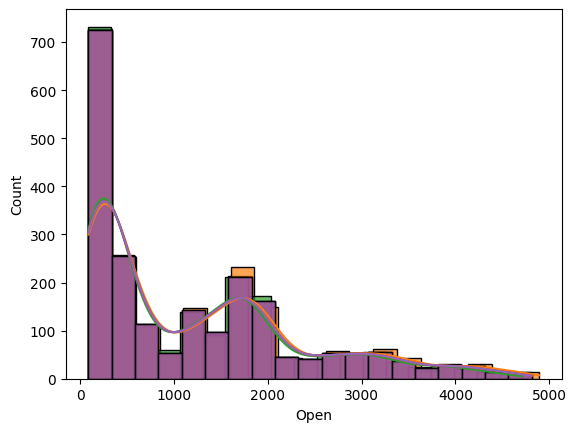

In [5]:
#Visualizing the described data
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    sns.histplot(ethereum[column], kde=True, label=column, alpha=0.7)

plt.show()

# Trend Analysis: Studying how the price of Ethereum changes over time

### Plotting Ethereum Mean Opening Price by Month 11/2017 - 09/2023

In [6]:
#Renaming columns and assigning correct dtype
ethereum.rename(columns={'Volume':'e_volume', 'Open':'e_open'}, inplace=True)
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
#Resampling by month and mean e_open
e_open_monthly = ethereum.resample('M', on='Date')['e_open'].mean()
#Eliminating day number from date
e_open_monthly.index = e_open_monthly.index.strftime('%Y-%m')

e_open_monthly.head()

Date
2017-11     373.696317
2017-12     630.583997
2018-01    1093.099893
2018-02     882.527006
2018-03     640.787129
Name: e_open, dtype: float64

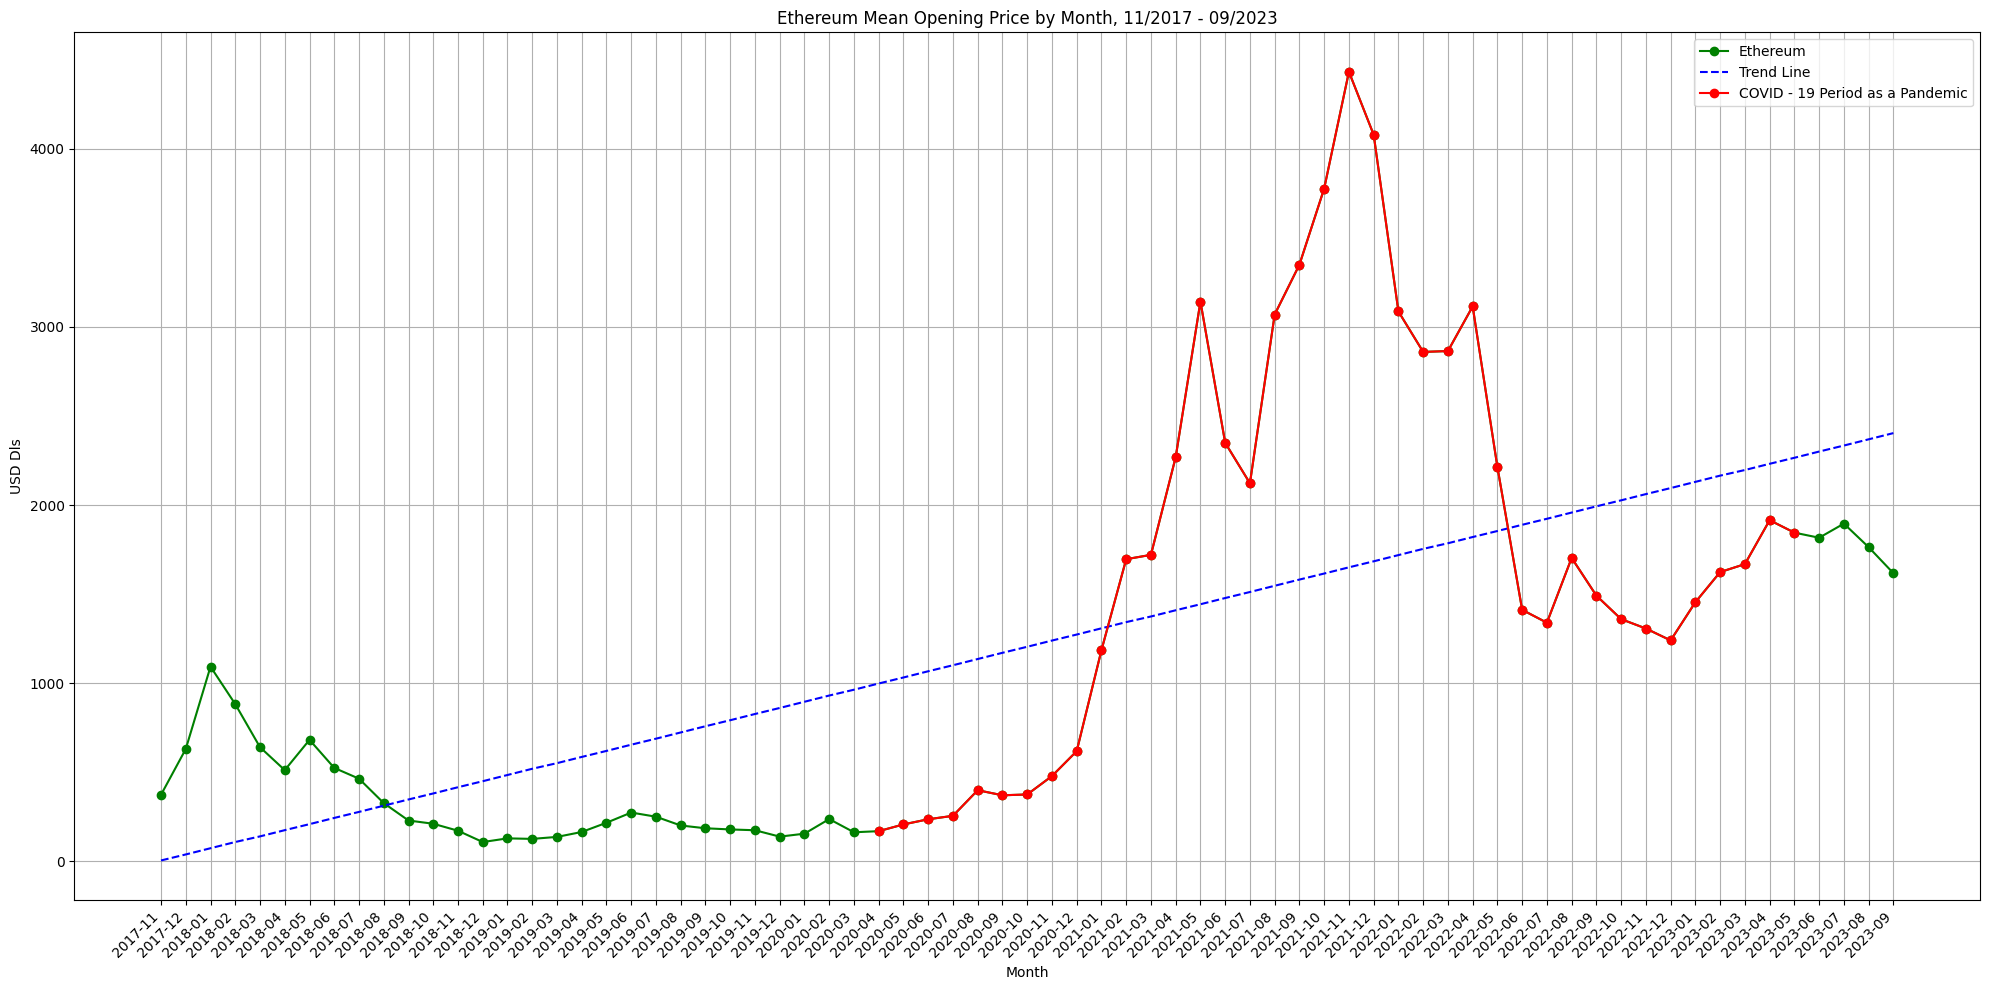

In [7]:
# Convert dates to numerical values for regression
dates = pd.to_datetime(e_open_monthly.index)
dates = dates.map(pd.Timestamp.toordinal)

# Reshape data for sklearn
dates_reshaped1 = dates.values.reshape(-1, 1)
values_reshaped1 = e_open_monthly.values.reshape(-1, 1)

# Perform linear regression
model1 = LinearRegression().fit(dates_reshaped1, values_reshaped1)

# Create trend line
trend_line1 = model1.predict(dates_reshaped1)

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(e_open_monthly.index, e_open_monthly.values, marker='o', color='green', label='Ethereum')
plt.plot(e_open_monthly.index, trend_line1, color='blue', linestyle='--', label='Trend Line')

# Highlight the specific time period (03/2020 - 05/2023) in red
start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(e_open_monthly.loc[start_date:end_date].index, 
         e_open_monthly.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Ethereum Mean Opening Price by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#Renaming columns and assigning correct dtype
ethereum.rename(columns={'Volume':'e_volume', 'Open':'e_open'}, inplace=True)
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
#Resampling by month and mean e_open
e_open_yearly = ethereum.resample('Y', on='Date')['e_open'].mean()
#Eliminating day number from date
e_open_yearly.index = e_open_yearly.index.strftime('%Y')

e_open_yearly.head()

Date
2017     523.951375
2018     485.397384
2019     181.771947
2020     305.899433
2021    2771.215477
Name: e_open, dtype: float64

## Volatility Analysis: Examining how much the price fluctuates from high to low.

### Plotting mean Open daily differences through years 

In [9]:
ethereum_daily_diff = ethereum[['Date','e_open']]
ethereum_daily_diff.loc[:,'e_open'] = ethereum_daily_diff['e_open'].diff()
ethereum_daily_diff_plot = ethereum_daily_diff.copy()
ethereum_daily_diff_plot = pd.DataFrame(ethereum_daily_diff_plot)
ethereum_daily_diff_plot = ethereum_daily_diff_plot.set_index('Date')

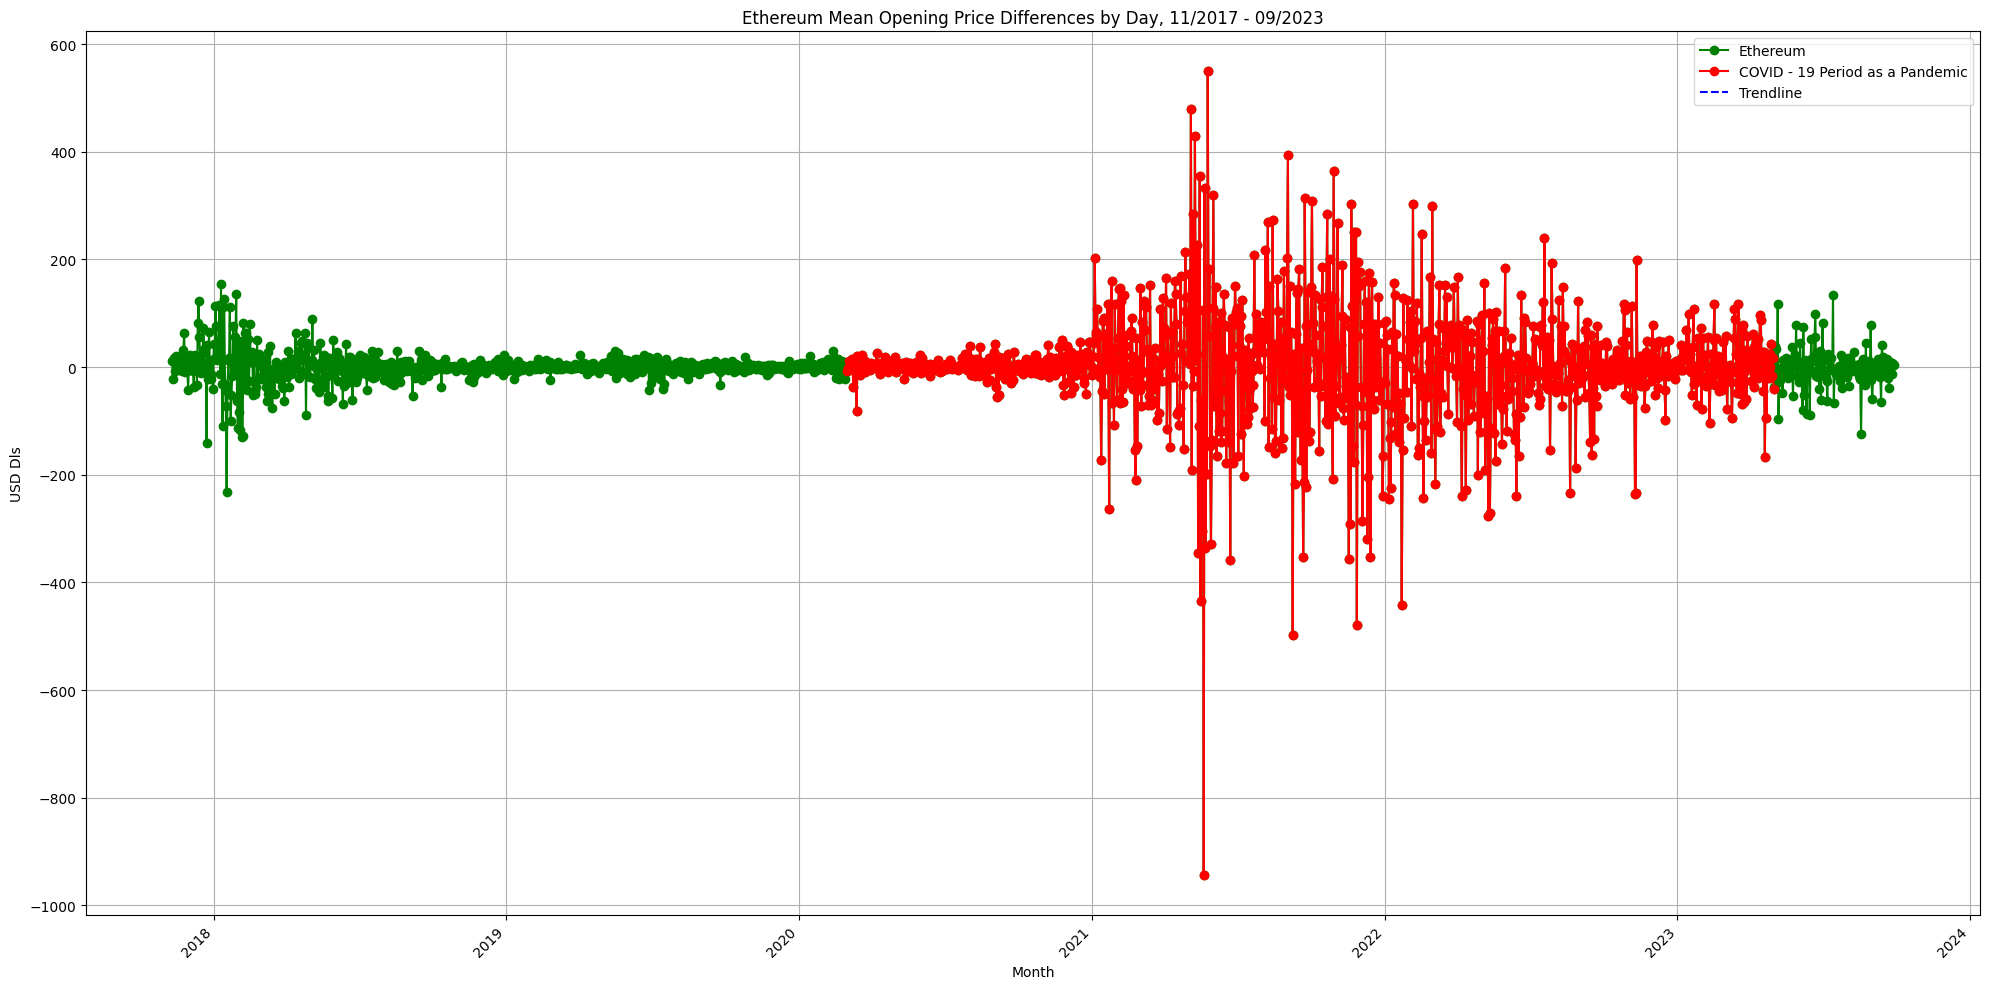

In [10]:
# Your existing code for plotting
plt.figure(figsize=(20, 10))
plt.plot(ethereum_daily_diff_plot.index, 
         ethereum_daily_diff_plot.values, 
         marker='o', color='green', label= 'Ethereum')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(ethereum_daily_diff_plot.loc[start_date:end_date].index, 
         ethereum_daily_diff_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(ethereum_daily_diff_plot))
y = ethereum_daily_diff_plot.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(ethereum_daily_diff_plot.index, trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Ethereum Mean Opening Price Differences by Day, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Before the pandemic, the daily price differences were relatively smaller and more contained, suggesting less volatility in Ethereum's price.

**Pandemic-period**
  
- During the pandemic, the variability in daily price differences increased significantly, indicating a period of high volatility.

**Post-pandemic**

- In the post-pandemic period, the price differences seem to stabilize somewhat but still show considerable variability, indicating ongoing but slightly less extreme volatility compared to the pandemic period.

**Generalities**

- Over the entire timeframe, there is a visible trend of increasing volatility, with the largest swings occurring during the pandemic, as shown by the longer "whiskers" or spikes in the red section of the graph.

### Plotting mean Open monthly differences through years 

In [11]:
#Preparing data for plotting USD Dld differences by months
ethereum_monthly_diff = pd.DataFrame(e_open_monthly)
ethereum_monthly_diff['e_month_diff'] = ethereum_monthly_diff['e_open'].diff()
ethereum_monthly_diff['e_open'] = pd.to_numeric(ethereum_monthly_diff['e_open'], errors='coerce').fillna(0)
ethereum_monthly_diff['e_month_diff'] = pd.to_numeric(ethereum_monthly_diff['e_month_diff'], errors='coerce').fillna(0)
ethereum_monthly_diff= ethereum_monthly_diff.reset_index()
ethereum_monthly_diff= ethereum_monthly_diff[['Date','e_month_diff']]
ethereum_monthly_diff_plot = ethereum_monthly_diff.copy()
ethereum_monthly_diff_plot = ethereum_monthly_diff_plot.set_index('Date')

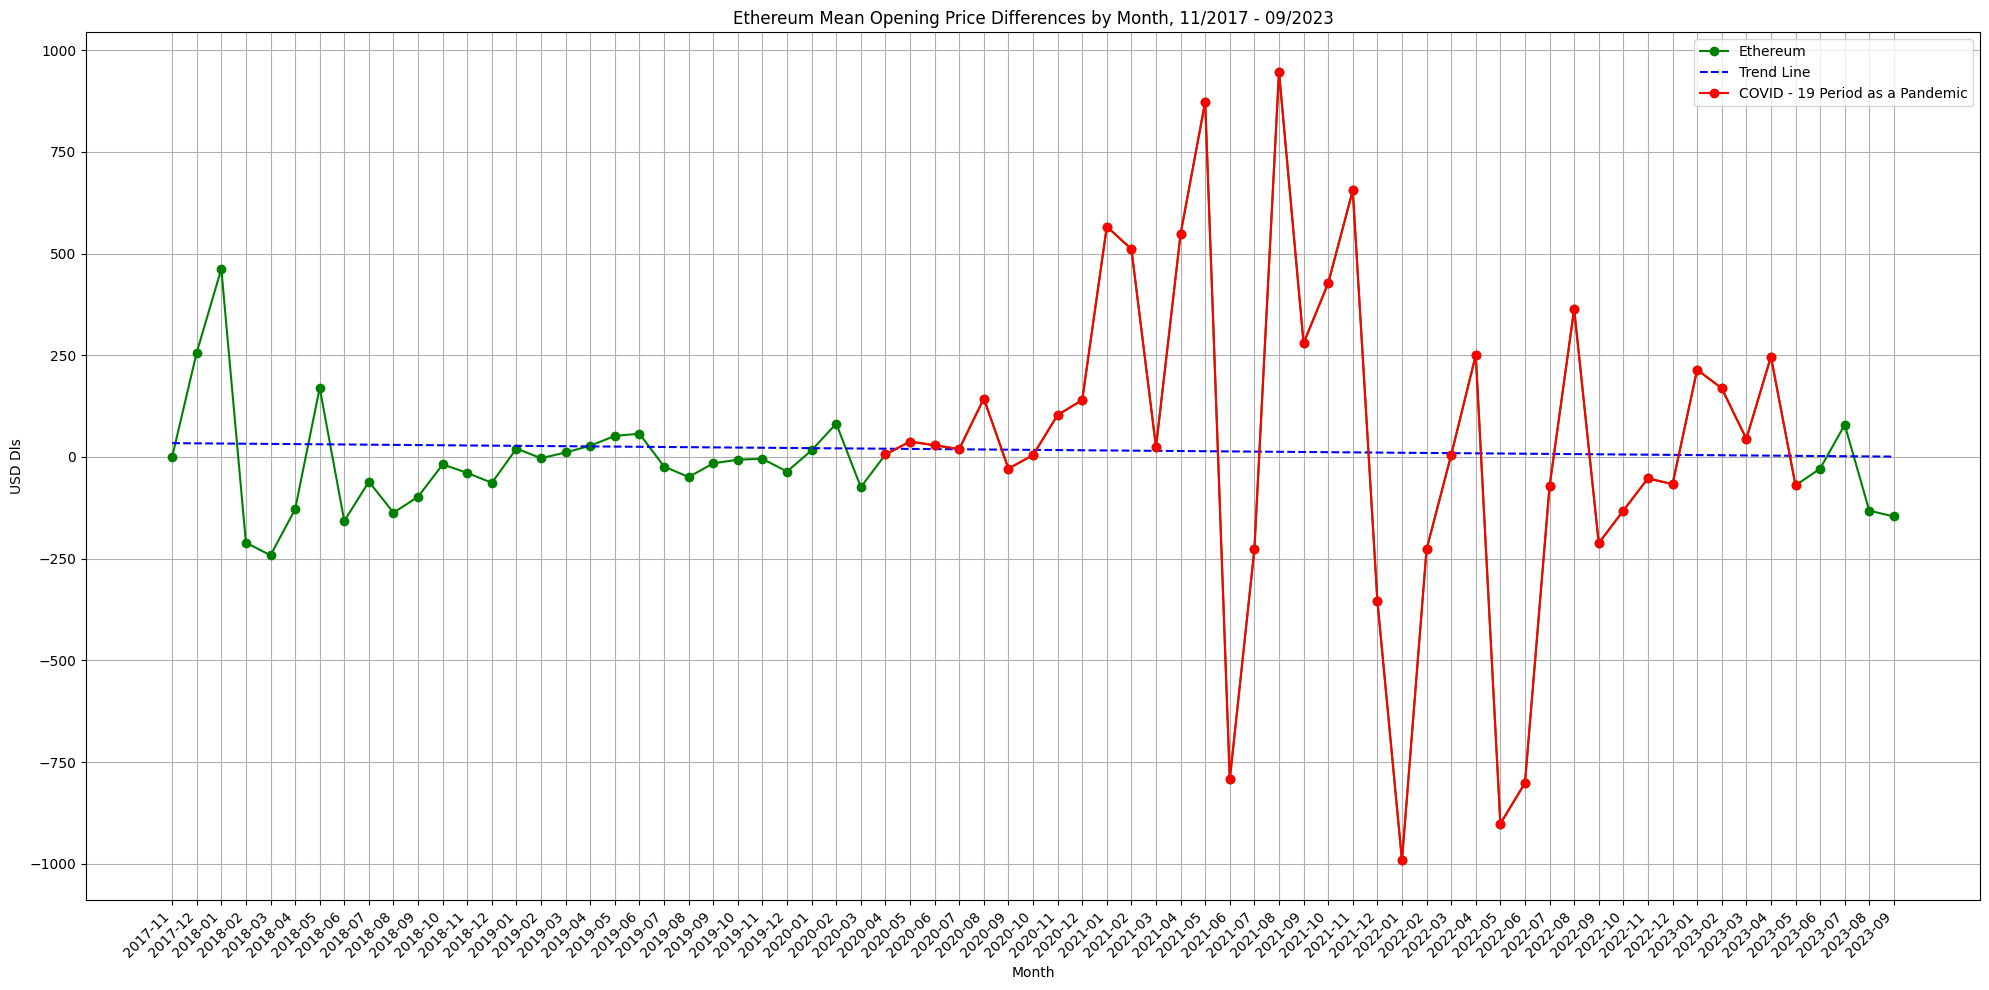

In [12]:
# Convert dates to numerical values for regression
dates = pd.to_datetime(ethereum_monthly_diff_plot.index)
dates = dates.map(pd.Timestamp.toordinal)

# Reshape data for sklearn
dates_reshaped2 = dates.values.reshape(-1, 1)
values_reshaped2 = ethereum_monthly_diff_plot.values.reshape(-1, 1)

# Perform linear regression
model2 = LinearRegression().fit(dates_reshaped2, values_reshaped2)

# Create trend line
trend_line2 = model2.predict(dates_reshaped2)

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(ethereum_monthly_diff_plot.index, ethereum_monthly_diff_plot.values, marker='o', color='green', label='Ethereum')
plt.plot(ethereum_monthly_diff_plot.index, trend_line2, linestyle='--', color='blue', label='Trend Line')

# Highlight the specific time period (03/2020 - 05/2023) in red
start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(ethereum_monthly_diff_plot.loc[start_date:end_date].index, 
         ethereum_monthly_diff_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Ethereum Mean Opening Price Differences by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Prior to the pandemic, Ethereum's monthly price changes were comparatively moderate, indicating a relatively stable market.

**Pandemic-period**

- During the pandemic, the price differences exhibit much larger swings, suggesting heightened market volatility and investor uncertainty.

**Post-pandemic**

- After the pandemic, while the volatility remains, the magnitude of monthly price differences decreases compared to the peak pandemic period.

**Generalities**

- Over the entire period, Ethereum's price changes are characterized by significant volatility, with no clear long-term trend in the differences themselves, indicating the highly unpredictable nature of cryptocurrency markets.

## Volume Analysis: Understanding the trading activity and its relation to price movements.

### Plotting Ethereum cumulative Trading Monthly Volume through years

In [13]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum_org = ethereum.copy()

e_volume_monthly = ethereum.resample('M', on='Date')['e_volume'].sum()
ethereum = ethereum[(ethereum['Date'] >= '2020-01') & (ethereum['Date'] < '2023-10')]

e_volume_monthly.index = e_volume_monthly.index.strftime('%Y-%m')
e_volume_monthly= e_volume_monthly.reset_index()

e_volume_monthly_plot = ethereum_org.resample('M', on='Date')['e_volume'].sum()
e_volume_monthly_plot.index = e_volume_monthly_plot.index.strftime('%Y-%m')

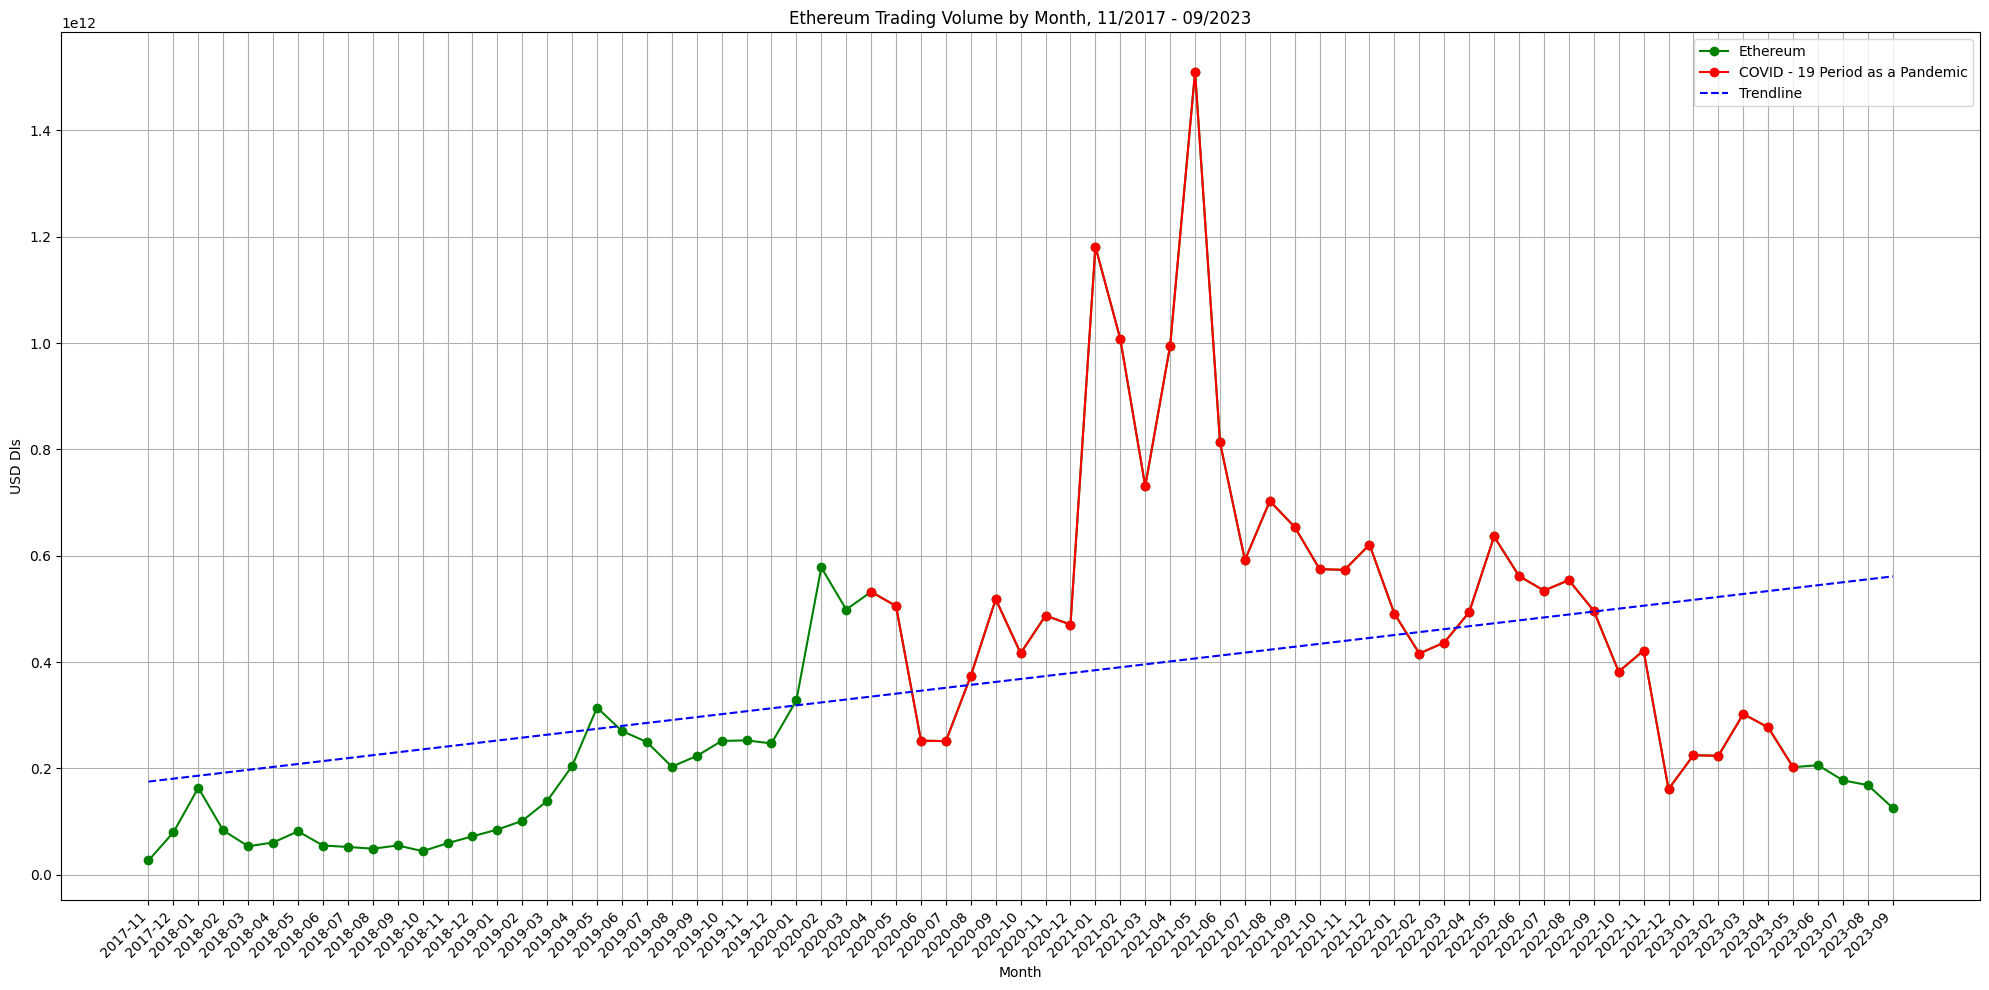

In [14]:
import numpy as np

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(e_volume_monthly_plot.index, 
         e_volume_monthly_plot.values,
         marker='o', color='green', label = 'Ethereum')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(e_volume_monthly_plot.loc[start_date:end_date].index, 
         e_volume_monthly_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(e_volume_monthly_plot))
y = e_volume_monthly_plot.values
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(e_volume_monthly_plot.index, trendline(x), linestyle='--', color='blue', label='Trendline')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Ethereum Trading Volume by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Before the pandemic, Ethereum's trading volume was showing a gradual increase, as indicated by the initial upward trend in the green section of the graph.
  
**Pandemic-period**

- The pandemic period is marked by a significant spike in trading volume, suggesting a surge in market activity during this time, as shown by the sharp peaks in the red section.

**Post-pandemic**

- Following the pandemic, the trading volume demonstrates a decreasing trend, with lower peaks, as indicated by the downward slope in the green section of the graph after the pandemic spikes.

**Generalities**

- The overall trendline indicates that while there were periods of extreme volume, the general long-term trend for Ethereum trading volume is downward, suggesting a decrease in trading activity over the observed period.

C:\Users\user\AppData\Local\Temp\ipykernel_16860\3324016744.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(e_open_monthly.index, rotation=45, ha='right')  # Rotate x-axis tick labels


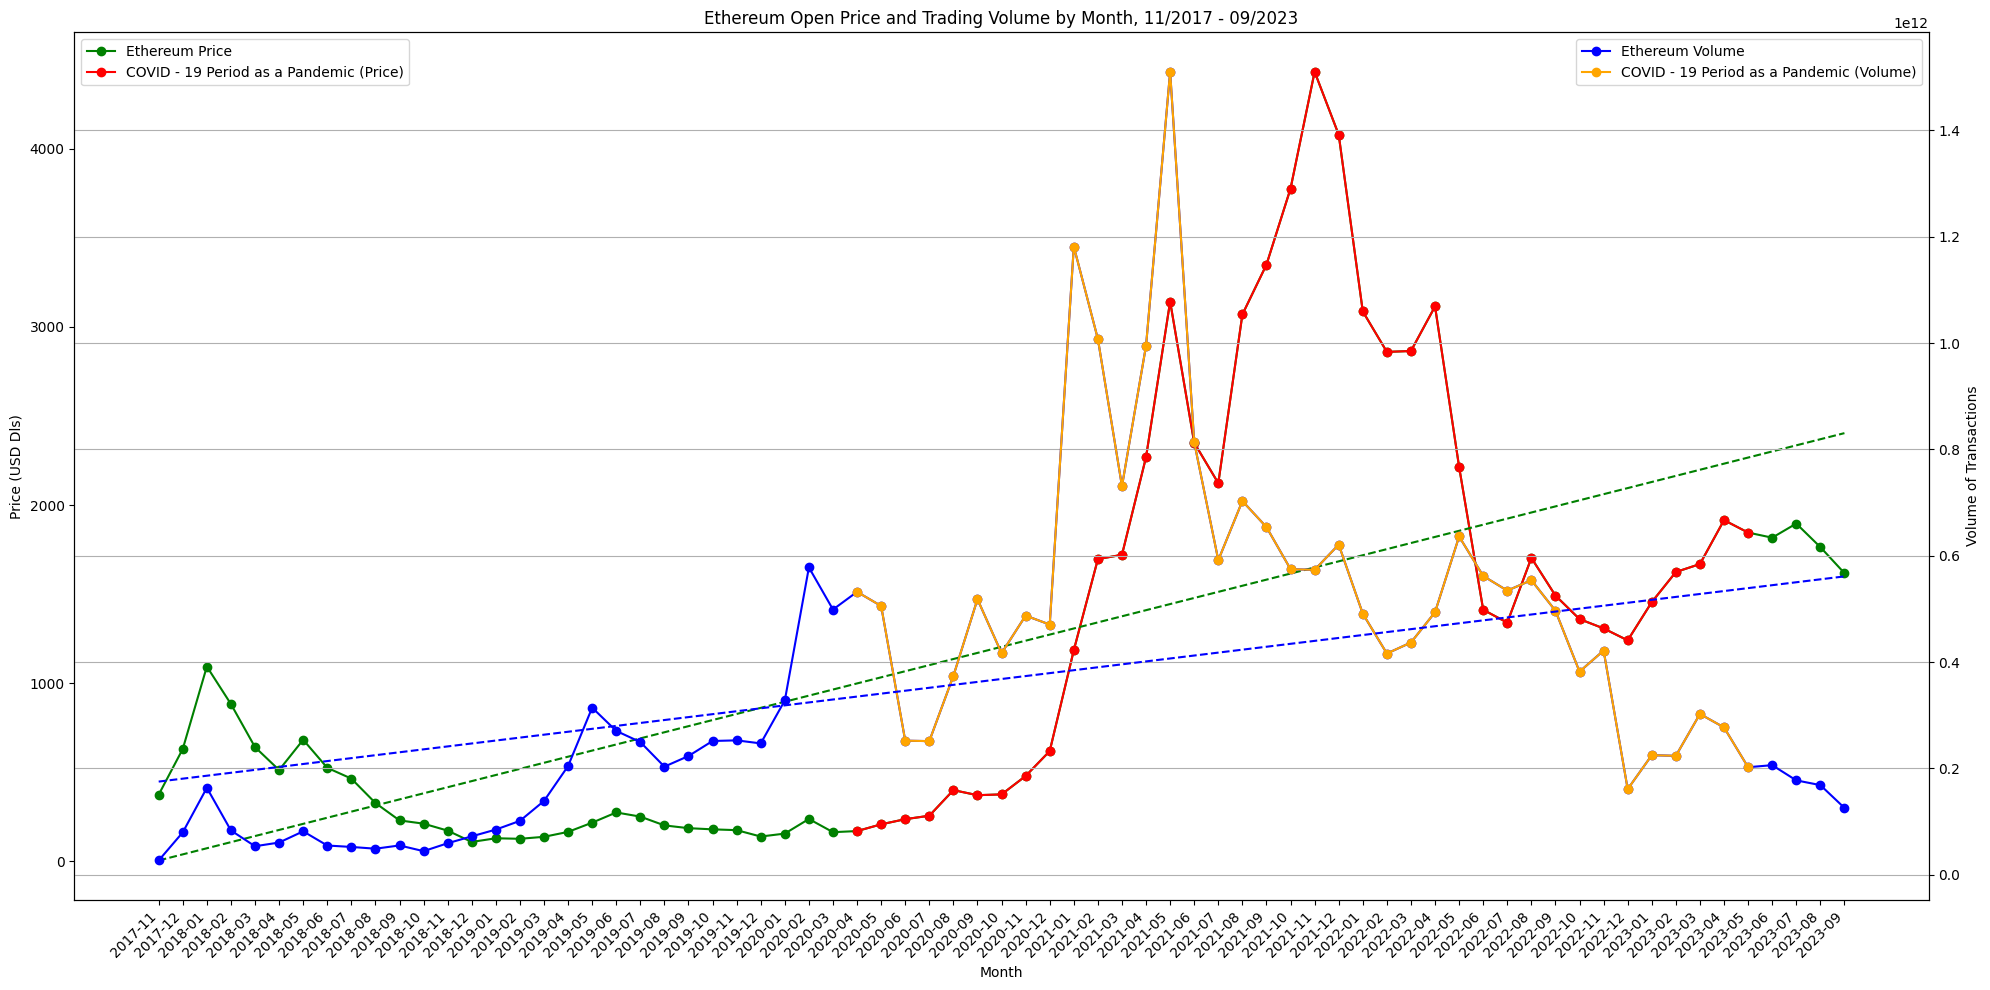

In [90]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot Ethereum price data on the primary y-axis (left)
ax1.plot(e_open_monthly.index, 
         e_open_monthly.values, 
         marker='o', color='green', label='Ethereum Price')

# Plot the COVID-19 period for price data on the primary y-axis (left)
start_date = '2020-03-01'
end_date = '2023-05-01'
ax1.plot(e_open_monthly.loc[start_date:end_date].index, 
         e_open_monthly.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic (Price)')

ax1.set_xlabel('Month')
ax1.set_ylabel('Price (USD Dls)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a secondary y-axis (right) for volume data
ax2 = ax1.twinx()

# Plot Ethereum volume data on the secondary y-axis (right)
ax2.plot(e_volume_monthly_plot.index, 
         e_volume_monthly_plot.values,
         marker='o', color='blue', label='Ethereum Volume')

# Plot the COVID-19 period for volume data on the secondary y-axis (right)
ax2.plot(e_volume_monthly_plot.loc[start_date:end_date].index, 
         e_volume_monthly_plot.loc[start_date:end_date].values, 
         marker='o', color='orange', label='COVID - 19 Period as a Pandemic (Volume)')

ax2.set_ylabel('Volume of Transactions')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

ax1.set_xticklabels(e_open_monthly.index, rotation=45, ha='right')  # Rotate x-axis tick labels
plt.title('Ethereum Open Price and Trading Volume by Month, 11/2017 - 09/2023')
plt.grid(True)

# Calculate trend lines for Ethereum Open Price and Ethereum Volume
eth_price_x = np.arange(len(e_open_monthly))
eth_price_slope, eth_price_intercept = np.polyfit(eth_price_x, e_open_monthly.values, 1)

eth_volume_x = np.arange(len(e_volume_monthly_plot))
eth_volume_slope, eth_volume_intercept = np.polyfit(eth_volume_x, e_volume_monthly_plot.values, 1)

# Plot trend lines
ax1.plot(e_open_monthly.index, eth_price_slope * eth_price_x + eth_price_intercept, linestyle='--', color='green', label='Ethereum Price Trend')
ax2.plot(e_volume_monthly_plot.index, eth_volume_slope * eth_volume_x + eth_volume_intercept, linestyle='--', color='blue', label='Ethereum Volume Trend')


plt.tight_layout()
plt.show()


**Pre-pandemic**

- There appears to be a generally proportional relationship between price and volume, with increases in price often accompanied by increases in trading volume.

**Pandemic-period**

- The pandemic period shows a dramatic increase in price accompanied by large spikes in trading volume, suggesting a heightened correlation where large price movements were matched by significant changes in trading volume.

**Post-pandemic**

- After the pandemic, the price of Ethereum declines while the trading volume shows a less pronounced decrease, indicating a possible decoupling of price movement and trading activity.

**Generalities**

- Over the entire period, the relationship between price and volume is not consistent, with periods of correlation and decoupling, reflecting the complex dynamics of the cryptocurrency market where volume can be influenced by a variety of factors, not just price changes.

# Gasoline Price

###### Source: U.S. Energy Information Administration, US Regular All Formulations Gas Price [GASREGW], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GASREGW, October 5, 2023. 

###### About: Weighted average based on sampling of approximately 900 retail outlets, 8:00AM Monday. The price represents self-service unless only full-service is available and includes all taxes. See (http://www.eia.doe.gov/oil_gas/petroleum/data_publications/wrgp/mogas_home_page.html) for further definitions. Regular Gasoline has an antiknock index (average of the research octane rating and the motor octane number) greater than or equal to 85 and less than 88. Octane requirements may vary by altitude.

DataSet: GASREGW (Gas Regular Weekly)

Columns:

Units: Dollars per Gallon, Not Seasonally Adjusted

Frequency: Weekly, Ending Monday 

### Exploratory Data Analysis

In [16]:
gas_price = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\GASREGW.csv')


gas_price.head(10)

DATE GASREGW
0  1990-08-20   1.191
1  1990-08-27   1.245
2  1990-09-03   1.242
3  1990-09-10   1.252
4  1990-09-17   1.266
5  1990-09-24   1.272
6  1990-10-01   1.321
7  1990-10-08   1.333
8  1990-10-15   1.339
9  1990-10-22   1.345

In [17]:
gas_price.rename(columns={'GASREGW': 'gas_price', 'DATE' : 'Date'}, inplace= True)
gas_price.describe()

Date gas_price
count         1729      1729
unique        1729      1223
top     1990-08-20         .
freq             1         6

In [18]:
gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1729 non-null   object
 1   gas_price  1729 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [19]:
#Assigning correct dtype for numeric and date columns
gas_price.sort_values('gas_price', ascending= True)
gas_price['gas_price'] = pd.to_numeric(gas_price['gas_price'], errors='coerce').dropna() 
gas_price['Date'] = pd.to_datetime(gas_price['Date'])
#Resampling data by month and mean gas price 
gas_price_monthly = gas_price.resample('M', on = 'Date')['gas_price'].mean()
#Ensuring data is a DataFrame
gas_price_monthly = pd.DataFrame(gas_price_monthly)
#Formatting on Date by year and month only
gas_price_monthly.reset_index(inplace=True)
gas_price_monthly['Date'] = gas_price_monthly['Date'].dt.strftime('%Y-%m')
gas_price_monthly.sort_values('gas_price', ascending= True)

Date  gas_price
102  1999-02    0.92050
101  1999-01    0.93900
100  1998-12    0.94500
103  1999-03    0.98200
99   1998-11    0.99540
..       ...        ...
380  2022-04    4.10850
379  2022-03    4.22175
381  2022-05    4.44360
383  2022-07    4.55925
382  2022-06    4.92900

[399 rows x 2 columns]

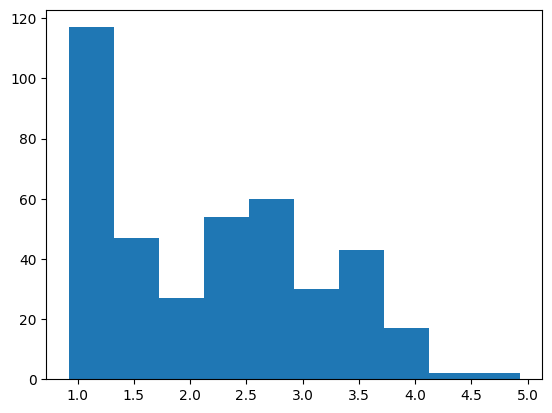

In [20]:
#Plotting values to overview outliers and strange values
plt.hist(gas_price_monthly['gas_price'])
plt.show()

In [21]:
gas_price_monthly_plot = gas_price_monthly.copy()

gas_price_monthly_plot = gas_price_monthly_plot[(gas_price_monthly_plot['Date'] >= '2000-11') & (gas_price_monthly_plot['Date'] < '2023-10')]

gas_price_monthly_plot = gas_price_monthly_plot.set_index('Date')
gas_price_monthly_plot =  pd.DataFrame(gas_price_monthly_plot)


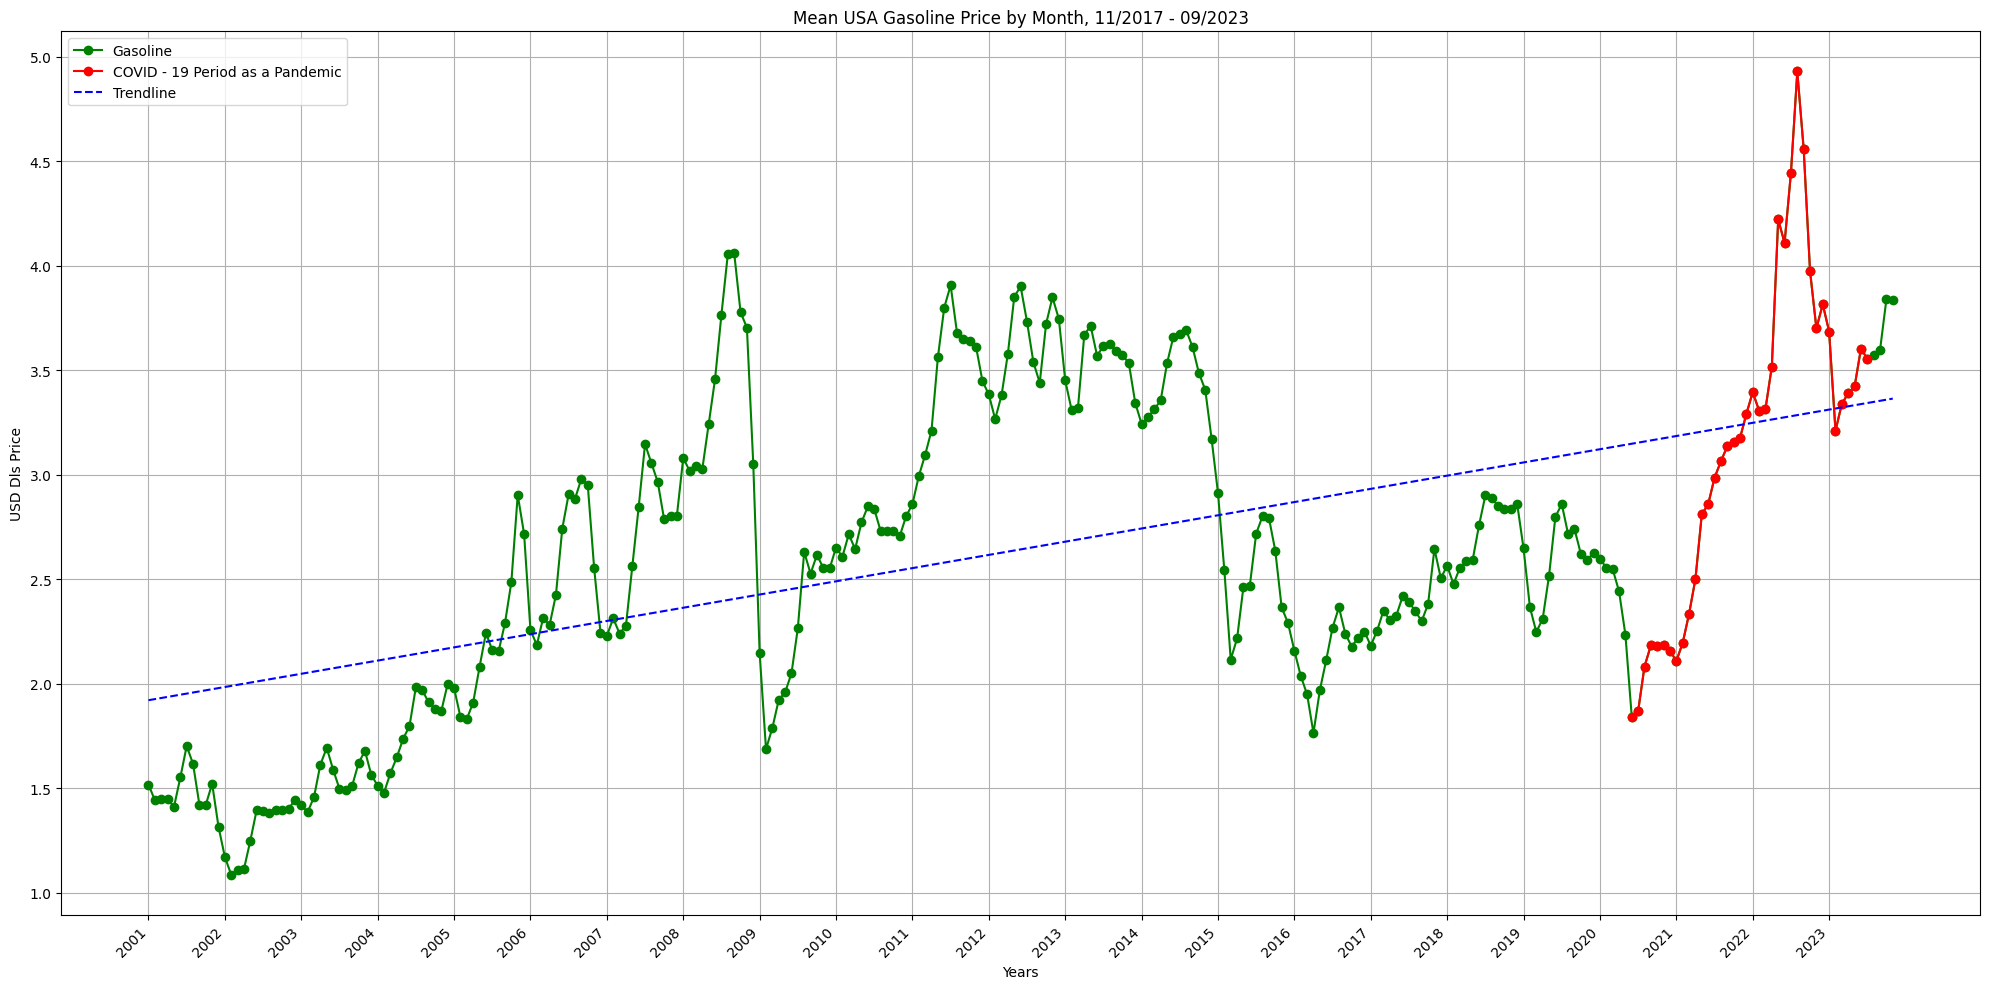

In [22]:
# Your existing code for plotting
plt.figure(figsize=(20, 10))
plt.plot(gas_price_monthly_plot.index, 
         gas_price_monthly_plot.values, 
         marker='o', color='green', label='Gasoline')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(gas_price_monthly_plot.loc[start_date:end_date].index, 
         gas_price_monthly_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(gas_price_monthly_plot))
y = gas_price_monthly_plot.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(gas_price_monthly_plot.index, trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.xlabel('Years')
plt.ylabel('USD Dls Price')
plt.title('Mean USA Gasoline Price by Month, 11/2017 - 09/2023')

years = pd.date_range(start=gas_price_monthly_plot.index[0], end=gas_price_monthly_plot.index[-1], freq='YS').strftime('%Y')

# Set x-axis ticks by year without overlapping
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=range(0, len(gas_price_monthly_plot), len(gas_price_monthly_plot) // (len(years) - 1)), labels=years)

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Prior to the pandemic, gasoline prices were gradually increasing, which is consistent with the general uptrend shown by the blue trendline.

**Pandemic-period**

- During the pandemic, there is a notable decline in gasoline prices, indicated by the red section, likely due to decreased demand as travel restrictions were put in place.

**Post-pandemic**

- After the pandemic, prices rebound and continue to rise, even surpassing pre-pandemic levels, as indicated by the resumption of the green line and upward trend.

**Generalities**

- Over the entire time period from November 2017 to September 2023, despite short-term fluctuations, the general trend is that gasoline prices have been increasing, as shown by the overall upward direction of the blue trendline.

In [23]:
#Shaping for future analysis
gas_price_monthly = gas_price_monthly[(gas_price_monthly['Date'] >= '2020-01') & (gas_price_monthly['Date'] < '2023-10')]

## COVID - 19 New Cases

##### Source: Variable time span	Jan 8, 2020 – Sep 27, 2023 Data published by WHO COVID-19 Dashboard. Geneva: World Health Organization, 2020. Available online: https://covid19.who.int/WHO-COVID-19-global-data.csv


### Exploratory Data Analysis

In [24]:
covid_cases = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\WHO-COVID-19-global-data.csv')

covid_cases.head(15)

Date_reported Country_code      Country WHO_region  New_cases  \
0     2020-01-03           AF  Afghanistan       EMRO          0   
1     2020-01-04           AF  Afghanistan       EMRO          0   
2     2020-01-05           AF  Afghanistan       EMRO          0   
3     2020-01-06           AF  Afghanistan       EMRO          0   
4     2020-01-07           AF  Afghanistan       EMRO          0   
5     2020-01-08           AF  Afghanistan       EMRO          0   
6     2020-01-09           AF  Afghanistan       EMRO          0   
7     2020-01-10           AF  Afghanistan       EMRO          0   
8     2020-01-11           AF  Afghanistan       EMRO          0   
9     2020-01-12           AF  Afghanistan       EMRO          0   
10    2020-01-13           AF  Afghanistan       EMRO          0   
11    2020-01-14           AF  Afghanistan       EMRO          0   
12    2020-01-15           AF  Afghanistan       EMRO          0   
13    2020-01-16           AF  Afghanistan       EMRO          0   
14    2020-01-17           AF  Afghanistan       EMRO          0   

    Cumulative_cases  New_deaths  Cumulative_deaths  
0                  0           0                  0  
1                  0           0                  0  
2                  0           0                  0  
3                  0           0                  0  
4                  0           0                  0  
5                  0           0                  0  
6                  0           0                  0  
7                  0           0                  0  
8                  0           0                  0  
9                  0           0                  0  
10                 0           0                  0  
11                 0           0                  0  
12                 0           0                  0  
13                 0           0                  0  
14                 0           0                  0

In [25]:
covid_cases.shape


(323268, 8)

In [26]:
covid_cases.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  3.232680e+05      3.232680e+05  323268.000000       3.232680e+05
mean   2.384633e+03      1.472605e+06      21.528008       1.805220e+04
std    3.920838e+04      6.720642e+06     149.018945       7.566745e+04
min   -6.507900e+04      0.000000e+00   -3520.000000       0.000000e+00
25%    0.000000e+00      2.411000e+03       0.000000       1.800000e+01
50%    0.000000e+00      3.595300e+04       0.000000       3.940000e+02
75%    1.590000e+02      4.154055e+05       2.000000       5.740000e+03
max    6.966046e+06      1.034368e+08   11447.000000       1.127152e+06

In [27]:
covid_cases.rename(columns={'Date_reported': 'Date', 'New_cases' : 'covid_new_cases'}, inplace=True)
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_cases_m = covid_cases.resample('M', on='Date')['covid_new_cases'].sum()
covid_cases_m = covid_cases_m.reset_index()
covid_cases_m['covid_new_cases'] = pd.to_numeric(covid_cases_m['covid_new_cases'])
covid_cases_m['Date'] = covid_cases_m['Date'].dt.strftime('%Y-%m')

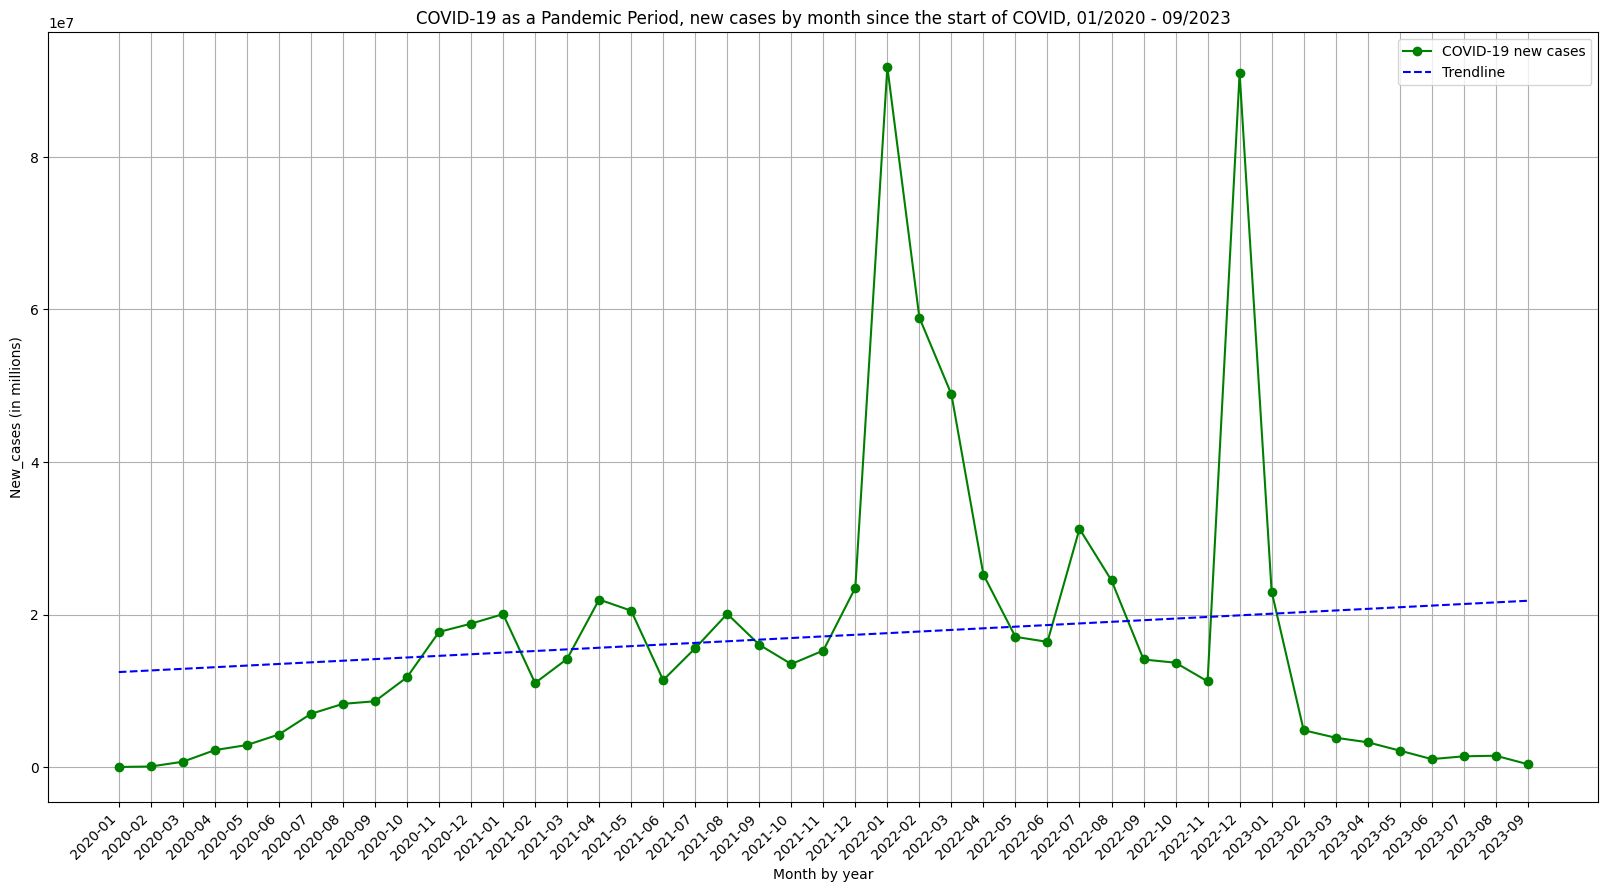

In [28]:
# Your existing code for plotting
ax = covid_cases_m.plot(kind='line', x='Date', y='covid_new_cases', label= 'COVID-19 new cases', xlabel='Month by year',  
                        marker='o', ylabel='New_cases (in millions)', color='green',
                        title='COVID-19 as a Pandemic Period, new cases by month since the start of COVID, 01/2020 - 09/2023')

plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(covid_cases_m['Date'])))
ax.set_xticklabels(covid_cases_m['Date'], rotation=45, ha='right')

# Calculate the trendline
x = np.arange(len(covid_cases_m))
y = covid_cases_m['covid_new_cases'].values
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
ax.plot(covid_cases_m['Date'], trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.grid(True)
plt.legend()
plt.show()


- Highest peaks are shown on february and december of 2022
- The most recent data points suggest a decrease in new cases, possibly indicating better control or progression towards endemicity.
- The trendline suggests that, over time, the world has been gradually getting better at managing the spread of the virus.

# Gold Price

In [29]:
gold = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\gold_price_data.csv')
gold = pd.DataFrame(gold)
gold.head()

Date      Open      High       Low    Close* Adj Close** Volume
0  Nov 16, 2023  1,965.30  1,983.90  1,964.60  1,983.90    1,983.90      6
1  Nov 15, 2023  1,962.80  1,962.80  1,960.00  1,960.10    1,960.10      6
2  Nov 14, 2023  1,965.80  1,965.80  1,961.80  1,961.80    1,961.80      2
3  Nov 13, 2023  1,939.90  1,947.20  1,934.00  1,945.50    1,945.50    191
4  Nov 10, 2023  1,959.60  1,959.60  1,932.60  1,932.60    1,932.60    375

In [30]:
gold.sort_values('Date', ascending = False)

Date      Open      High       Low    Close* Adj Close** Volume
535   Sep 30, 2021  1,754.30  1,762.60  1,748.50  1,757.00    1,757.00  2,220
787   Sep 30, 2020  1,884.10  1,909.60  1,882.50  1,908.40    1,908.40    730
1040  Sep 30, 2019  1,468.70  1,485.50  1,458.30  1,482.00    1,482.00    219
1291  Sep 30, 2018  1,191.60  1,191.60  1,185.80  1,187.10    1,187.10    180
2046  Sep 30, 2015  1,115.20  1,119.00  1,113.30  1,114.20    1,114.20  1,181
...            ...       ...       ...       ...       ...         ...    ...
4708  Apr 01, 2005     428.3     428.5     424.5     425.9       425.9    552
4969  Apr 01, 2004     427.2       432     424.5     427.8       427.8  1,561
5231  Apr 01, 2003       336     338.4     333.8     334.3       334.3    434
5492  Apr 01, 2002     302.6     303.2     300.7     303.2       303.2    436
5752  Apr 01, 2001     257.2     257.8       255     255.6       255.6    456

[5906 rows x 7 columns]

In [31]:
gold.describe()

Date  Open  High   Low Close* Adj Close** Volume
count           5906  5906  5906  5906   5906        5906   5906
unique          5905  4540  4524  4490   4590        4590   1454
top     Jul 03, 2006     -     -     -      -           -      -
freq               2    81    81    81     81          81    494

In [32]:
count_minus = (gold['Open'] == '-').sum()
print("Number of occurrences of '-':", count_minus)
gold

Number of occurrences of '-': 81


Date      Open      High       Low    Close* Adj Close** Volume
0     Nov 16, 2023  1,965.30  1,983.90  1,964.60  1,983.90    1,983.90      6
1     Nov 15, 2023  1,962.80  1,962.80  1,960.00  1,960.10    1,960.10      6
2     Nov 14, 2023  1,965.80  1,965.80  1,961.80  1,961.80    1,961.80      2
3     Nov 13, 2023  1,939.90  1,947.20  1,934.00  1,945.50    1,945.50    191
4     Nov 10, 2023  1,959.60  1,959.60  1,932.60  1,932.60    1,932.60    375
...            ...       ...       ...       ...       ...         ...    ...
5901  Sep 04, 2000     275.8     275.8     275.8     275.8       275.8      2
5902  Sep 03, 2000         -         -         -         -           -      -
5903  Aug 31, 2000       277       277       277       277         277      -
5904  Aug 30, 2000     274.8     278.3     274.8     278.3       278.3      -
5905  Aug 29, 2000     273.9     273.9     273.9     273.9       273.9      -

[5906 rows x 7 columns]

In [33]:
# Assuming 'Date' is a column in your DataFrame
gold['Date'] = pd.to_datetime(gold['Date'])

# Set 'Date' as the index
gold.set_index('Date', inplace=True)

# Replace '-' with NaN in the 'Open' column
gold['Open'] = gold['Open'].replace('-', np.nan)

# Eliminating commas from numeric values
gold = gold.applymap(lambda x: str(x).replace(',', ''))

# Replace the string "nan" with actual NaN values
gold.replace("nan", np.nan, inplace=True)

# Convert 'Open' column to numeric
gold['Open'] = pd.to_numeric(gold['Open'])

# Resample the data on a monthly basis and calculate the mean of the 'Open' column
gold_plot_open = gold['Open'].resample('M').mean()

# Convert the index to the desired format 'YYYY-MM'
gold_plot_open.index = gold_plot_open.index.strftime('%Y-%m')


C:\Users\user\AppData\Local\Temp\ipykernel_16860\2857767810.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gold = gold.applymap(lambda x: str(x).replace(',', ''))


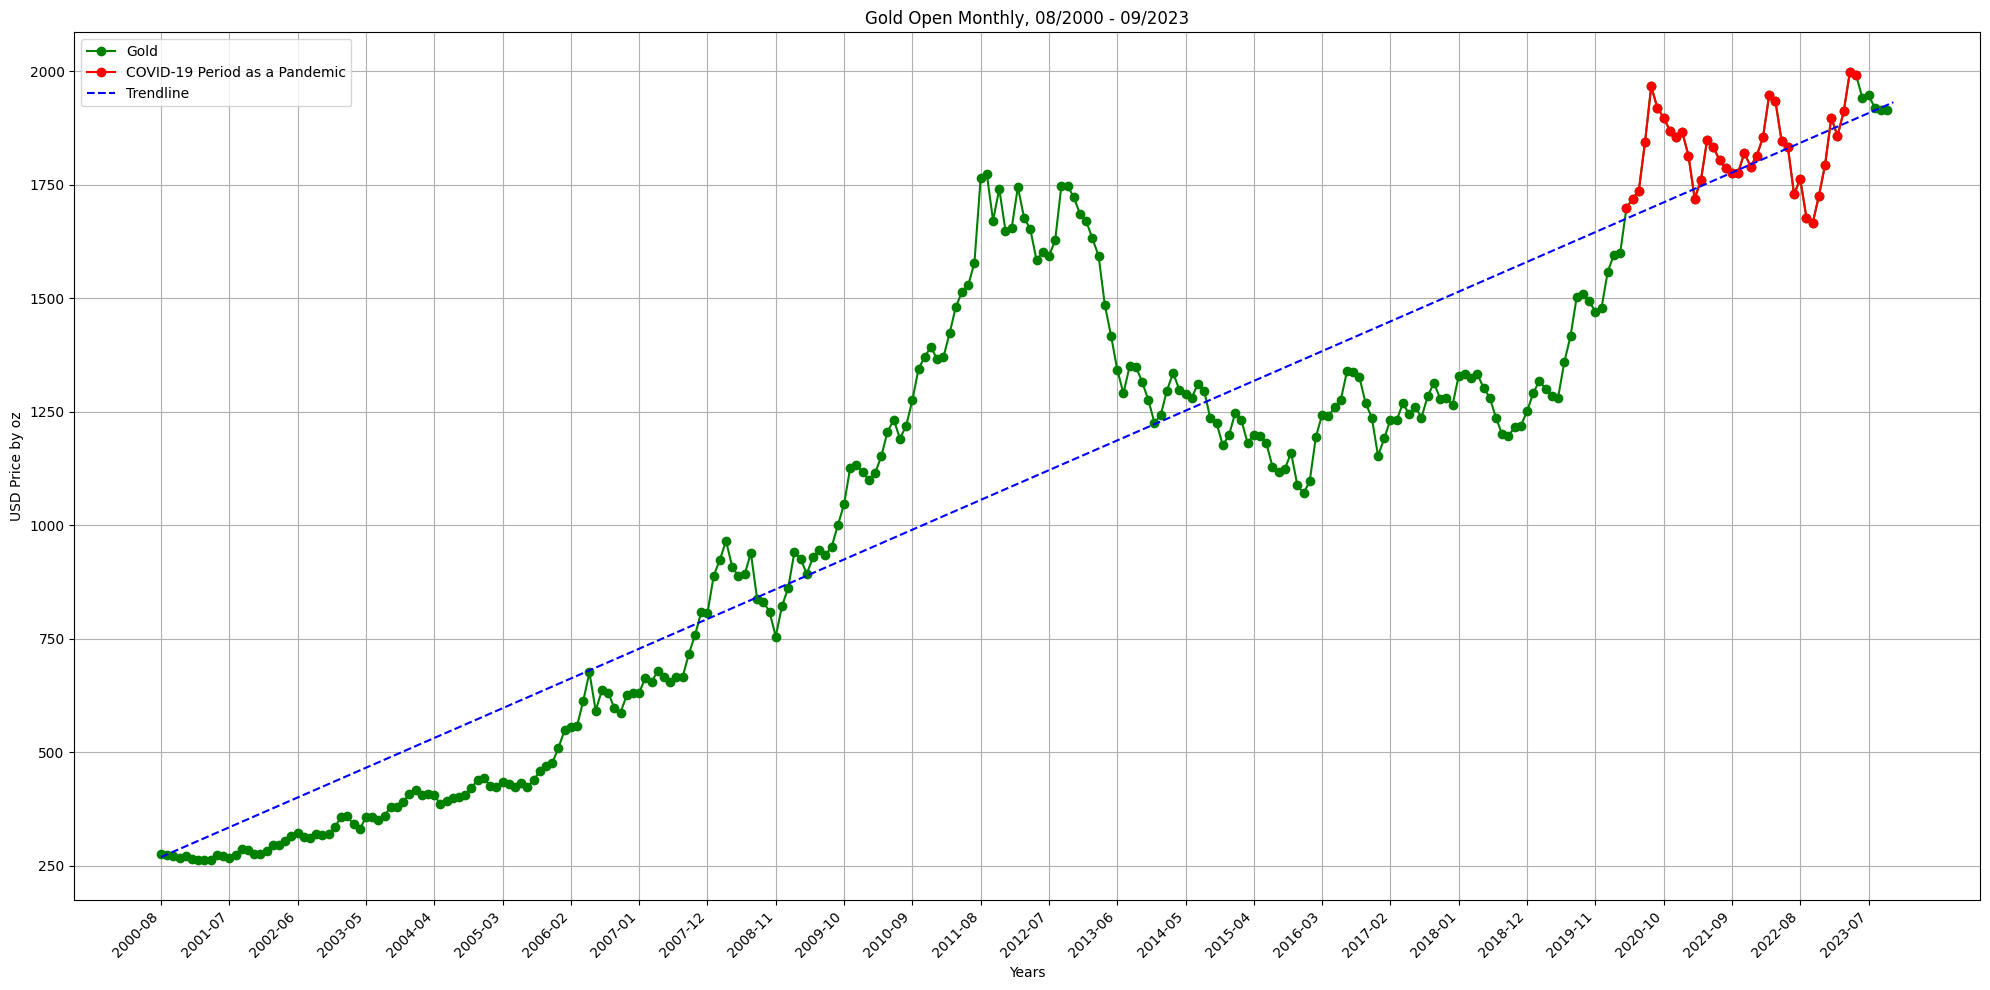

In [34]:
# Plotting
plt.figure(figsize=(20, 10))
end_date1 = '2023-10-01'
plt.plot(gold_plot_open.loc[:end_date1].index, 
         gold_plot_open.loc[:end_date1].values, 
         marker='o', color='green', label='Gold')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(gold_plot_open.loc[start_date:end_date].index, 
         gold_plot_open.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')



#Converting to extract yearly x ticks
years = gold['Open'].resample('Y').mean()
years.index = years.index.strftime('%Y')
years_plot = pd.date_range(start=years.index[0], end=years.index[-1], freq='YS').strftime('%Y')

# Calculate the trendline
x = np.arange(len(gold_plot_open))
y = gold_plot_open.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(gold_plot_open.index, trendline(x), linestyle='--', color='blue', label='Trendline')



# Adjust tick positions
tick_positions = range(0, len(gold_plot_open), len(gold_plot_open) // len(years_plot))
plt.xticks(ticks=tick_positions, labels=gold_plot_open.index[::len(gold_plot_open) // len(years_plot)],  rotation=45, ha='right')

plt.xlabel('Years')
plt.ylabel('USD Price by oz')
plt.title('Gold Open Monthly, 08/2000 - 09/2023')

# Show the plot
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Pre-pandemic**

- Before the pandemic, gold prices were already on an uptrend, suggesting a steadily increasing investor interest or hedge against other market risks.

**Pandemic-period**

- During the pandemic, gold prices surged, reflecting its status as a safe-haven asset amid global economic uncertainty.

**Post-pandemic**

- Following the pandemic surge, gold prices have experienced fluctuations but continue to follow the general upward trend.

**Generalities**

- The overall trend line across the period indicates that gold prices have been rising, which is consistent with the historical view of gold as a long-term store of value.

**Key Insight**

- The pandemic induced a significant but temporary spike in gold prices, after which the prices returned to follow the pre-existing upward trend, highlighting gold's appeal during times of crisis and its resilience as an investment asset.

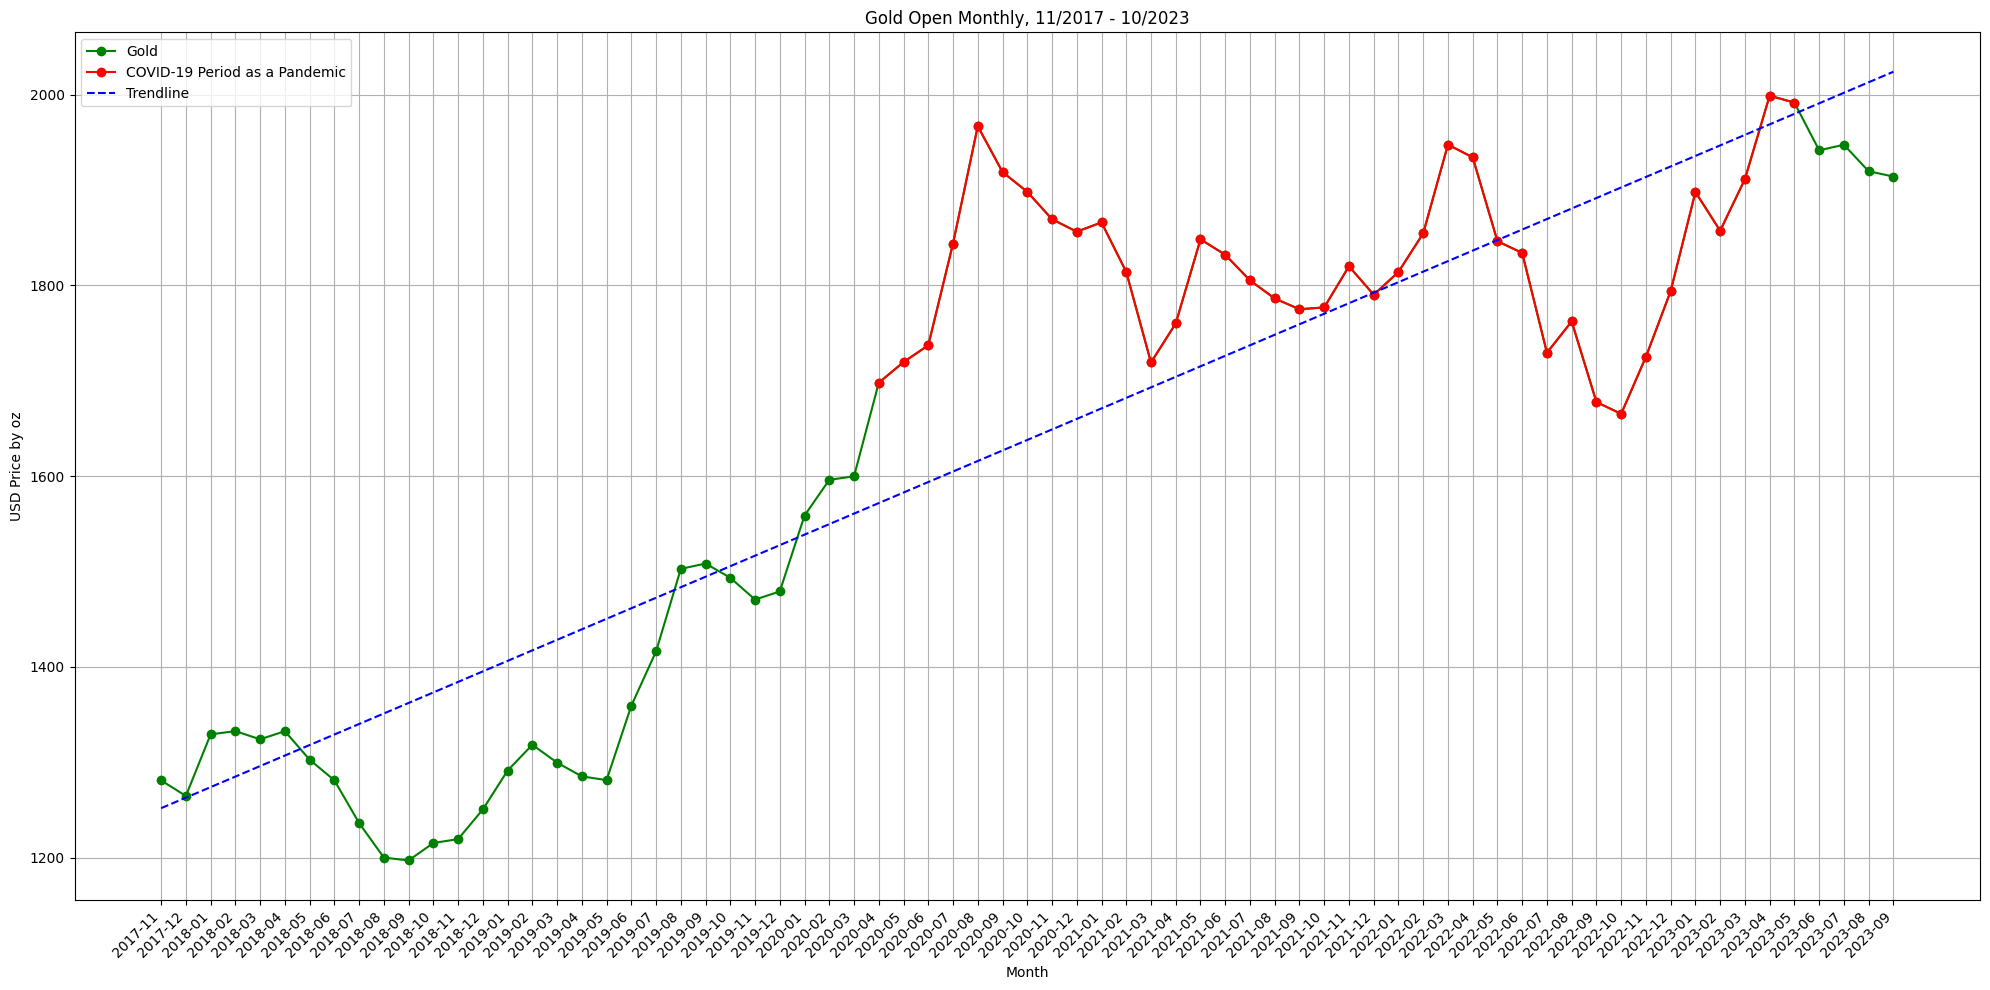

In [35]:
# Your existing code for plotting
plt.figure(figsize=(20, 10))
plt.plot(gold_plot_open['2017-11':'2023-09'].index, 
         gold_plot_open['2017-11':'2023-09'].values, 
         marker='o', color='green', label='Gold')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(gold_plot_open.loc[start_date:end_date].index, 
         gold_plot_open.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(gold_plot_open['2017-11':'2023-09']))
y = gold_plot_open['2017-11':'2023-09'].values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(gold_plot_open['2017-11':'2023-09'].index, trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.xlabel('Month')
plt.ylabel('USD Price by oz')
plt.title('Gold Open Monthly, 11/2017 - 10/2023')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Pre-pandemic**

- Data shows a steady and consistent growth in gold prices leading up to the pandemic, which could be indicative of increasing investment demand or a hedge against potential economic uncertainties.
  
**Pandemic-period**
  
- Shows a significant upward surge in gold prices, marked by the red dots, peaking before a sharp decline. The critical insight is the initial spike in gold prices during the early pandemic period, which could reflect the rush to safe-haven assets amid the unprecedented global economic uncertainty caused by COVID-19.
  
**Recent years**
  
- Shows the continuation of price volatility with an overall positive slope, suggesting that while investors continue to face uncertainty, gold remains an asset of interest.
  
**Generalities**

- The general trend from November 2017 to October 2023 indicates that gold has experienced both significant growth and notable volatility. The overarching insight is that gold prices have been sensitive to market conditions and global events, and the trendline suggests that despite short-term fluctuations, there has been a general increase in gold prices over the long term.

# Inflation Rate

https://www.imf.org/external/datamapper/PCPIPCH@WEO/AS5/DA/EDE/OEMDC/EURO/EU/WE/MAE/MECA/OAE/ADVEC?year=2028, retrived: 23-11-2023

Inflation rate, average consumer prices (Annual percent change)

About: 
Inflation rate, average consumer prices for:

__World__

Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, The, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Cayman Islands, Central African Republic, Chad, Channel Islands, Chile, China, People's Republic of, Colombia, Comoros, Congo, Dem. Rep. of the, Congo, Republic of , Cook Islands, Costa Rica, Croatia, Cuba, Curacao, Cyprus, Czech Republic, Côte d'Ivoire, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Estonia, Eswatini, Ethiopia, Faeroe Islands, Falkland Islands, Fiji, Finland, France, French Guiana, French Polynesia, Gabon, Gambia, The, Georgia, Germany, Ghana, Gibraltar, Greece, Greenland, Grenada, Guadeloupe, Guam, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Holy See, Honduras, Hong Kong SAR, Hungary, Iceland, India, Indonesia, Iran, Iraq, Ireland, Isle of Man, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Korea, Dem. People's Rep. of, Korea, Republic of, Kosovo, Kuwait, Kyrgyz Republic, Lao P.D.R., Latvia, Lebanon, Lesotho, Liberia, Libya, Liechtenstein, Lithuania, Luxembourg, Macao SAR, Madagascar, Malawi, Malaysia, Maldives, Mali, Malta, Marshall Islands, Martinique, Mauritania, Mauritius, Mayotte, Mexico, Micronesia, Fed. States of, Moldova, Monaco, Mongolia, Montenegro, Montserrat, Morocco, Mozambique, Myanmar, Namibia, Nauru, Nepal, Netherlands, New Caledonia, New Zealand, Nicaragua, Niger, Nigeria, Niue, North Macedonia , Northern Mariana Islands, Norway, Oman, Pakistan, Palau, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Pitcairn, Poland, Portugal, Puerto Rico, Qatar, Reunion, Romania, Russian Federation, Rwanda, Saint Helena, Saint Kitts and Nevis, Saint Lucia, Saint Martin, Saint Vincent and the Grenadines, Saint-Pierre and Miquelon, Samoa, San Marino, Saudi Arabia, Senegal, Serbia, Seychelles, Sierra Leone, Singapore, Sint Maarten, Slovak Republic, Slovenia, Solomon Islands, Somalia, South Africa, South Sudan, Republic of, Spain, Sri Lanka, Sudan, Suriname, Svalbard and Jan Mayen Islands, Sweden, Switzerland, Syria, São Tomé and Príncipe, Taiwan Province of China, Tajikistan, Tanzania, Thailand, Timor-Leste, Togo, Tokelau, Tonga, Trinidad and Tobago, Tunisia, Turkmenistan, Turks and Caicos Islands, Tuvalu, Türkiye, Republic of, Uganda, Ukraine, United Arab Emirates, United Kingdom, United States, United States Virgin Islands , Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam, Wallis and Futuna Islands, West Bank and Gaza, Western Sahara, Yemen, Zambia, Zimbabwe

__ASEAN-5__ 

Indonesia, Malaysia, Philippines, Singapore, Thailand
Advanced economies (Bangladesh, Bhutan, Brunei Darussalam, Cambodia, China, People's Republic of, Fiji, India, Indonesia, Kiribati, Lao P.D.R., Malaysia, Maldives, Marshall Islands, Micronesia, Fed. States of, Mongolia, Myanmar, Nauru, Nepal, Palau, Papua New Guinea, Philippines, Samoa, Solomon Islands, Sri Lanka, Thailand, Timor-Leste, Tonga, Tuvalu, Vanuatu, Vietnam

__Emerging and Developing Asia__

Bangladesh, Bhutan, Brunei Darussalam, Cambodia, China, People's Republic of, Fiji, India, Indonesia, Kiribati, Lao P.D.R., Malaysia, Maldives, Marshall Islands, Micronesia, Fed. States of, Mongolia, Myanmar, Nauru, Nepal, Palau, Papua New Guinea, Philippines, Samoa, Solomon Islands, Sri Lanka, Thailand, Timor-Leste, Tonga, Tuvalu, Vanuatu, Vietnam

__Emerging and Developing Europe__

Albania, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Estonia, Hungary, Kosovo, Latvia, Lithuania, Macedonia (North Macedonia), Montenegro, Poland, Romania, Serbia, Slovakia, Slovenia. (Common countries for such group, list not retrieved from source)ovakia
Slovenia

__Emerging market and developing economies__

Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, The, Bahrain, Bangladesh, Barbados, Belarus, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Central African Republic, Chad, Chile, China, People's Republic of, Colombia, Comoros, Congo, Dem. Rep. of the, Congo, Republic of , Costa Rica, Curacao, Côte d'Ivoire, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Equatorial Guinea, Eritrea, Eswatini, Ethiopia, Fiji, Gabon, Gambia, The, Georgia, Ghana, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kazakhstan, Kenya, Kiribati, Kosovo, Kuwait, Kyrgyz Republic, Lao P.D.R., Lebanon, Lesotho, Liberia, Libya, Madagascar, Malawi, Malaysia, Maldives, Mali, Marshall Islands, Mauritania, Mauritius, Mexico, Micronesia, Fed. States of, Moldova, Mongolia, Montenegro, Morocco, Mozambique, Myanmar, Namibia, Nauru, Nepal, Nicaragua, Niger, Nigeria, North Macedonia , Oman, Pakistan, Palau, Panama, Papua New Guinea, Paraguay, Peru, Philippines, Poland, Qatar, Romania, Russian Federation, Rwanda, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Samoa, Saudi Arabia, Senegal, Serbia, Seychelles, Sierra Leone, Sint Maarten, Solomon Islands, Somalia, South Africa, South Sudan, Republic of, Sri Lanka, Sudan, Suriname, Syria, São Tomé and Príncipe, Tajikistan, Tanzania, Thailand, Timor-Leste, Togo, Tonga, Trinidad and Tobago, Tunisia, Turkmenistan, Tuvalu, Türkiye, Republic of, Uganda, Ukraine, United Arab Emirates, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam, West Bank and Gaza, Yemen, Zambia, Zimbabwe

__Euro area__ 

Austria, Belgium, Croatia, Cyprus, Estonia, Finland, France, Germany, Greece, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Portugal, Slovak Republic, Slovenia, Spain

__European Union__ 
Austria, Belgium, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovak Republic, Slovenia, Spain, Sweden

__Latin America and the Caribbean__ 

Antigua and Barbuda, Argentina, Bahamas, The, Barbados, Belize, Bolivia, Brazil, Chile, Colombia, Costa Rica, Curacao, Dominica, Dominican Republic, Ecuador, El Salvador, Grenada, Guatemala, Guyana, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Sint Maarten, Suriname, Trinidad and Tobago, Uruguay, Venezuela

__Major advanced economies (G7)__ 

Canada, France, Germany, Italy, Japan, United Kingdom, United States

__Middle East and Central Asia__ 

Afghanistan, Algeria, Armenia, Azerbaijan, Bahrain, Djibouti, Egypt, Georgia, Iran, Iraq, Jordan, Kazakhstan, Kuwait, Kyrgyz Republic, Lebanon, Libya, Mauritania, Morocco, Oman, Pakistan, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tajikistan, Tunisia, Turkmenistan, United Arab Emirates, Uzbekistan, West Bank and Gaza, Yemen

__Other advanced economies__ 

Andorra, Australia, Austria, Belgium, Canada, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hong Kong SAR, Iceland, Ireland, Israel, Italy, Japan, Korea, Republic of, Latvia, Lithuania, Luxembourg, Macao SAR, Malta, Netherlands, New Zealand, Norway, Portugal, Puerto Rico, San Marino, Singapore, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Taiwan Province of China, United Kingdom, United States


In [36]:
inflation_rate = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\inflation_rate.csv')
inflation_rate = pd.DataFrame(inflation_rate)
print(inflation_rate.head())


                           Analytical Group     1980  1981  1982  1983  1984  \
0                                   ASEAN-5     16.6    12   7.9   7.4    14   
1                        Advanced economies     13.6    11   8.3     6   6.4   
2              Emerging and Developing Asia  no data  11.1   8.3   8.8   9.1   
3            Emerging and Developing Europe     29.2  17.2  36.8  17.1  32.5   
4  Emerging market and developing economies     26.1  23.2  26.4  29.4  31.6   

   1985  1986  1987  1988  ... 2019 2020  2021  2022  2023  2024  2025  2026  \
0   6.9     3   5.5   6.6  ...  1.9  1.0   2.0   4.8   3.6   2.5   2.4   2.4   
1   5.4   2.9   3.2   3.5  ...  1.4  0.7   3.1   7.3   4.6   3.0   2.2   2.0   
2   9.2  10.8  11.1  14.9  ...  3.3  3.2   2.2   3.8   2.6   2.7   2.9   2.9   
3    18  16.3  20.3  40.1  ...  6.7  5.4   9.6  27.9  18.9  19.9  16.1  15.0   
4  32.5  30.8  39.5  56.3  ...  5.1  5.2   5.9   9.8   8.5   7.8   6.2   5.7   

   2027  2028  
0   2.3   1.9  
1   2.

In [37]:
inflation_rate_pivot = inflation_rate.melt(id_vars='Analytical Group', var_name='Year', value_name='Inflation Rate')

# Convert 'Year' column to numeric (assuming it's in string format)
inflation_rate_pivot['Year'] = pd.to_numeric(inflation_rate_pivot['Year'], errors='coerce')



In [38]:
# Convert 'Year' column to string and replace 'no data' with NaN
inflation_rate_pivot['Year'] = inflation_rate_pivot['Year'].astype(str)
inflation_rate_pivot['Inflation Rate'] = pd.to_numeric(inflation_rate_pivot['Inflation Rate'], errors='coerce')
print(inflation_rate_pivot.sort_values('Inflation Rate', ascending =False).head(50))


                             Analytical Group  Year  Inflation Rate
147            Emerging and Developing Europe  1992           646.8
159            Emerging and Developing Europe  1993           500.2
127           Latin America and the Caribbean  1990           459.6
115           Latin America and the Caribbean  1989           322.0
175           Latin America and the Caribbean  1994           275.7
163           Latin America and the Caribbean  1993           269.2
103           Latin America and the Caribbean  1988           247.6
171            Emerging and Developing Europe  1994           219.8
151           Latin America and the Caribbean  1992           189.7
139           Latin America and the Caribbean  1991           139.5
91            Latin America and the Caribbean  1987           138.0
183            Emerging and Developing Europe  1995           133.2
123            Emerging and Developing Europe  1990           132.5
67            Latin America and the Caribbean  1

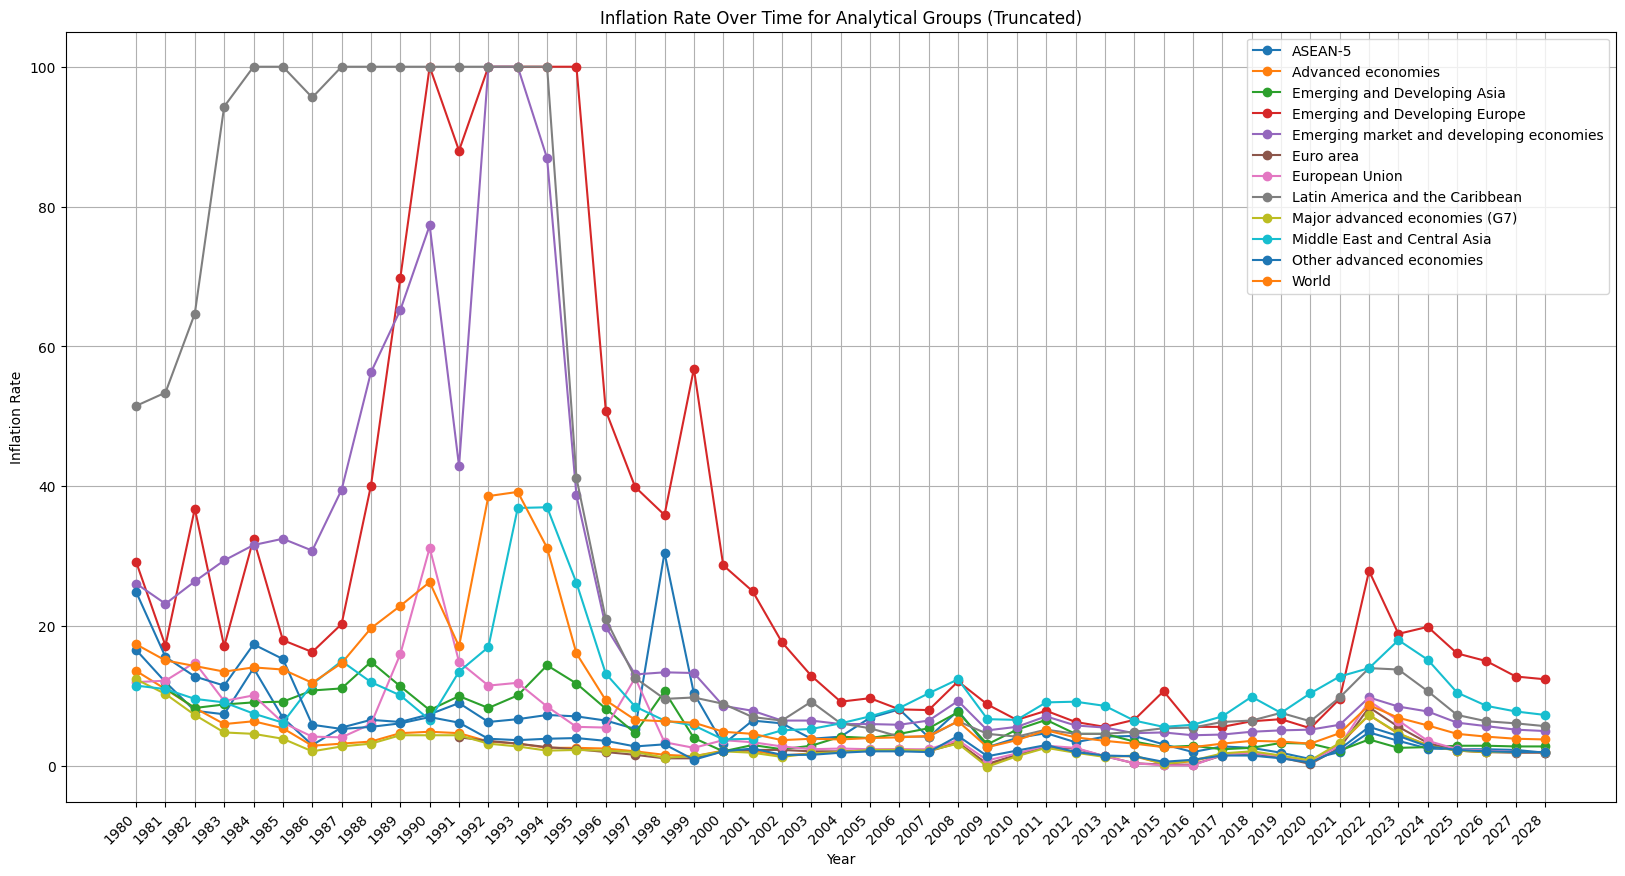

In [39]:
# Set a threshold for extreme values
threshold = 100

# Truncate extreme values
inflation_rate_pivot['Inflation Rate'] = np.clip(inflation_rate_pivot['Inflation Rate'], None, threshold)

# Plotting
plt.figure(figsize=(20, 10))
for group, data_group in inflation_rate_pivot.groupby('Analytical Group'):
    plt.plot(data_group['Year'], data_group['Inflation Rate'], label=group, marker='o')

plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over Time for Analytical Groups (Truncated)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


**Pre-pandemic**

- Trend across most groups shows a relatively stable and low inflation rate, especially in advanced economies and major economies like the G7. This suggests a period of economic stability and effective inflation control.

**Pandemic-period**

- The chart doesn't clearly demarcate the pandemic period, but assuming it begins around 2020, there is a notable uptick in inflation rates in several groups, most prominently in the 'World' category. This could be due to the economic impact of COVID-19 and the response measures, such as increased fiscal spending and supply chain disruptions.

**Recent years**

- In the most recent years on the chart, inflation appears to be rising for most groups, with some experiencing sharper increases than others. This could reflect the ongoing economic challenges as the world adjusts to the new normal post-pandemic, including supply and demand imbalances.

**Generalities**

- In general, the chart illustrates that inflation has varied significantly between different global groups over time, with emerging and developing economies typically experiencing higher and more volatile inflation rates compared to advanced economies.

In [40]:
# Assuming inflation_rate_pivot is your DataFrame
inflation_rate_world = inflation_rate_pivot.set_index('Year')
inflation_rate_world = inflation_rate_world.loc[inflation_rate_world['Analytical Group'] == 'World', ['Inflation Rate']]
inflation_rate_world.head()

Inflation Rate
Year                
1980            17.4
1981            15.1
1982            14.3
1983            13.5
1984            14.1

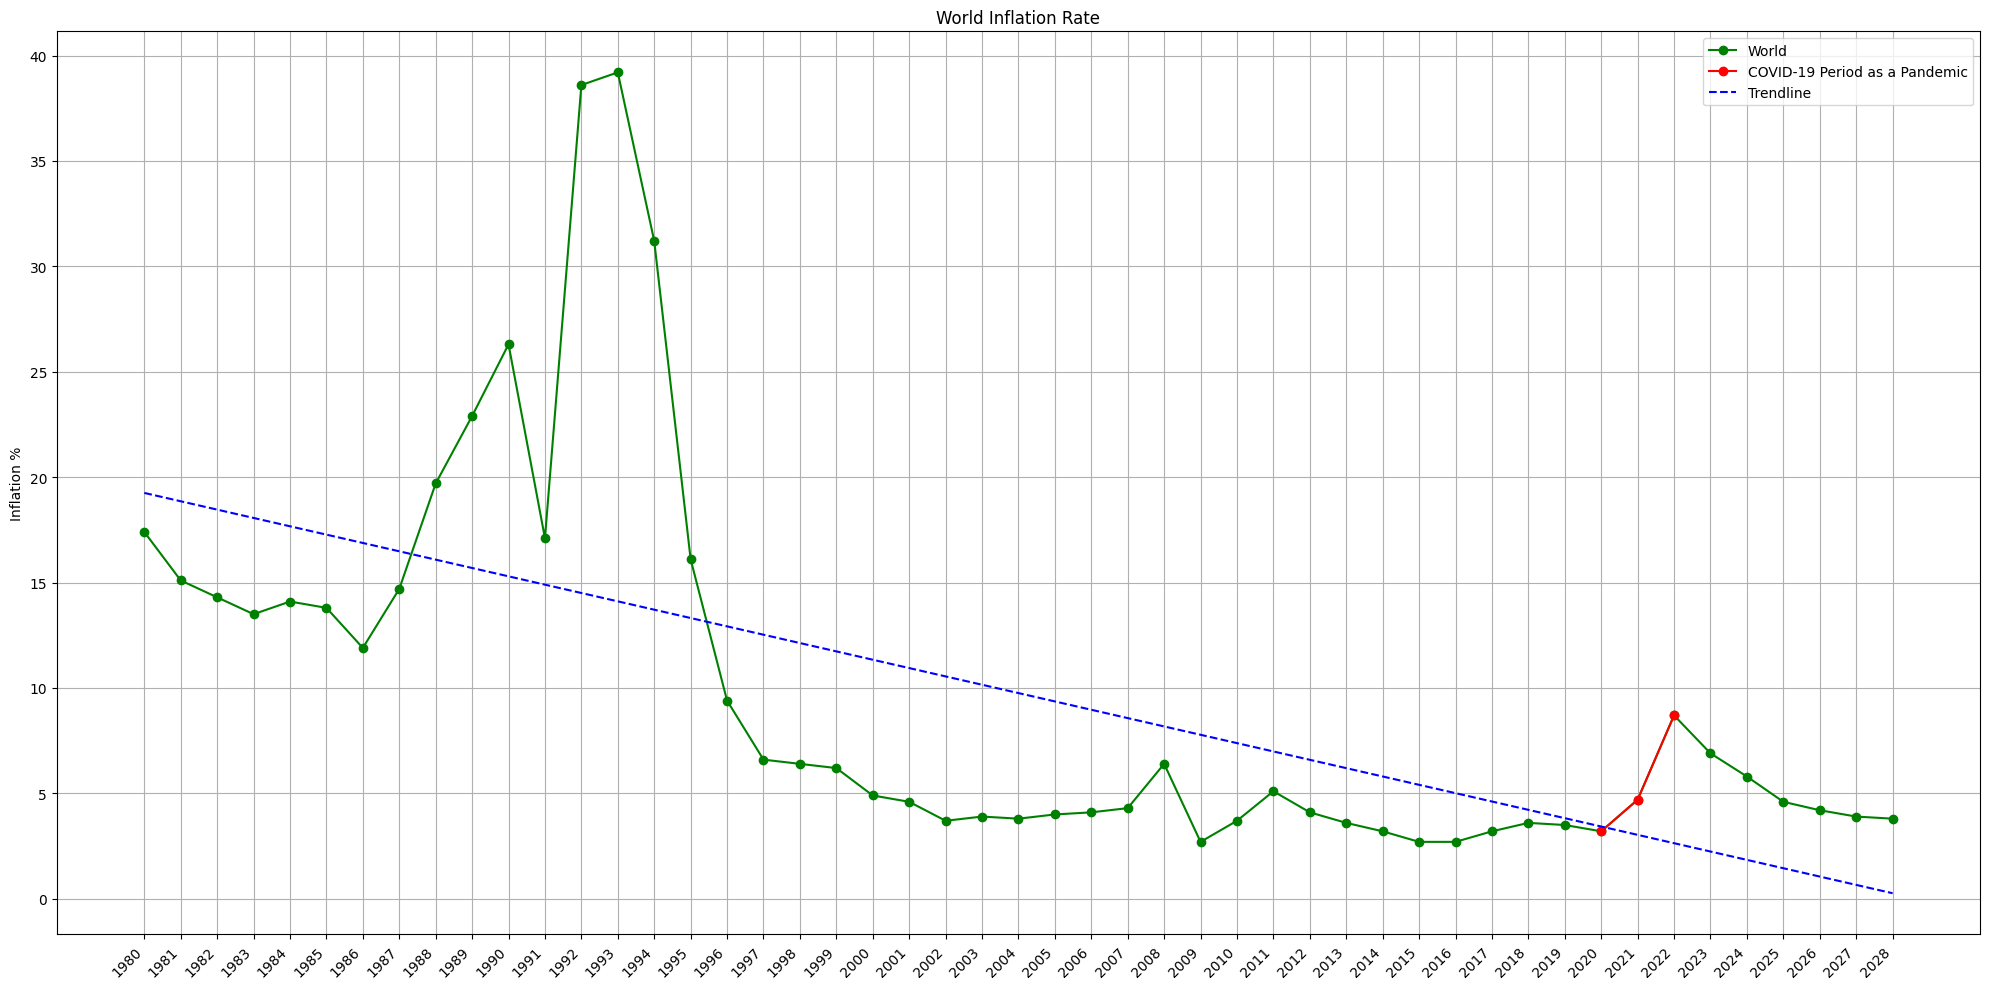

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(inflation_rate_world.index, 
         inflation_rate_world.values, 
         marker='o', color='green', label='World')

start_date = '2020'
end_date = '2022'
plt.plot(inflation_rate_world.loc[start_date:end_date].index, 
         inflation_rate_world.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(inflation_rate_world))
y = inflation_rate_world.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(inflation_rate_world.index, trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.ylabel('Inflation %')
plt.title('World Inflation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


**Pre-Pandemic**

- Before the pandemic, the inflation rate was generally following a downward trend, which suggests a period of economic stability and effective monetary policy in controlling inflation.

**Pandemic-Period** 

- During the pandemic, indicated by the red line, there was a significant spike in the inflation rate. This suggests that the COVID-19 pandemic had a substantial impact on the economy, leading to increased inflation during that period.

**Recent Years**

- In the most recent years, the chart shows that the inflation rate has begun to stabilize and decrease following the pandemic spike. This could indicate a recovery phase where economies are adjusting and stabilizing after the disruptions caused by the pandemic.

**Generalities**

- A generality that can be inferred from the chart is that inflation rates are subject to significant fluctuations due to extraordinary events, such as a pandemic, but the overall long-term trend has been downward. This could be indicative of long-term improvements in economic management, technology, and globalization, which have helped to keep inflation in check over the decades.

In [42]:
inflation_rate_world_plot = inflation_rate_world.loc['2017':'2023']
iflation_rate_world_plot = pd.DataFrame(inflation_rate_world_plot)

print(e_open_yearly)
print(inflation_rate_world_plot)

Date
2017     523.951375
2018     485.397384
2019     181.771947
2020     305.899433
2021    2771.215477
2022    1994.226119
2023    1735.026425
Name: e_open, dtype: float64
      Inflation Rate
Year                
2017             3.2
2018             3.6
2019             3.5
2020             3.2
2021             4.7
2022             8.7
2023             6.9


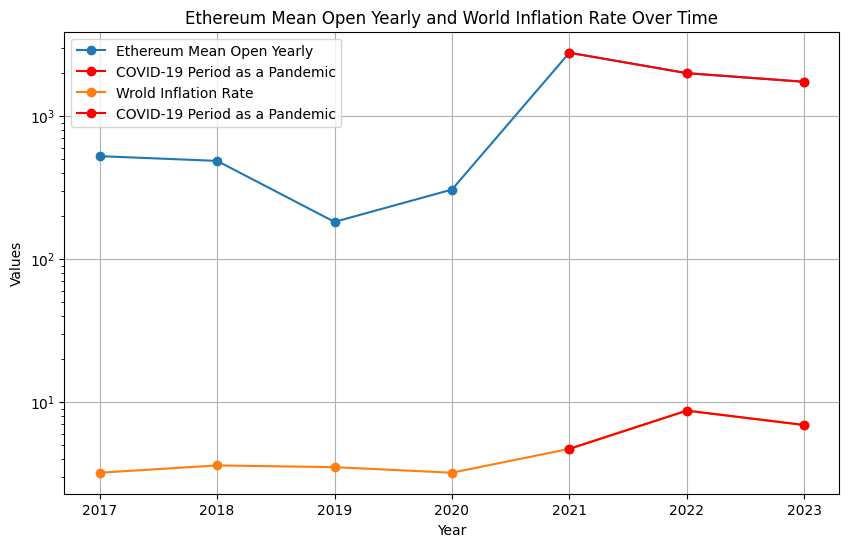

In [43]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot 'e_open_yearly'
plt.plot(e_open_yearly.index, 
         e_open_yearly.values, 
         label='Ethereum Mean Open Yearly', marker='o')


start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(e_open_yearly.loc[start_date:end_date].index, 
         e_open_yearly.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')



# Plot 'inflation_rate_world_plot'
plt.plot(inflation_rate_world_plot.index, 
         inflation_rate_world_plot['Inflation Rate'], 
         label='Wrold Inflation Rate', marker='o')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(inflation_rate_world_plot.loc[start_date:end_date].index, 
         inflation_rate_world_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')


plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Ethereum Mean Open Yearly and World Inflation Rate Over Time')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

**Pre-pandemic**

- Prior to the pandemic, Ethereum's price appears relatively stable or slightly decreasing, while the world inflation rate is low and stable. This suggests a period of relative economic stability without significant inflationary pressures.

**Pandemic-period**

- During the pandemic period, there's a notable increase in Ethereum prices, which coincides with a period where traditional financial markets were volatile and many investors looked for alternative assets. The inflation rate also begins to rise during this period, possibly due to the economic impact of the pandemic and subsequent stimulus measures.

**Recent years**

- In the most recent years, Ethereum's price shows high volatility with a significant increase, while the world inflation rate also rises. This could imply that inflation and the increased interest in digital assets like Ethereum may be related to a search for hedges against inflation.

**Generalities**
  
- General trends show that Ethereum has experienced significant volatility with an overall upward trend in price, while the world inflation rate has gradually increased, particularly in the last couple of years, likely influenced by expansive fiscal policies and supply chain disruptions.

# Bitcoin 

In [44]:
#Relating with the df
bitcoin = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\BTC-USD.csv')
bitcoin.head()


Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [45]:
# Quality of data; ensuring there is no empty data or weird outliers
bitcoin.isna().sum()
bitcoin.describe()

Open          High           Low         Close     Adj Close  \
count   3363.000000   3363.000000   3363.000000   3363.000000   3363.000000   
mean   14322.428809  14659.485504  13958.739714  14332.506282  14332.506282   
std    16040.155997  16429.306906  15602.519761  16040.910563  16040.910563   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      901.023499    914.279480    884.140992    901.871491    901.871491   
50%     8189.771973   8308.450195   7956.774414   8192.494141   8192.494141   
75%    23189.826172  23669.445312  22790.122070  23205.432617  23205.432617   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.363000e+03  
mean   1.648900e+10  
std    1.914707e+10  
min    5.914570e+06  
25%    1.494235e+08  
50%    1.108310e+10  
75%    2.687238e+10  
max    3.509679e+11

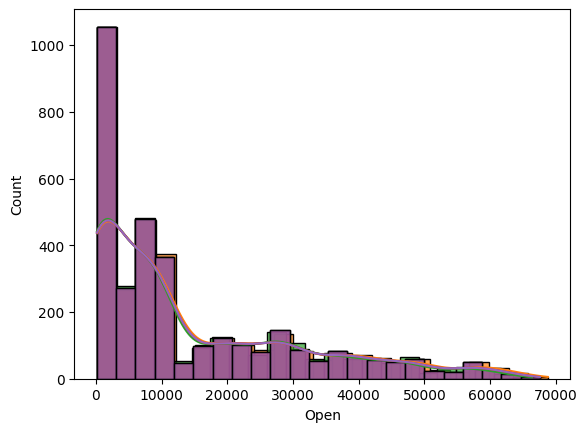

In [46]:
# Visualizing the described data
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    sns.histplot(bitcoin[column], kde=True, label=column, alpha=0.7)

plt.show()


In [47]:
# Renaming columns and assigning correct dtype
bitcoin.rename(columns={'Volume': 'b_volume', 'Open': 'b_open'}, inplace=True)
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# Resampling by month and mean b_open
b_open_monthly = bitcoin.resample('M', on='Date')['b_open'].mean()

# Eliminating day number from date
b_open_monthly.index = b_open_monthly.index.strftime('%Y-%m')
b_open_monthly.head()

Date
2014-09    412.654003
2014-10    365.748000
2014-11    364.850235
2014-12    343.074836
2015-01    251.799905
Name: b_open, dtype: float64

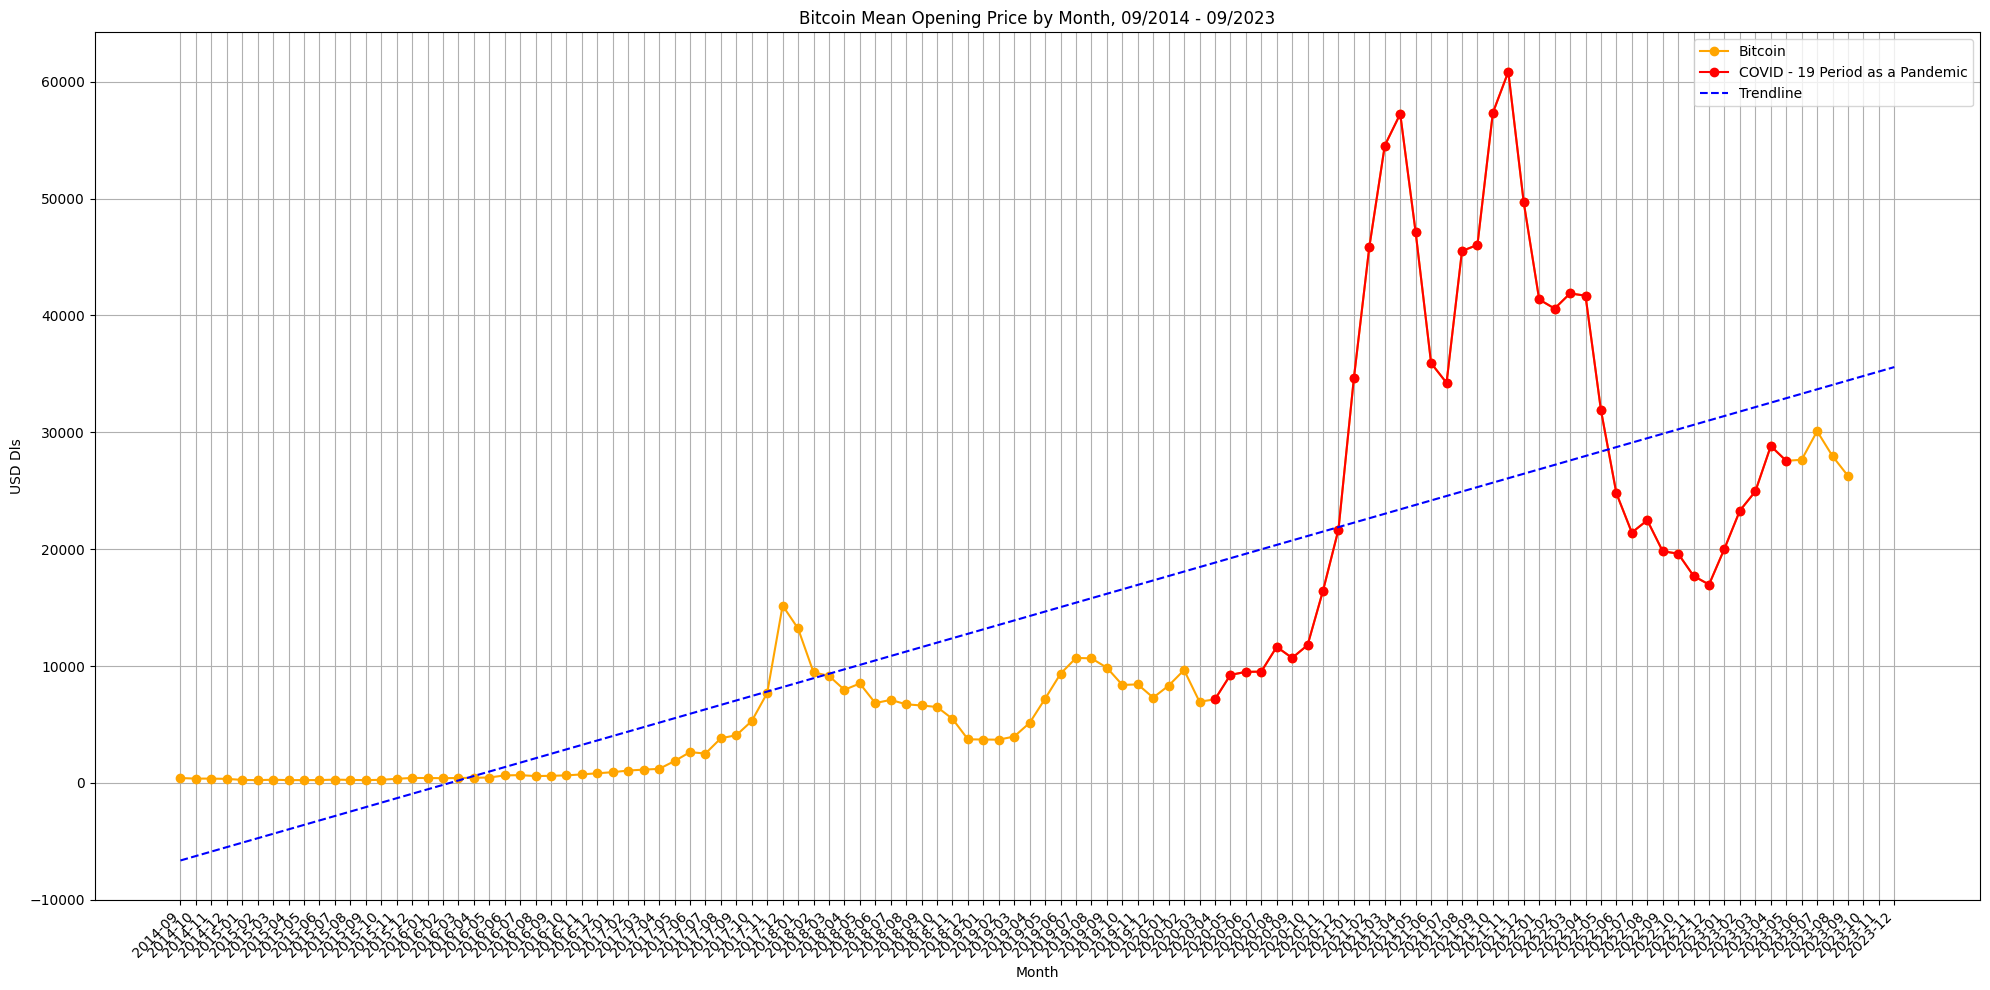

In [48]:
# Your existing code for plotting
plt.figure(figsize=(20, 10))
end_date1 = '2023-09'
plt.plot(b_open_monthly.loc[:end_date1].index,
         b_open_monthly.loc[:end_date1].values, 
         marker='o', color='orange', label='Bitcoin')

# Plot the specific time period (03/2020 - 05/2023) in red
start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(b_open_monthly.loc[start_date:end_date].index,
         b_open_monthly.loc[start_date:end_date].values,
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(b_open_monthly))
y = b_open_monthly.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(b_open_monthly.index, trendline(x), linestyle='--', color='blue', label='Trendline')

# Rest of your code for formatting and displaying the plot
plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Bitcoin Mean Opening Price by Month, 09/2014 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Data shows a general upward trend in Bitcoin prices with periodic fluctuations, indicating a growing interest and investment in Bitcoin as a digital asset.

**Pandemic-period**

- The pandemic period shows a significant increase in Bitcoin's price, reaching all-time highs. This could reflect a surge in demand for digital assets as alternative investments during the economic uncertainty caused by the pandemic.

**Recent years**

- In the most recent years, the graph displays high volatility in Bitcoin prices with peaks and sharp declines, suggesting that the market is still finding its balance in the post-pandemic period with potentially new investors and changing regulatory environments.

**Generalities**

- Generally, the overall trend from 2014 to 2023 is an increase in the price of Bitcoin, with significant volatility. The graph shows that Bitcoin has gone through multiple cycles of rapid growth and corrections.

Gradient (Slope) for Bitcoin Trendline: 0.02841248179663603
Gradient (Slope) for Ethereum Trendline: 0.03873739187101869


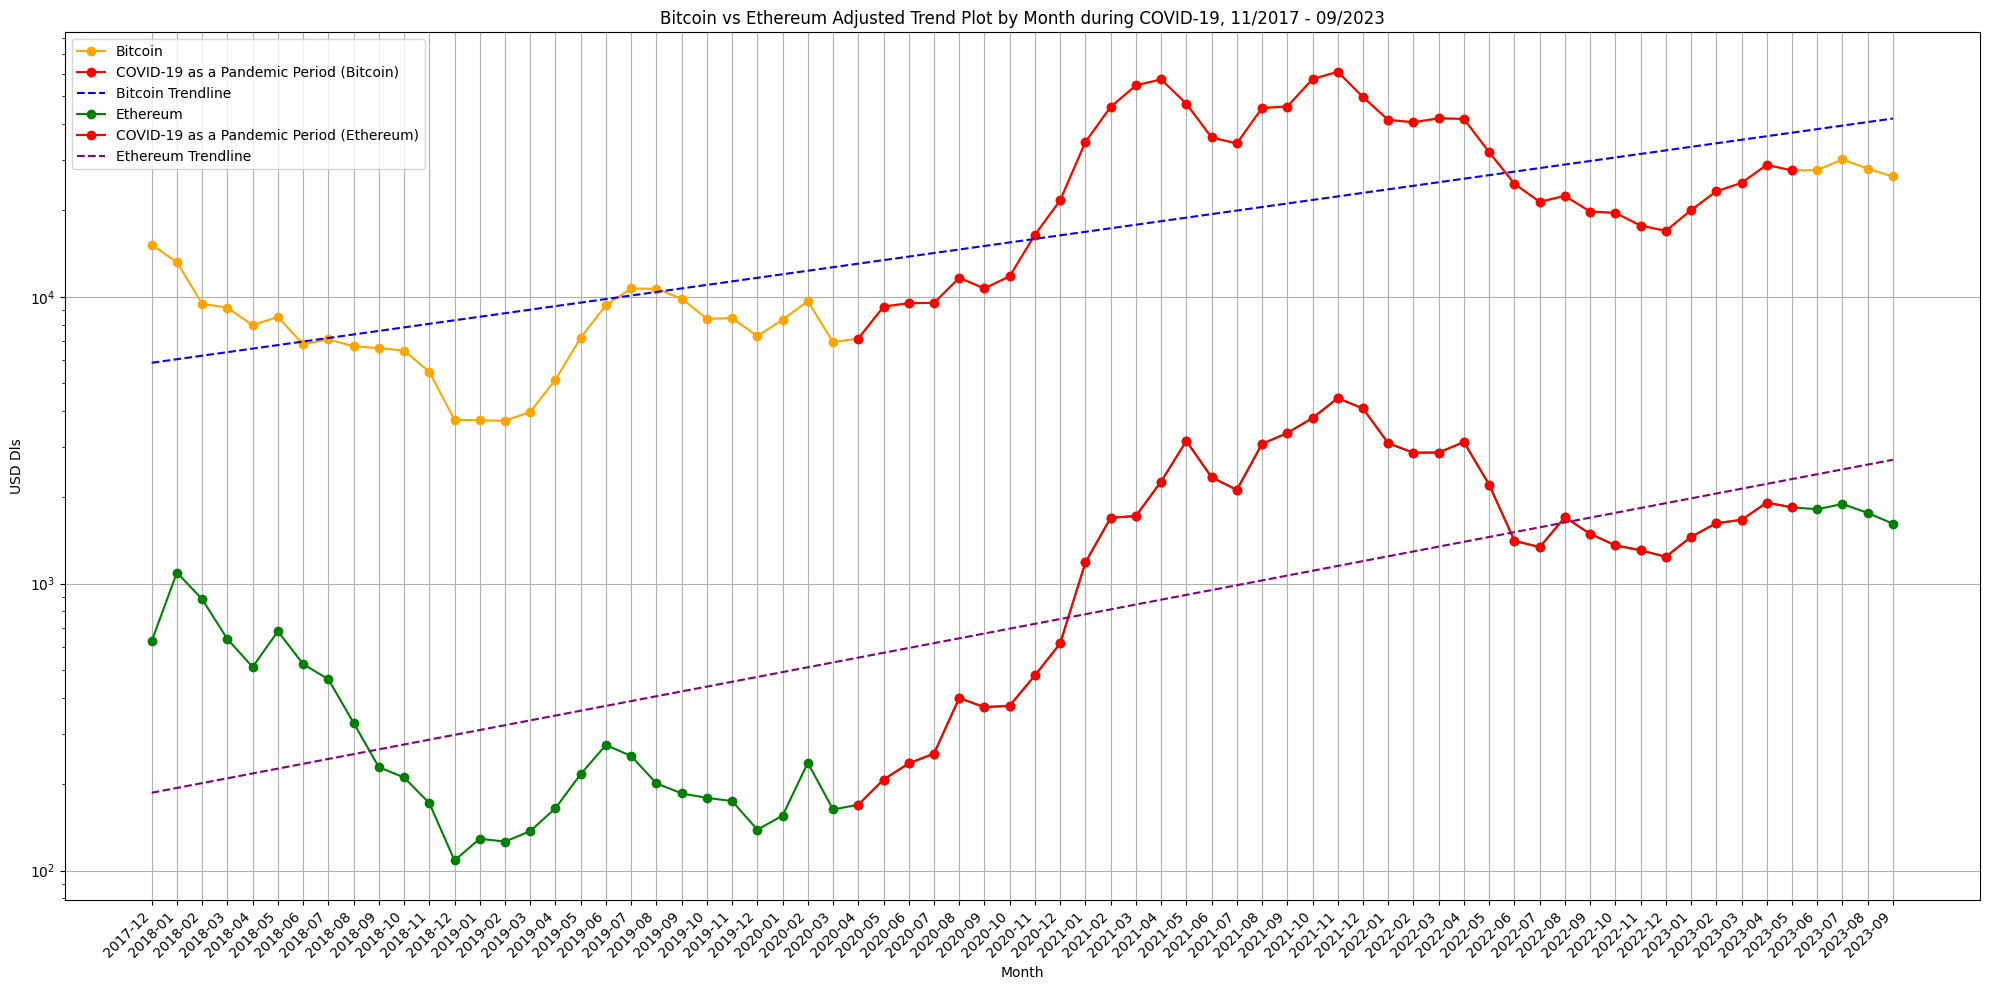

In [49]:
# Visualize df through dates
plt.figure(figsize=(20, 10))

# Bitcoin Monthly Open plot
start_date_btc = '2017-11-01'
end_date_btc = '2023-09'
plt.plot(b_open_monthly.loc[start_date_btc:end_date_btc].index, 
         b_open_monthly.loc[start_date_btc:end_date_btc].values, 
         marker='o', color='orange', label='Bitcoin')

# Plot the COVID-19 time period (03/2020 - 05/2023) in red for Bitcoin
start_date_covid = '2020-03-01'
end_date_covid = '2023-05-01'
plt.plot(b_open_monthly.loc[start_date_covid:end_date_covid].index,
         b_open_monthly.loc[start_date_covid:end_date_covid].values,
         marker='o', color='red', label='COVID-19 as a Pandemic Period (Bitcoin)')

# Calculate and plot the trendline for Bitcoin
x_btc = np.arange(len(b_open_monthly.loc[start_date_btc:end_date_btc]))
y_btc = b_open_monthly.loc[start_date_btc:end_date_btc].values.squeeze()
coefficients_btc = np.polyfit(x_btc, np.log(y_btc), 1)
trendline_btc = np.poly1d(coefficients_btc)
plt.plot(b_open_monthly.loc[start_date_btc:end_date_btc].index, np.exp(trendline_btc(x_btc)), linestyle='--', color='blue', label='Bitcoin Trendline')

# Print the gradient for Bitcoin trendline
btc_gradient = coefficients_btc[0]
print(f'Gradient (Slope) for Bitcoin Trendline: {btc_gradient}')

# Ethereum Monthly Open plot
start_date_eth = '2017-11-01'
end_date_eth = '2023-09-01'
plt.plot(e_open_monthly.loc[start_date_eth:end_date_eth].index, 
         e_open_monthly.loc[start_date_eth:end_date_eth].values, 
         marker='o', color='green', label='Ethereum')

# Plot the COVID-19 time period (03/2020 - 05/2023) in red for Ethereum
plt.plot(e_open_monthly.loc[start_date_covid:end_date_covid].index, 
         e_open_monthly.loc[start_date_covid:end_date_covid].values, 
         marker='o', color='red', label='COVID-19 as a Pandemic Period (Ethereum)')

# Calculate and plot the trendline for Ethereum
x_eth = np.arange(len(e_open_monthly.loc[start_date_eth:end_date_eth]))
y_eth = e_open_monthly.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_eth = np.polyfit(x_eth, np.log(y_eth), 1)
trendline_eth = np.poly1d(coefficients_eth)
plt.plot(e_open_monthly.loc[start_date_eth:end_date_eth].index, np.exp(trendline_eth(x_eth)), linestyle='--', color='purple', label='Ethereum Trendline')

# Print the gradient for Ethereum trendline
eth_gradient = coefficients_eth[0]
print(f'Gradient (Slope) for Ethereum Trendline: {eth_gradient}')

plt.yscale('log') 
plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Bitcoin vs Ethereum Adjusted Trend Plot by Month during COVID-19, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Ethereum was increasing in value at a faster rate compared to Bitcoin, as indicated by a steeper slope in its trendline.

**Pandemic-period**

- Ethereum showed a significant increase in volatility and price, indicating a stronger market reaction during the pandemic compared to Bitcoin.

**Recent years**

- Both cryptocurrencies have stabilized somewhat, but Ethereum's price exhibits a declining trend after a peak, suggesting a possible market correction or decreased investor interest.
  
**Generalities**

- Across the entire period, Ethereum's growth rate outpaced Bitcoin's, as reflected by a higher gradient in its trendline.e.

In [50]:
# Renaming columns and assigning correct dtype
bitcoin.rename(columns={'Volume': 'b_volume', 'Open': 'b_open'}, inplace=True)
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# Resampling by month and mean b_open
b_open_yearly = bitcoin.resample('Y', on='Date')['b_open'].mean()

# Eliminating day number from date
b_open_yearly.index = b_open_yearly.index.strftime('%Y')


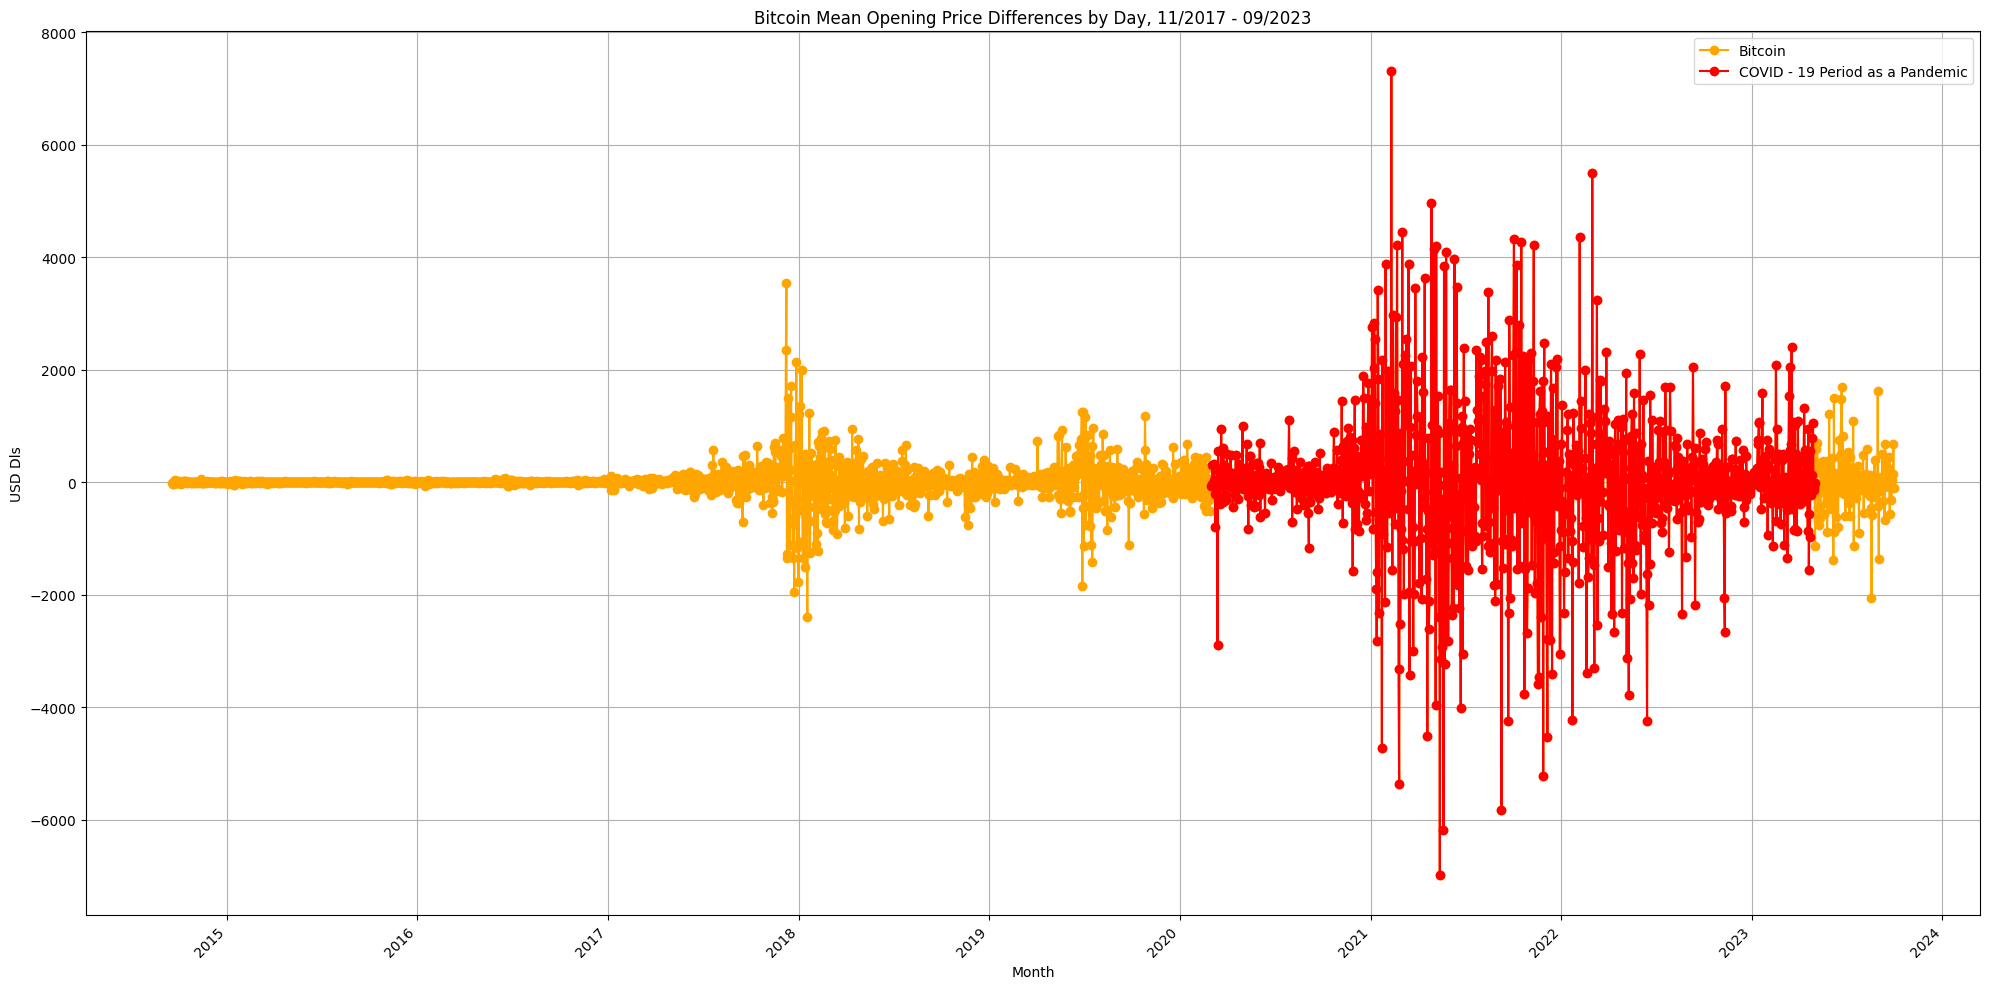

In [51]:
# Bitcoin daily differences
bitcoin_daily_diff = bitcoin[['Date', 'b_open']]
bitcoin_daily_diff.loc[:, 'b_open'] = bitcoin_daily_diff['b_open'].diff()
bitcoin_daily_diff_plot = bitcoin_daily_diff.copy()
bitcoin_daily_diff_plot = pd.DataFrame(bitcoin_daily_diff_plot)
bitcoin_daily_diff_plot = bitcoin_daily_diff_plot.set_index('Date')

plt.figure(figsize=(20, 10))
plt.plot(bitcoin_daily_diff_plot[:end_date1].index, 
         bitcoin_daily_diff_plot[:end_date1].values, 
         marker='o', color='orange', label='Bitcoin')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(bitcoin_daily_diff_plot.loc[start_date:end_date].index,
         bitcoin_daily_diff_plot.loc[start_date:end_date].values,
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Bitcoin Mean Opening Price Differences by Day, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Preparing data for plotting USD Dld differences by months
bitcoin_monthly_diff = pd.DataFrame(b_open_monthly)
bitcoin_monthly_diff['b_month_diff'] = bitcoin_monthly_diff['b_open'].diff()
bitcoin_monthly_diff['b_open'] = pd.to_numeric(bitcoin_monthly_diff['b_open'], errors='coerce').fillna(0)
bitcoin_monthly_diff['b_month_diff'] = pd.to_numeric(bitcoin_monthly_diff['b_month_diff'], errors='coerce').fillna(0)
bitcoin_monthly_diff = bitcoin_monthly_diff.reset_index()
bitcoin_monthly_diff = bitcoin_monthly_diff[['Date', 'b_month_diff']]
bitcoin_monthly_diff_plot = bitcoin_monthly_diff.copy()
bitcoin_monthly_diff_plot = bitcoin_monthly_diff_plot.set_index('Date')
print(bitcoin_monthly_diff_plot.head(10))

         b_month_diff
Date                 
2014-09      0.000000
2014-10    -46.906003
2014-11     -0.897765
2014-12    -21.775399
2015-01    -91.274931
2015-02    -18.978049
2015-03     36.456563
2015-04    -33.569752
2015-05      1.453139
2015-06     -0.220373


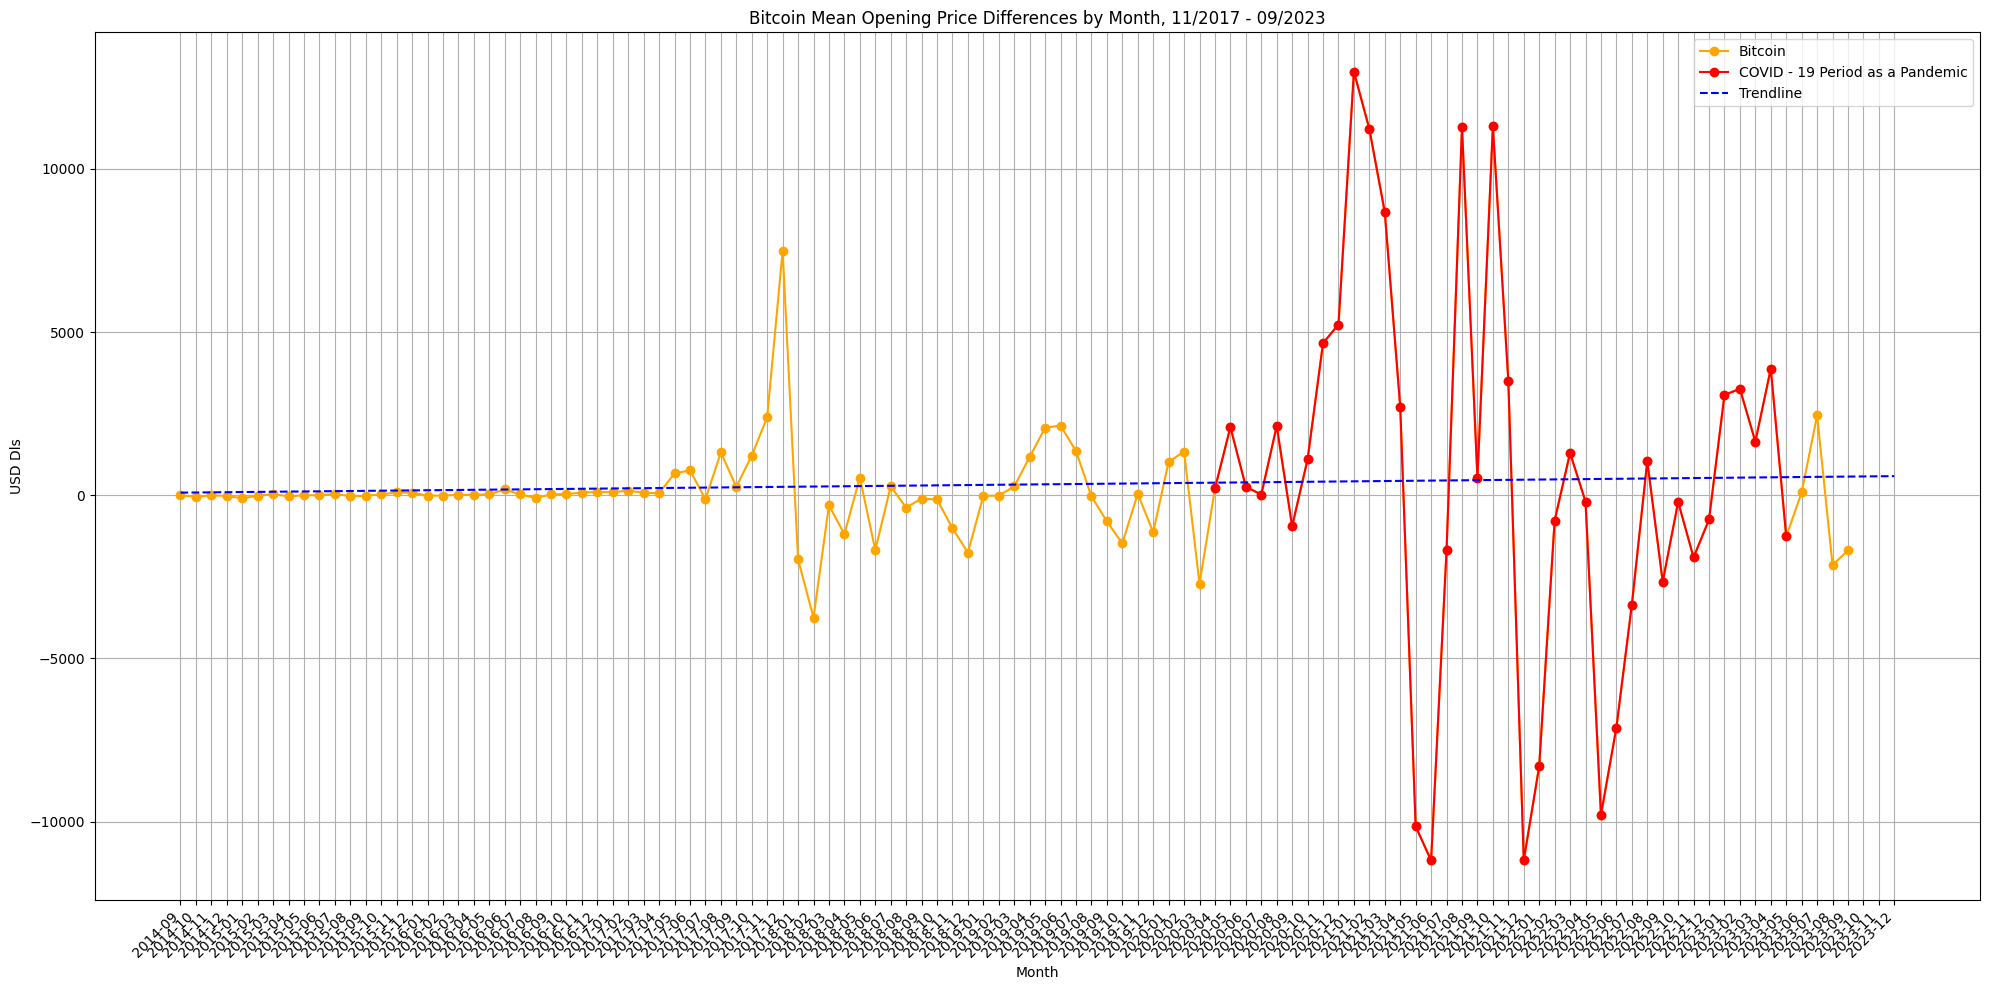

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(bitcoin_monthly_diff_plot.loc[:end_date1].index, 
         bitcoin_monthly_diff_plot.loc[:end_date1].values, 
         marker='o', color='orange', label='Bitcoin')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(bitcoin_monthly_diff_plot.loc[start_date:end_date].index,
         bitcoin_monthly_diff_plot.loc[start_date:end_date].values,
         marker='o', color='red', label='COVID - 19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(bitcoin_monthly_diff_plot))
y = bitcoin_monthly_diff_plot.values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(bitcoin_monthly_diff_plot.index, trendline(x), linestyle='--', color='blue', label='Trendline')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('Bitcoin Mean Opening Price Differences by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [54]:
# Trading Volume Analysis
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
bitcoin_org = bitcoin.copy()

b_volume_monthly = bitcoin.resample('M', on='Date')['b_volume'].sum()
bitcoin = bitcoin[(bitcoin['Date'] >= '2020-01') & (bitcoin['Date'] < '2023-10')]

b_volume_monthly.index = b_volume_monthly.index.strftime('%Y-%m')
b_volume_monthly = b_volume_monthly.reset_index()

b_volume_monthly_plot = bitcoin_org.resample('M', on='Date')['b_volume'].sum()
b_volume_monthly_plot.index = b_volume_monthly_plot.index.strftime('%Y-%m')


Gradient (Slope) for Bitcoin Trendline: 9,359,155,813.0000000000
Gradient (Slope) for Ethereum Trendline: 5,328,813,955.0000000000


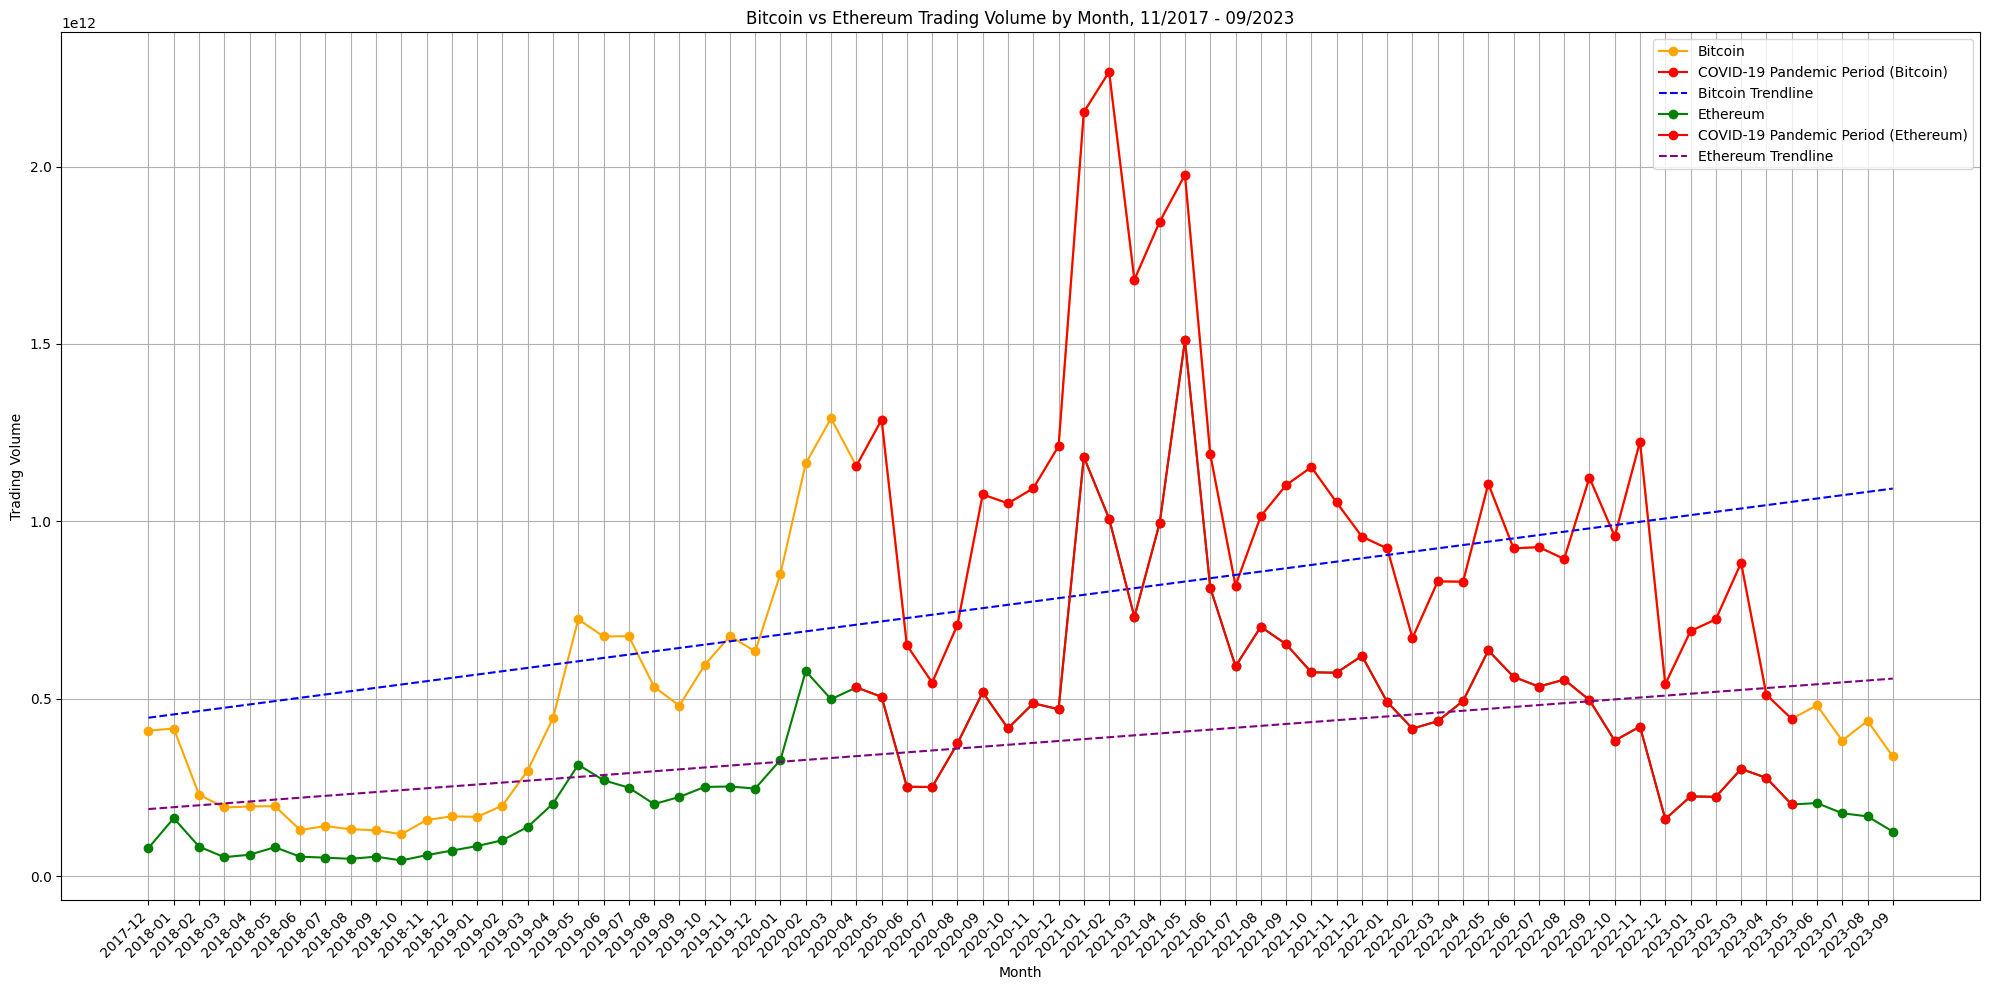

In [55]:
# Visualize df through dates
plt.figure(figsize=(20, 10))

# Bitcoin
start_date_btc = '2017-11-01'
end_date_btc = '2023-09'
plt.plot(b_volume_monthly_plot.loc[start_date_btc:end_date_btc].index, 
         b_volume_monthly_plot.loc[start_date_btc:end_date_btc].values, 
         marker='o', color='orange', label='Bitcoin')

# COVID-19 Pandemic Period for Bitcoin
start_date_covid = '2020-03-01'
end_date_covid = '2023-05-01'
plt.plot(b_volume_monthly_plot.loc[start_date_covid:end_date_covid].index,
         b_volume_monthly_plot.loc[start_date_covid:end_date_covid].values,
         marker='o', color='red', label='COVID-19 Pandemic Period (Bitcoin)')

# Calculate and plot the trendline for Bitcoin
x_btc = np.arange(len(b_volume_monthly_plot.loc[start_date_eth:end_date_eth]))
y_btc = b_volume_monthly_plot.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_btc = np.polyfit(x_btc, y_btc, 1)
trendline_btc = np.poly1d(coefficients_btc)
plt.plot(b_volume_monthly_plot.loc[start_date_eth:end_date_eth].index, trendline_btc(x_btc), linestyle='--', color='blue', label='Bitcoin Trendline')

# Format and round the gradient for Bitcoin trendline
btc_gradient = "{:,.10f}".format(round(coefficients_btc[0]))
print(f'Gradient (Slope) for Bitcoin Trendline: {btc_gradient}')

# Ethereum
start_date_eth = '2017-11-01'
end_date_eth = '2023-09-01'
plt.plot(e_volume_monthly_plot.loc[start_date_eth:end_date_eth].index, 
         e_volume_monthly_plot.loc[start_date_eth:end_date_eth].values, 
         marker='o', color='green', label='Ethereum')

# COVID-19 Pandemic Period for Ethereum
plt.plot(e_volume_monthly_plot.loc[start_date_covid:end_date_covid].index, 
         e_volume_monthly_plot.loc[start_date_covid:end_date_covid].values, 
         marker='o', color='red', label='COVID-19 Pandemic Period (Ethereum)')

# Calculate and plot the trendline for Ethereum
x_eth = np.arange(len(e_volume_monthly_plot.loc[start_date_eth:end_date_eth]))
y_eth = e_volume_monthly_plot.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_eth = np.polyfit(x_eth, y_eth, 1)
trendline_eth = np.poly1d(coefficients_eth)
plt.plot(e_volume_monthly_plot.loc[start_date_eth:end_date_eth].index, trendline_eth(x_eth), linestyle='--', color='purple', label='Ethereum Trendline')

# Format and round the gradient for Ethereum trendline
eth_gradient = "{:,.10f}".format(round(coefficients_eth[0]))
print(f'Gradient (Slope) for Ethereum Trendline: {eth_gradient}')

plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.title('Bitcoin vs Ethereum Trading Volume by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

**Pre-pandemic**

- Before the pandemic, Bitcoin's trading volume was generally increasing at a more rapid pace than Ethereum's, as suggested by the steeper slope of Bitcoin's trendline.

**Pandemic-period**

- The pandemic period shows a peak in trading volume for Ethereum that surpasses Bitcoin's, indicating a period of particularly high interest and activity in Ethereum during this time.

**Post-pandemic**

- Post-pandemic, the trading volume for both Bitcoin and Ethereum declines, with Ethereum showing a sharper decrease from its peak during the pandemic.

**Generalities**

- The general trend for both cryptocurrencies shows high volatility in trading volumes, with Bitcoin's overall growth rate in trading volume being higher than Ethereum's across the entire time period, as indicated by the larger gradient of its trendline.

# S&P 500 Index

In [56]:
#Relating with the df
sp500 = pd.read_csv(r'H:\Mi unidad\Data Analysis\Data sets\understadingethereumbehavior\SP_500.csv')
sp500.head()

Date      Open      High       Low    Close* Adj Close**  \
0  Dec 05, 2023  4,557.25  4,578.56  4,551.68  4,567.18    4,567.18   
1  Dec 04, 2023  4,564.37  4,572.37  4,546.72  4,569.78    4,569.78   
2  Dec 01, 2023  4,559.43  4,599.39  4,554.71  4,594.63    4,594.63   
3  Nov 30, 2023  4,554.87  4,569.89  4,537.24  4,567.80    4,567.80   
4  Nov 29, 2023  4,571.84  4,587.64  4,547.15  4,550.58    4,550.58   

          Volume  
0  3,909,950,000  
1  4,369,910,000  
2  4,397,120,000  
3  5,399,300,000  
4  4,418,760,000

In [57]:
# Visualizing the described data
#for column in ['Open', 'High', 'Low', 'Close*', 'Adj Close**']:
    #sns.histplot(sp500[column], kde=True, label=column, alpha=0.7)

#plt.show()


In [58]:
# Renaming columns and assigning correct dtype
sp500.rename(columns={'Volume': 'sp_volume', 'Open': 'sp_open'}, inplace=True)
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Assuming 'Date' is a column in your DataFrame
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Set 'Date' as the index
sp500.set_index('Date', inplace=True)

# Replace '-' with NaN in the 'Open' column
sp500['sp_open'] = sp500['sp_open'].replace('-', np.nan)

# Eliminating commas from numeric values
sp500 = sp500.applymap(lambda x: str(x).replace(',', ''))

# Replace the string "nan" with actual NaN values
sp500.replace("nan", np.nan, inplace=True)

# Convert 'Open' column to numeric
sp500['sp_open'] = pd.to_numeric(sp500['sp_open'])

# Resample the data on a monthly basis and calculate the mean of the 'Open' column

sp500_open_plot = sp500['sp_open'].resample('M').mean()

# Convert the index to the desired format 'YYYY-MM'
sp500_open_plot.index = sp500_open_plot.index.strftime('%Y-%m')

C:\Users\user\AppData\Local\Temp\ipykernel_16860\3147184534.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sp500 = sp500.applymap(lambda x: str(x).replace(',', ''))


288 24


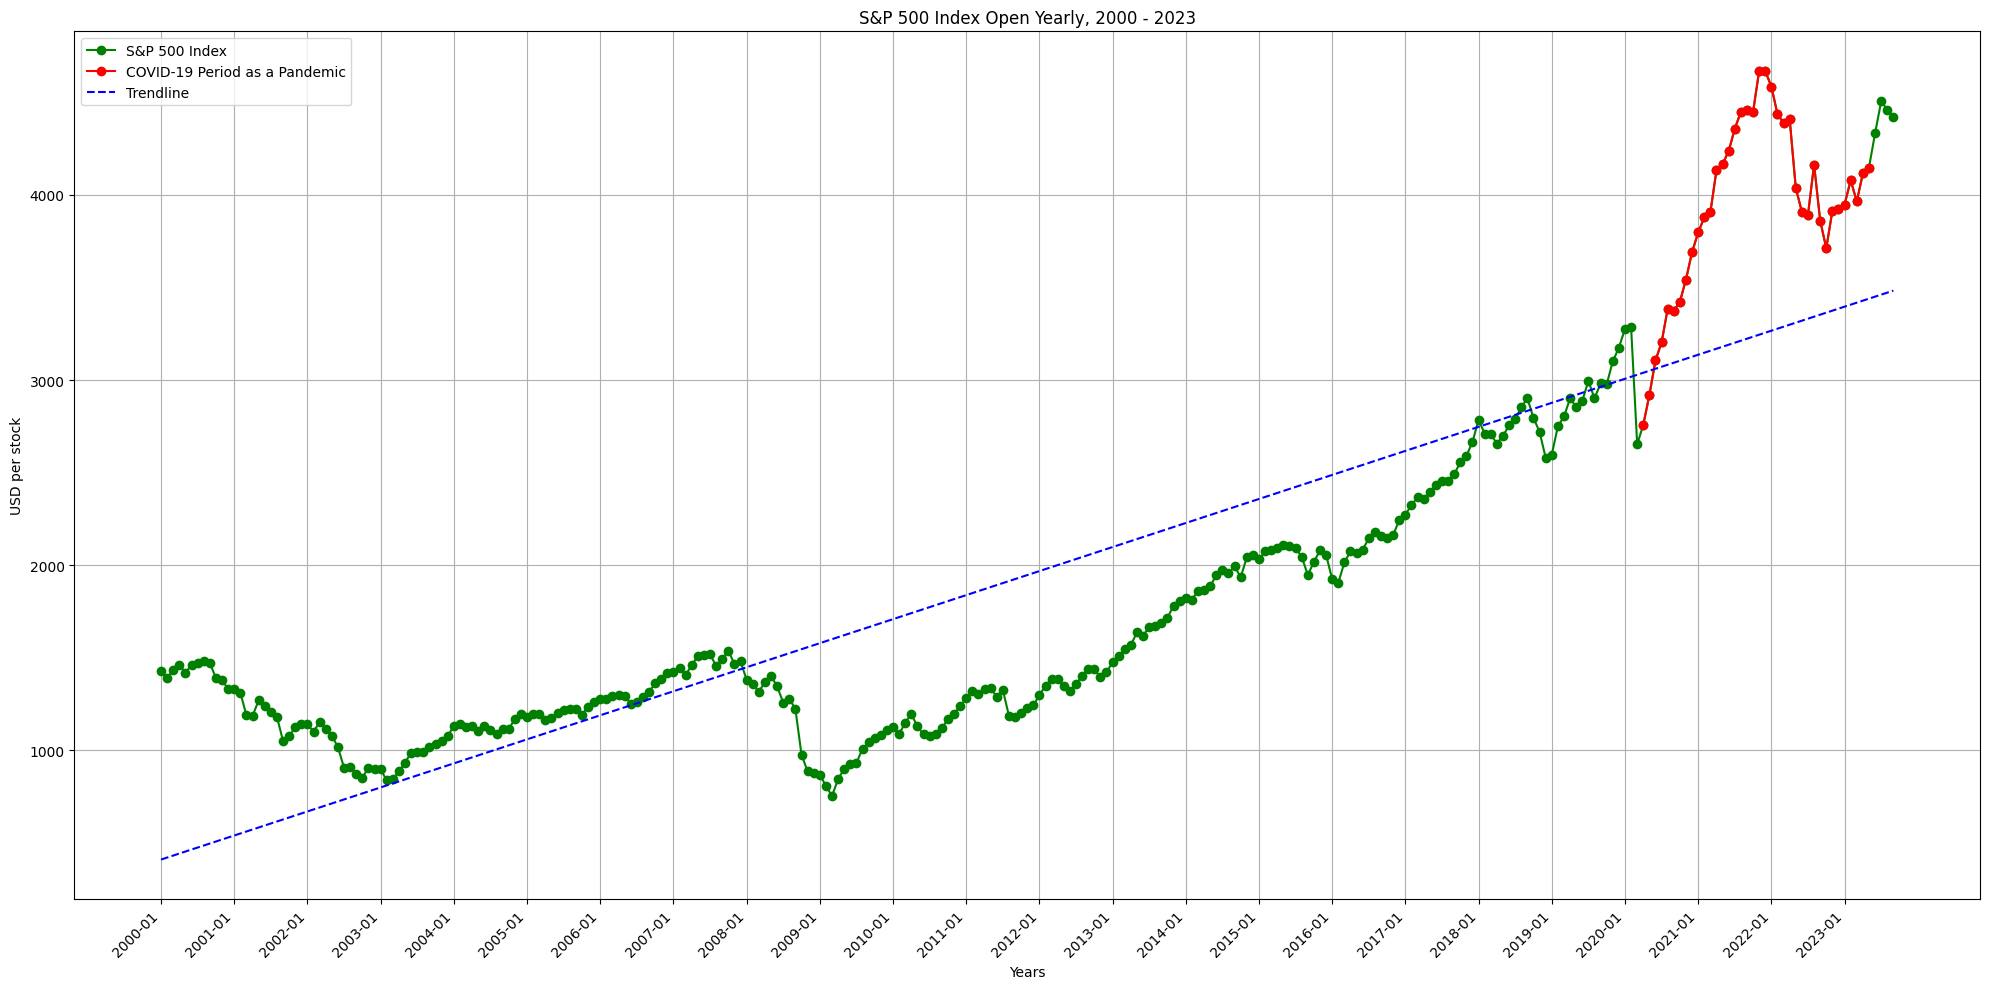

In [59]:

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(sp500_open_plot[:end_date1].index, 
         sp500_open_plot[:end_date1].values, 
         marker='o', color='green', label = 'S&P 500 Index')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(sp500_open_plot.loc[start_date:end_date].index, 
         sp500_open_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(sp500_open_plot[:end_date1].index))
y = sp500_open_plot[:end_date1].values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(sp500_open_plot[:end_date1].index, trendline(x), linestyle='--', color='blue', label='Trendline')



#Converting to extract yearly x ticks
years = gold['Open'].resample('Y').mean()
years.index = years.index.strftime('%Y')
years_plot = pd.date_range(start=years.index[0], end=years.index[-1], freq='YS').strftime('%Y')

# Check data lengths
print(len(sp500_open_plot), len(years))

# Adjust tick positions
tick_positions = range(0, len(sp500_open_plot), len(sp500_open_plot) // len(years_plot))
plt.xticks(ticks=tick_positions, labels=sp500_open_plot.index[::len(sp500_open_plot) // len(years_plot)],  rotation=45, ha='right')

plt.xlabel('Years')
plt.ylabel('USD per stock')
plt.title('S&P 500 Index Open Yearly, 2000 - 2023')

# Show the plot
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

**Pre-pandemic**

- The S&P 500 was on a long-term upward trend prior to the pandemic, as shown by the blue trendline.

**Pandemic-period**

- There was a significant drop in the S&P 500 at the onset of the pandemic, but it recovered quickly within the same period.

**Post-pandemic:

- The index continued its upward trend after the initial pandemic shock and reached new highs.

**Generalities**

- Over the entire period from 2000 to 2023, despite short-term fluctuations, the general trend for the S&P 500 is one of growth, as indicated by the upward-sloping trendline.

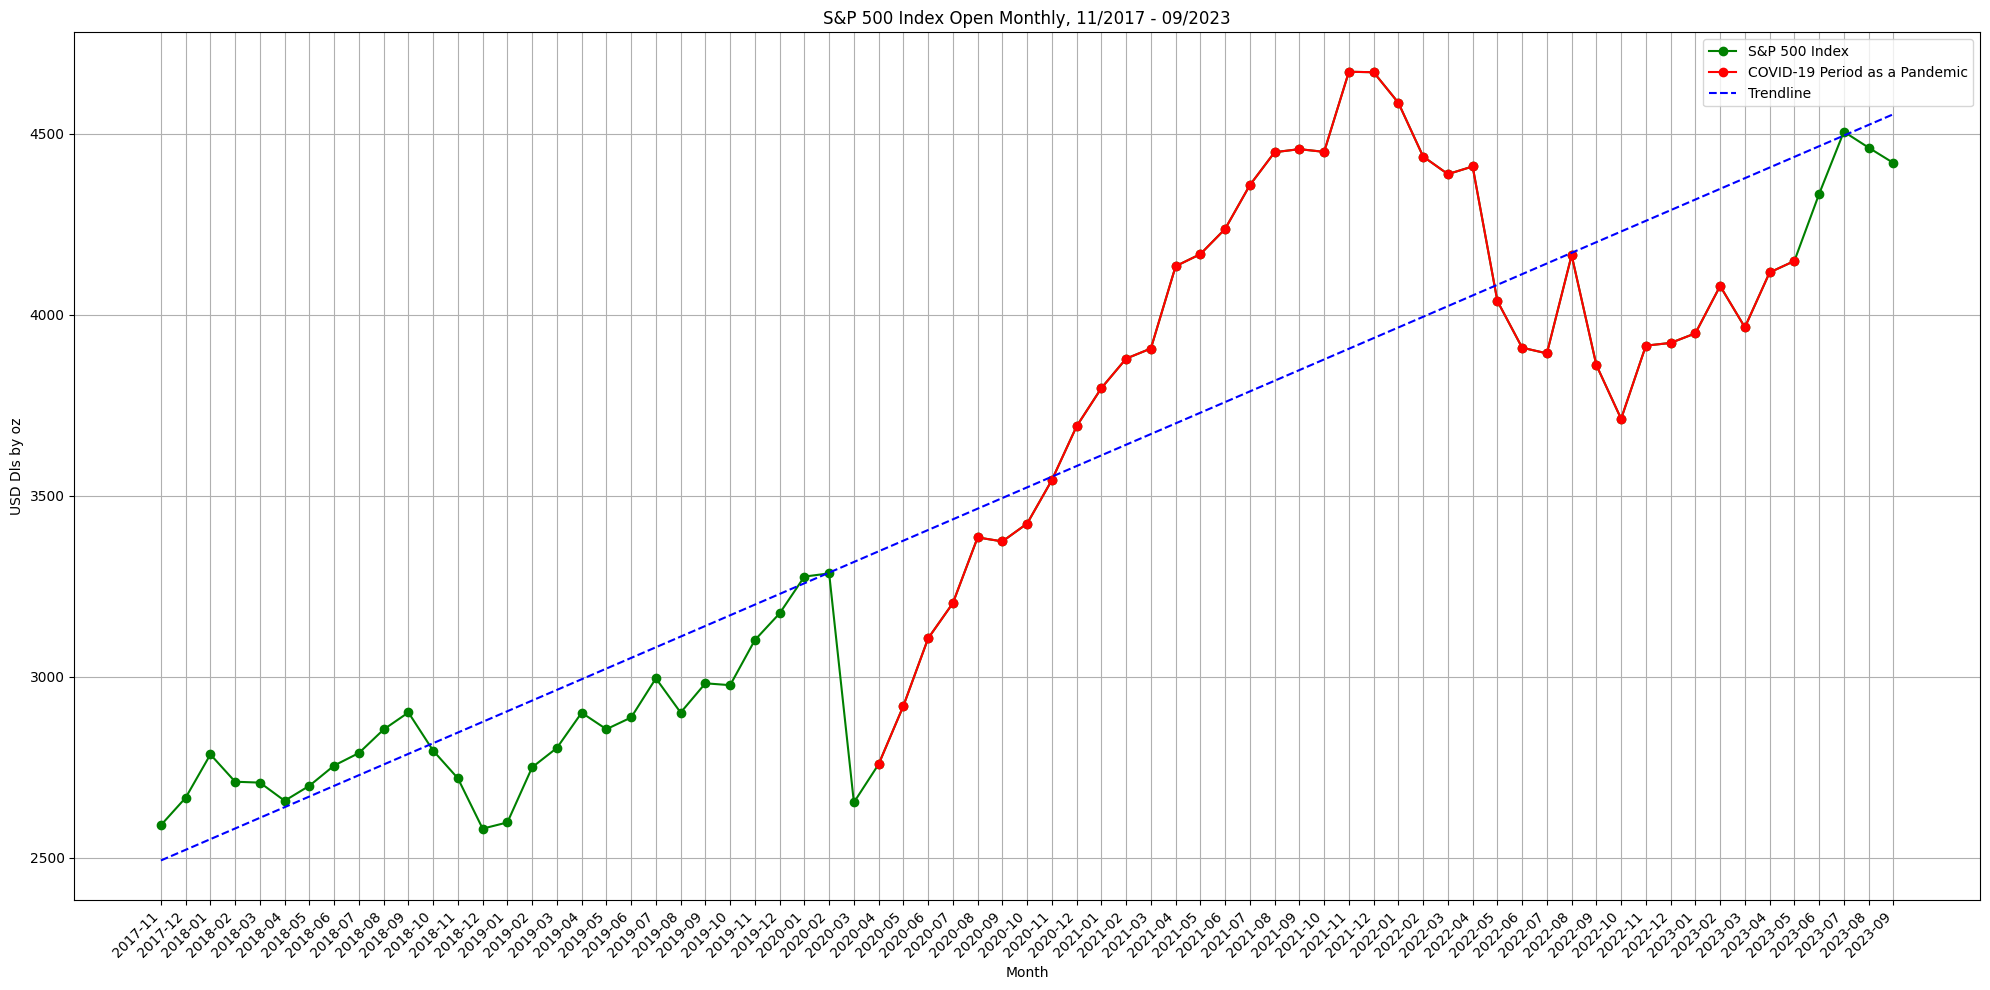

Slope: 29.44


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(sp500_open_plot['2017-11':'2023-09'].index, 
         sp500_open_plot['2017-11':'2023-09'].values, 
         marker='o', color='green', label='S&P 500 Index')

start_date = '2020-03-01'
end_date = '2023-05-01'
plt.plot(sp500_open_plot.loc[start_date:end_date].index, 
         sp500_open_plot.loc[start_date:end_date].values, 
         marker='o', color='red', label='COVID-19 Period as a Pandemic')

# Calculate the trendline
x = np.arange(len(sp500_open_plot['2017-11':'2023-09']))
y = sp500_open_plot['2017-11':'2023-09'].values.squeeze()  # Squeeze the DataFrame to a 1D array
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plot the trendline
plt.plot(sp500_open_plot['2017-11':'2023-09'].index, trendline(x), linestyle='--', color='blue', label='Trendline')

plt.xlabel('Month')
plt.ylabel('USD Dls by oz')
plt.title('S&P 500 Index Open Monthly, 11/2017 - 09/2023')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the slope value
slope = coefficients[0]
print(f'Slope: {slope:.2f}')


S&P 500 Index Slope: 29.44
Ethereum Slope: 34.27


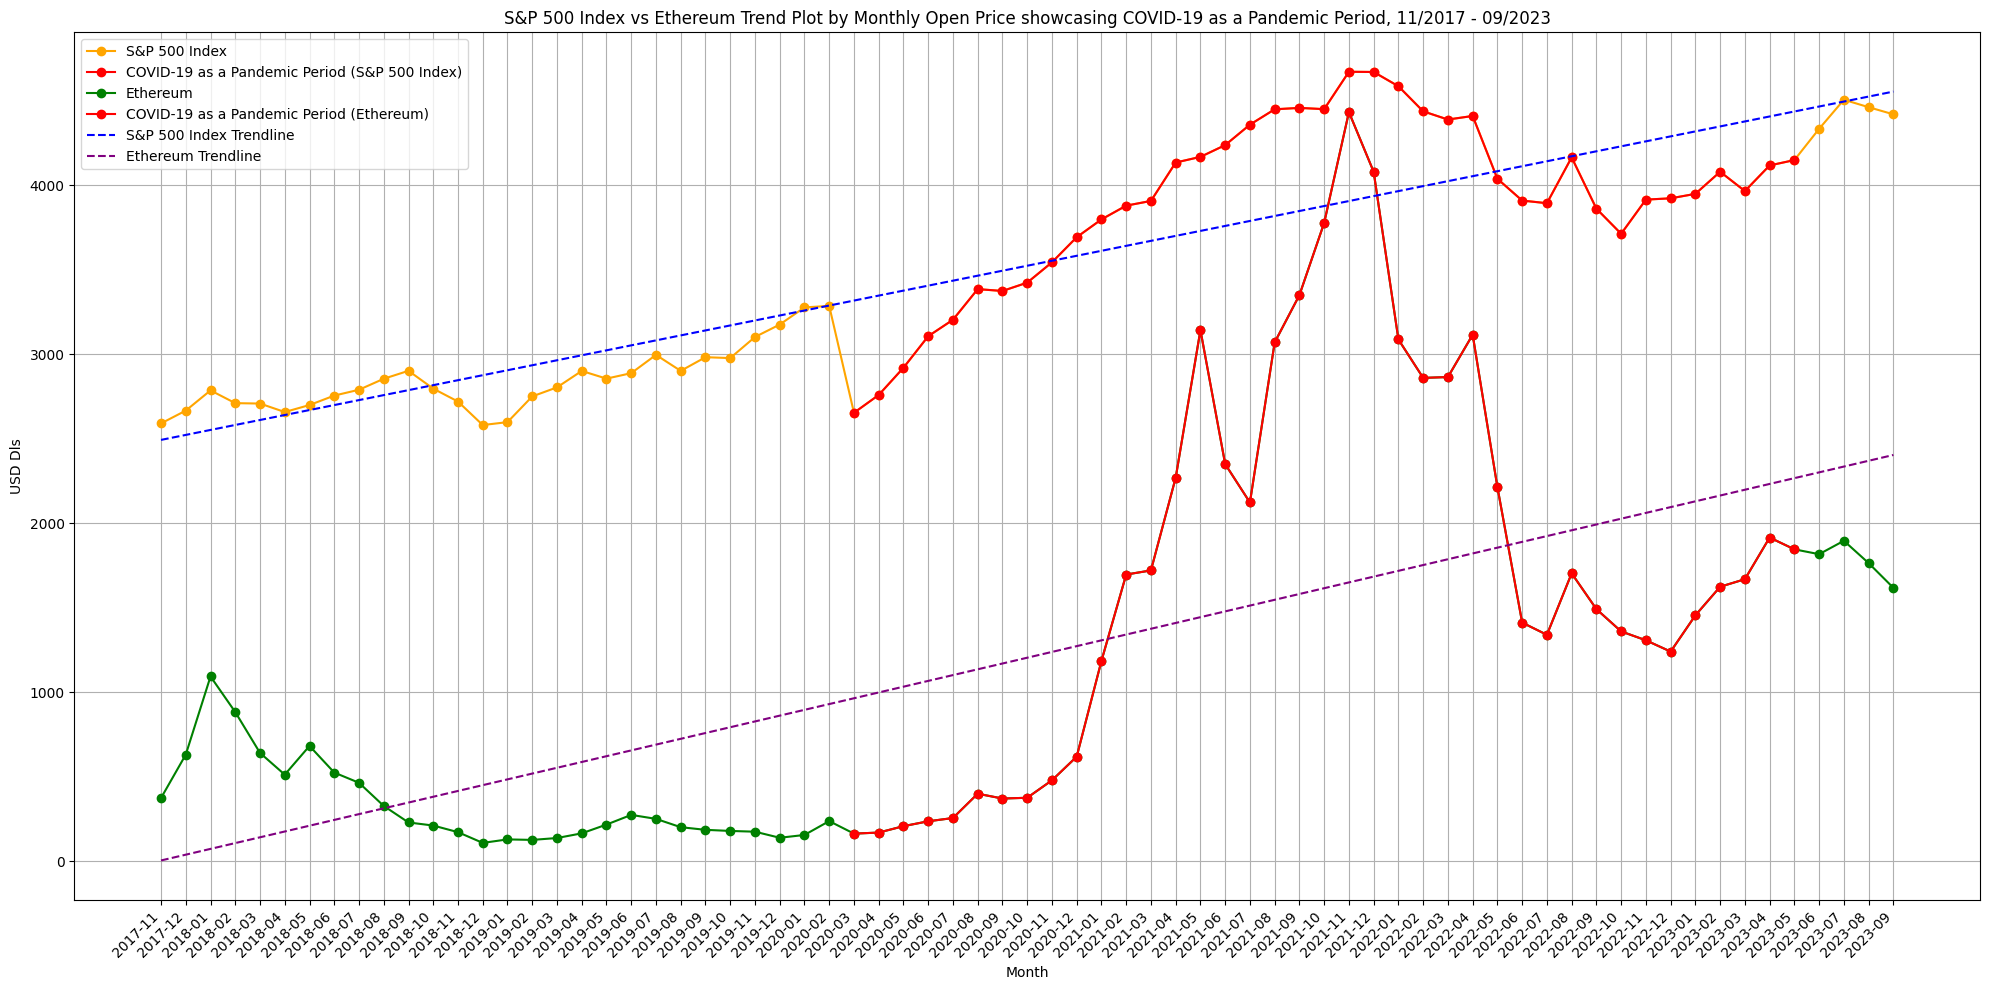

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize df through dates
plt.figure(figsize=(20, 10))

# S&P 500 Index Monthly Open plot
start_date_sp = '2017-11'
end_date_sp = '2023-09'
plt.plot(sp500_open_plot.loc[start_date_sp:end_date_sp].index, 
         sp500_open_plot.loc[start_date_sp:end_date_sp].values, 
         marker='o', color='orange', label='S&P 500 Index')

# Plot the COVID-19 time period (03/2020 - 05/2023) in red for S&P 500 Index
start_date_covid = '2020-03'
end_date_covid = '2023-05'
plt.plot(sp500_open_plot.loc[start_date_covid:end_date_covid].index, 
         sp500_open_plot.loc[start_date_covid:end_date_covid].values,
         marker='o', color='red', label='COVID-19 as a Pandemic Period (S&P 500 Index)')

# Ethereum Monthly Open plot
start_date_eth = '2017-11'
end_date_eth = '2023-09'
plt.plot(e_open_monthly.loc[start_date_eth:end_date_eth].index, 
         e_open_monthly.loc[start_date_eth:end_date_eth].values, 
         marker='o', color='green', label='Ethereum')

# Plot the COVID-19 time period (03/2020 - 05/2023) in red for Ethereum
plt.plot(e_open_monthly.loc[start_date_covid:end_date_covid].index, 
         e_open_monthly.loc[start_date_covid:end_date_covid].values, 
         marker='o', color='red', label='COVID-19 as a Pandemic Period (Ethereum)')

# Calculate the trendline for S&P 500 Index
x_sp = np.arange(len(sp500_open_plot.loc[start_date_sp:end_date_sp]))
y_sp = sp500_open_plot.loc[start_date_sp:end_date_sp].values.squeeze()
coefficients_sp = np.polyfit(x_sp, y_sp, 1)
trendline_sp = np.poly1d(coefficients_sp)

# Calculate the trendline for Ethereum
x_eth = np.arange(len(e_open_monthly.loc[start_date_eth:end_date_eth]))
y_eth = e_open_monthly.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_eth = np.polyfit(x_eth, y_eth, 1)
trendline_eth = np.poly1d(coefficients_eth)

# Display the trendlines for S&P 500 Index and Ethereum
plt.plot(sp500_open_plot.loc[start_date_sp:end_date_sp].index, trendline_sp(x_sp), linestyle='--', color='blue', label='S&P 500 Index Trendline')
plt.plot(e_open_monthly.loc[start_date_eth:end_date_eth].index, trendline_eth(x_eth), linestyle='--', color='purple', label='Ethereum Trendline')

# Print the slope values
slope_sp = coefficients_sp[0]
slope_eth = coefficients_eth[0]
print(f'S&P 500 Index Slope: {slope_sp:.2f}')
print(f'Ethereum Slope: {slope_eth:.2f}')

plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('S&P 500 Index vs Ethereum Trend Plot by Monthly Open Price showcasing COVID-19 as a Pandemic Period, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


**Pre-pandemic**

- Ethereum's price was on a generally increasing trend, though with some volatility, while the S&P 500 index showed more stability and a consistent upward trajectory.

**Pandemic-period**

- Ethereum experienced significant volatility with sharp increases and decreases in price, while the S&P 500 index showed a major drop followed by a swift recovery during the pandemic.

**Post-pandemic**

- Post-pandemic, Ethereum shows a downward trend, indicating a potential loss of investor confidence or market correction, while the S&P 500 index continued to trend upward, suggesting a more robust recovery in traditional markets compared to cryptocurrency.

**Generalities**

- The overall trend for Ethereum is more volatile with a higher slope, indicating a more aggressive price change over time, whereas the S&P 500 index shows a steadier and more gradual upward trend, highlighting the difference in stability between cryptocurrency and traditional equity markets.

In [62]:
sp500['sp_volume'] = sp500['sp_volume'].replace('-', np.nan)
sp500['sp_volume'] = pd.to_numeric(sp500['sp_volume'])
sp500_vol = sp500['sp_volume'].resample('M').sum()
sp500_vol

Date
2000-01-31    1.846810e+10
2000-02-29    2.091200e+10
2000-03-31    2.615620e+10
2000-04-30    2.010646e+10
2000-05-31    1.989830e+10
                  ...     
2023-08-31    8.684082e+10
2023-09-30    7.348298e+10
2023-10-31    7.995290e+10
2023-11-30    8.097057e+10
2023-12-31    1.267698e+10
Freq: M, Name: sp_volume, Length: 288, dtype: float64

S&P 500 Index Slope: 234449665.98


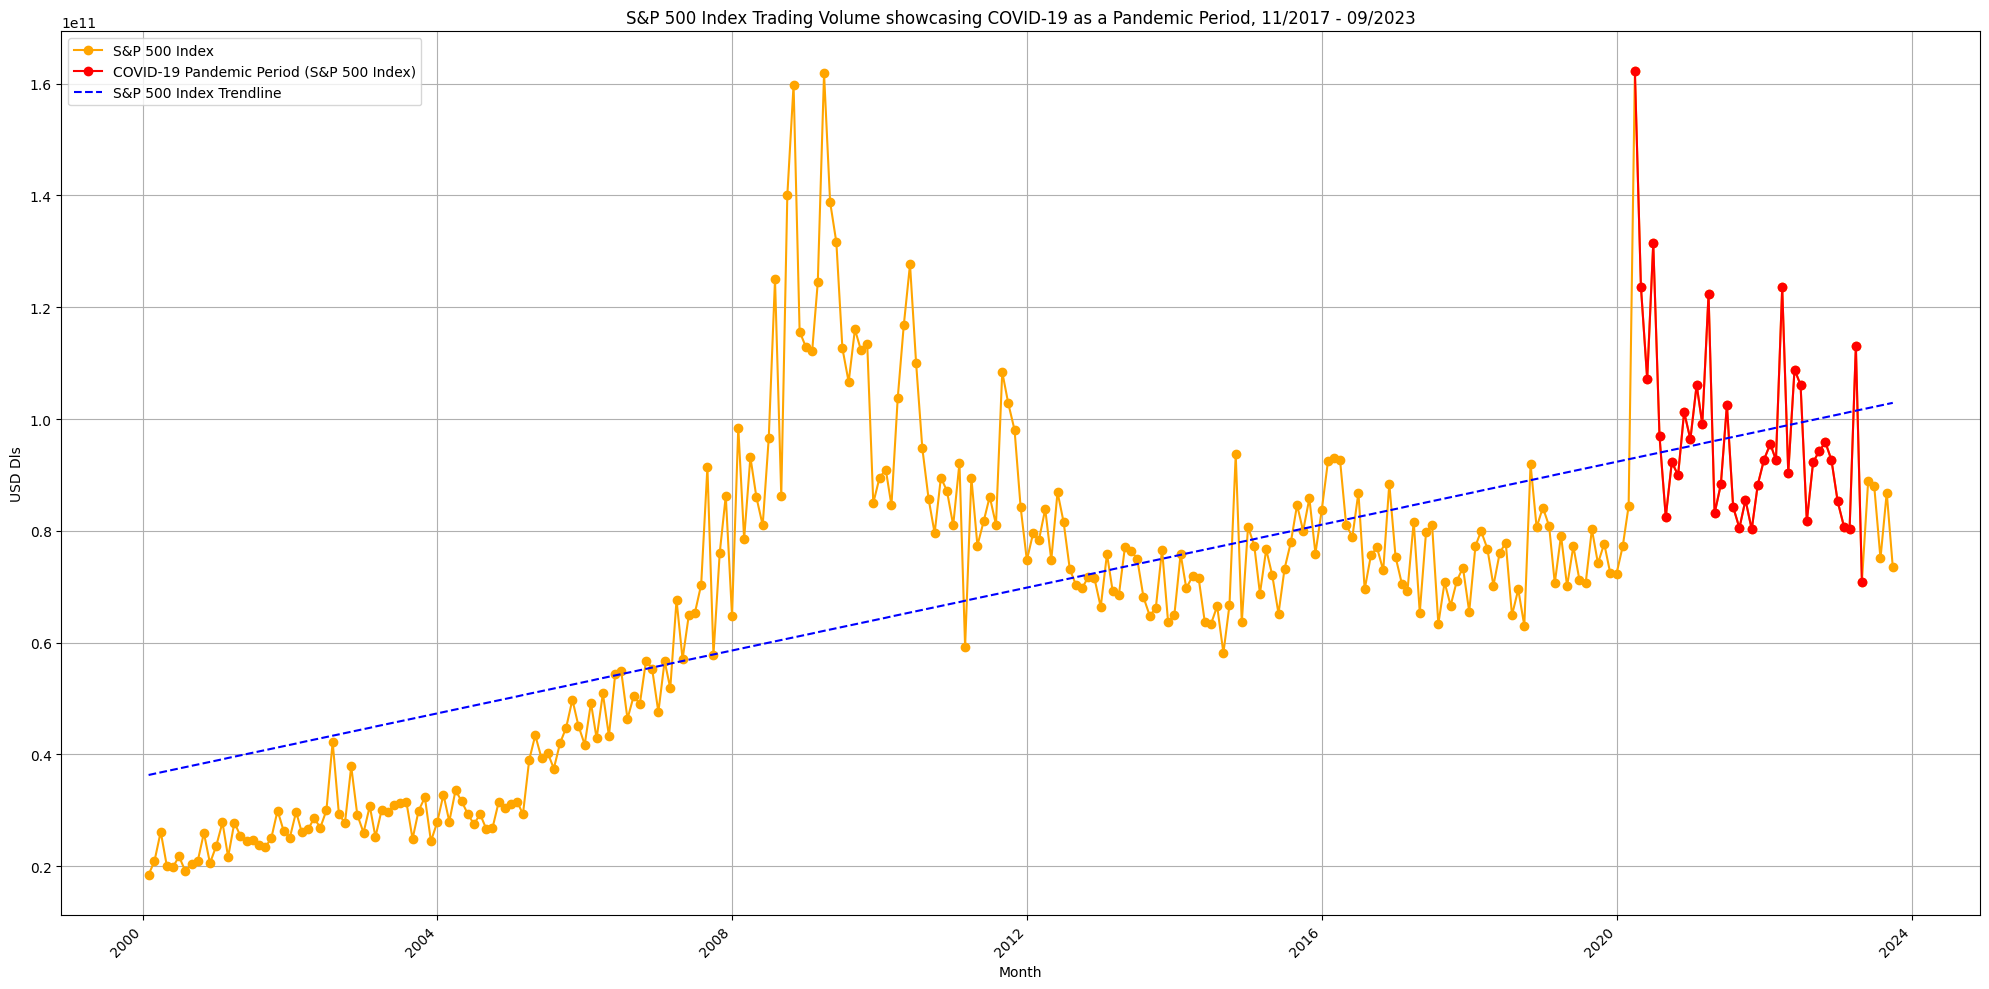

In [63]:
# S&P 500 Index
plt.figure(figsize=(20, 10))

end_date_sp = '2023-09'

plt.plot(sp500_vol[:end_date_sp].index, 
         sp500_vol[:end_date_sp].values, 
         marker='o', color='orange', label='S&P 500 Index')

# COVID-19 Pandemic Period for S&P 500 Index
start_date_spvol_covid = '2020-03-01'
end_date_spvol_covid = '2023-05-01'
plt.plot(sp500_vol.loc[start_date_spvol_covid:end_date_spvol_covid].index,
         sp500_vol.loc[start_date_spvol_covid:end_date_spvol_covid].values,
         marker='o', color='red', label='COVID-19 Pandemic Period (S&P 500 Index)')

# Calculate the trendline for S&P 500 Index
x_sp = np.arange(len(sp500_vol[:end_date_sp]))
y_sp = sp500_vol[:end_date_sp].values.squeeze()
coefficients_sp = np.polyfit(x_sp, y_sp, 1)
trendline_sp = np.poly1d(coefficients_sp)

# Display the trendline for S&P 500 Index
plt.plot(sp500_vol[:end_date_sp].index, trendline_sp(x_sp), linestyle='--', color='blue', label='S&P 500 Index Trendline')

# Calculate the slope value for S&P 500 Index
slope_sp = coefficients_sp[0]

# Print the slope value
print(f'S&P 500 Index Slope: {slope_sp:.2f}')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('USD Dls')
plt.title('S&P 500 Index Trading Volume showcasing COVID-19 as a Pandemic Period, 11/2017 - 09/2023')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


Slope for Ethereum: 5513112296.58 (Ethereum)
Slope for S&P 500 Index: 263166073.78 (S&P 500 Index)


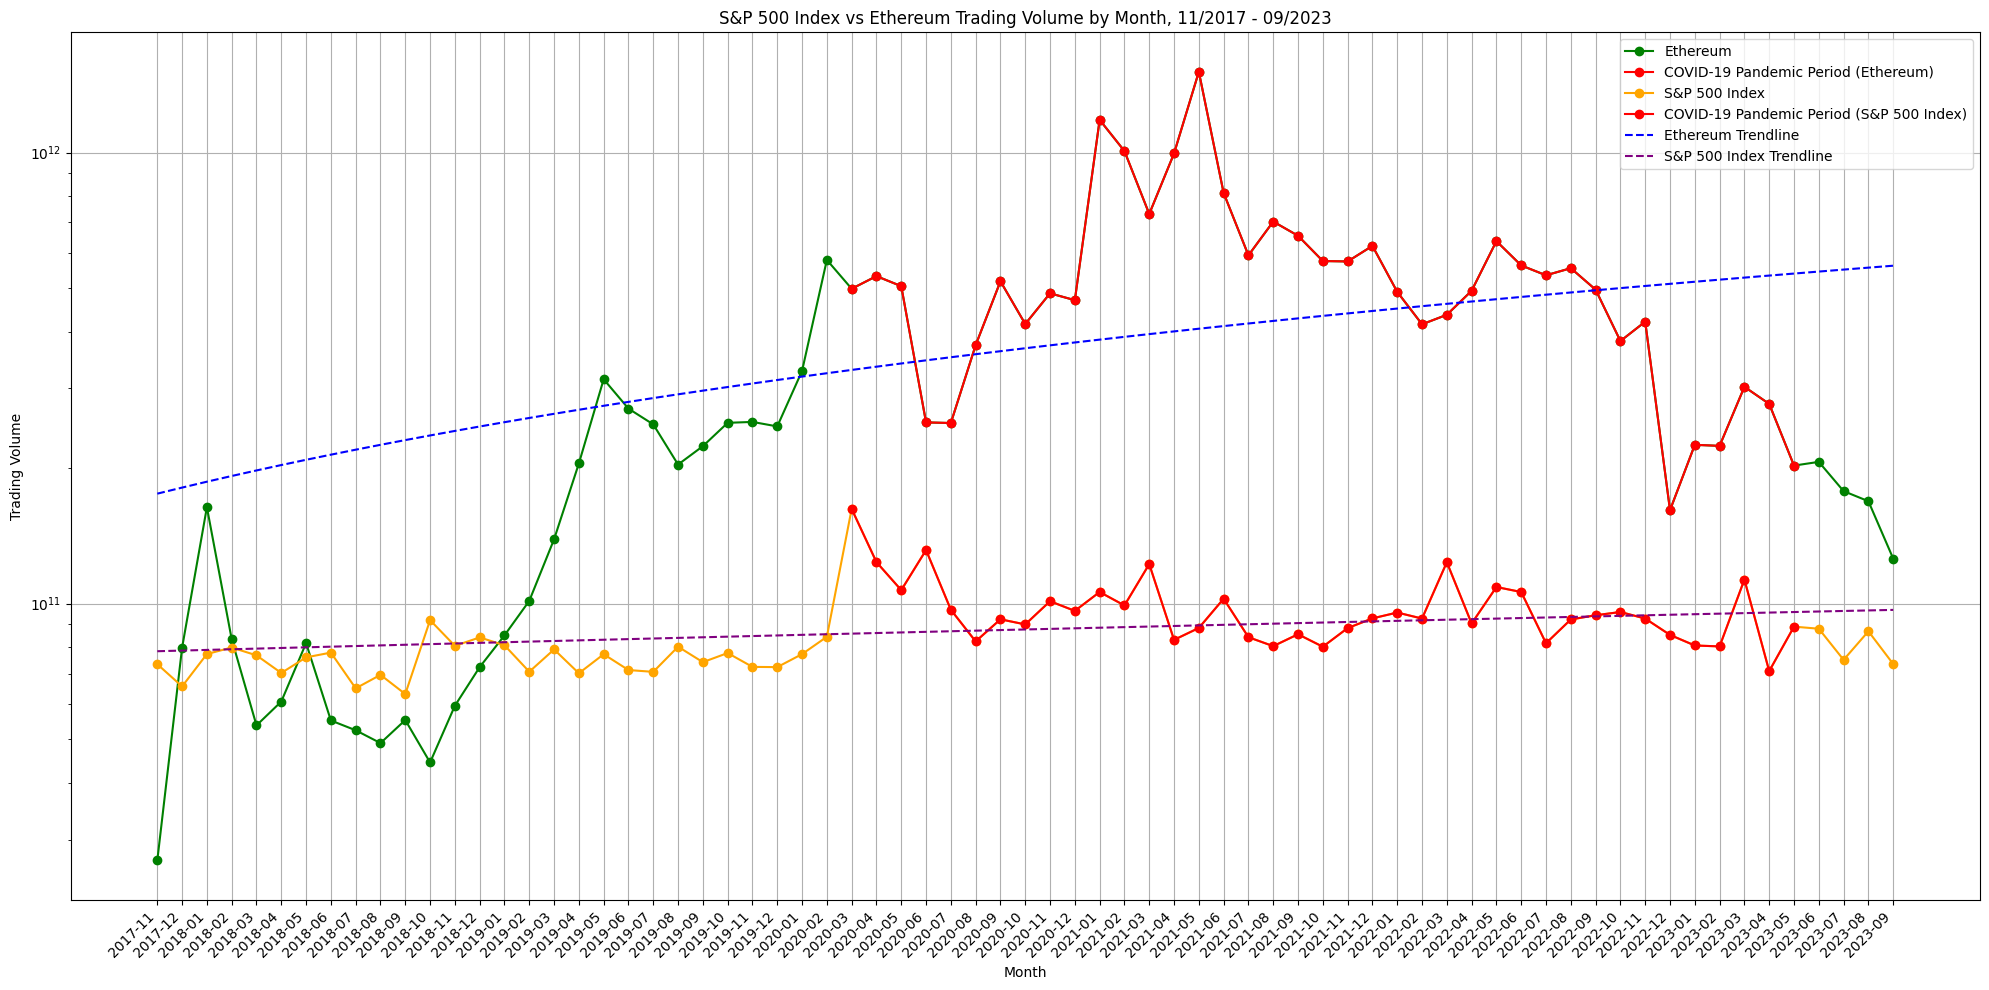

In [64]:


sp500_vol_plot = sp500_vol.copy()
sp500_vol_plot.index = sp500_vol_plot.index.strftime('%Y-%m')

# Plotting
plt.figure(figsize=(20, 10))

start_date_eth = '2017-11'
end_date_eth = '2023-09'

start_date_covid = '2020-03'
end_date_covid = '2023-05'

# Ethereum
plt.plot(e_volume_monthly_plot.loc[start_date_eth:end_date_eth].index, 
         e_volume_monthly_plot.loc[start_date_eth:end_date_eth].values, 
         marker='o', color='green', label='Ethereum')

# COVID-19 Pandemic Period for Ethereum
plt.plot(e_volume_monthly_plot.loc[start_date_covid:end_date_covid].index,
         e_volume_monthly_plot.loc[start_date_covid:end_date_covid].values, 
         marker='o', color='red', label='COVID-19 Pandemic Period (Ethereum)')

# S&P 500 Index
plt.plot(sp500_vol_plot.loc[start_date_eth:end_date_eth].index, 
         sp500_vol_plot.loc[start_date_eth:end_date_eth].values, 
         marker='o', color='orange', label='S&P 500 Index')

# COVID-19 Pandemic Period for S&P 500 Index
plt.plot(sp500_vol_plot.loc[start_date_covid:end_date_covid].index,
         sp500_vol_plot.loc[start_date_covid:end_date_covid].values,
         marker='o', color='red', label='COVID-19 Pandemic Period (S&P 500 Index)')

# Calculate the trendline for Ethereum
x_eth = np.arange(len(e_volume_monthly_plot.loc[start_date_eth:end_date_eth]))
y_eth = e_volume_monthly_plot.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_eth = np.polyfit(x_eth, y_eth, 1)
trendline_eth = np.poly1d(coefficients_eth)

# Calculate the trendline for S&P 500 Index
x_sp = np.arange(len(sp500_vol_plot.loc[start_date_eth:end_date_eth]))
y_sp = sp500_vol_plot.loc[start_date_eth:end_date_eth].values.squeeze()
coefficients_sp = np.polyfit(x_sp, y_sp, 1)
trendline_sp = np.poly1d(coefficients_sp)

# Print the slope values with improved readability
slope_eth = coefficients_eth[0]
slope_sp = coefficients_sp[0]

print(f'Slope for Ethereum: {slope_eth:.2f} (Ethereum)')
print(f'Slope for S&P 500 Index: {slope_sp:.2f} (S&P 500 Index)')

# Plot the trendlines
plt.plot(e_volume_monthly_plot.loc[start_date_eth:end_date_eth].index, trendline_eth(x_eth), linestyle='--', color='blue', label='Ethereum Trendline')
plt.plot(sp500_vol_plot.loc[start_date_eth:end_date_eth].index, trendline_sp(x_sp), linestyle='--', color='purple', label='S&P 500 Index Trendline')

plt.yscale('log') 
plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.title('S&P 500 Index vs Ethereum Trading Volume by Month, 11/2017 - 09/2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()


### Correlation Analysis: Investigating potential relationships between Ethereum's price and other variables or external factors during COVID period.

In [65]:
e_open_monthly = pd.DataFrame(e_open_monthly)
merged_data2= e_open_monthly.merge(sp500_open_plot, left_index=True, right_index=True, how='inner')
merged_data2

e_open      sp_open
Date                             
2017-11   373.696317  2590.306190
2017-12   630.583997  2666.070000
2018-01  1093.099893  2785.686667
2018-02   882.527006  2710.269474
2018-03   640.787129  2707.860000
...              ...          ...
2023-05  1845.306196  4148.423182
2023-06  1816.607914  4333.507619
2023-07  1895.858863  4505.434000
2023-08  1763.744975  4461.379565
2023-09  1617.568939  4419.146500

[71 rows x 2 columns]

<Axes: xlabel='e_open', ylabel='sp_open'>

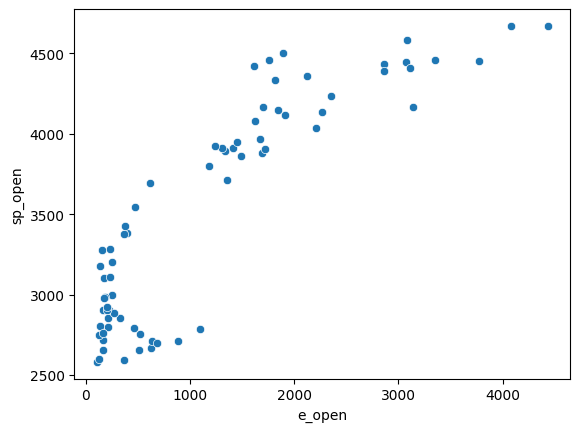

In [66]:
sns.scatterplot(x='e_open', y='sp_open', data=merged_data2)

In [67]:
correlation_coefficient = merged_data2['e_open'].corr(merged_data2['sp_open'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: 0.8755920696530342
Correlation Level: strong correlation


#### Computing correlation coefficient for Ethereum Volume with COVID new cases

<Axes: xlabel='Inflation Rate', ylabel='e_open'>

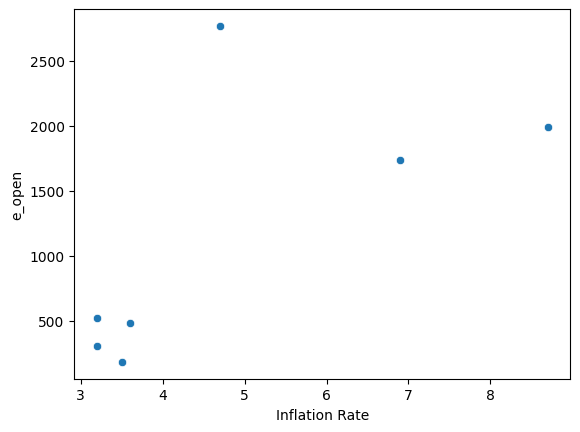

In [68]:
e_open_yearly =pd.DataFrame(e_open_yearly)
merged_data1 = e_open_yearly.merge(inflation_rate_world_plot, left_index=True, right_index=True, how='inner')

sns.scatterplot(x='Inflation Rate', y='e_open', data=merged_data1)

In [69]:
correlation_coefficient = merged_data1['Inflation Rate'].corr(merged_data1['e_open'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: 0.6688392619120694
Correlation Level: moderate correlation


#### Computing correlation coefficient for Ethereum Volume with COVID new cases

In [70]:
# Merging Ethereum Volume and Covid New Cases into merged_data DF
merged_data = e_volume_monthly.merge(covid_cases_m, on = 'Date')
merged_data.head()

Date      e_volume  covid_new_cases
0  2020-01  327976431869             9843
1  2020-02  578092481246            75364
2  2020-03  498921414458           697575
3  2020-04  532158870567          2222860
4  2020-05  505593287696          2886396

<Axes: xlabel='e_volume', ylabel='covid_new_cases'>

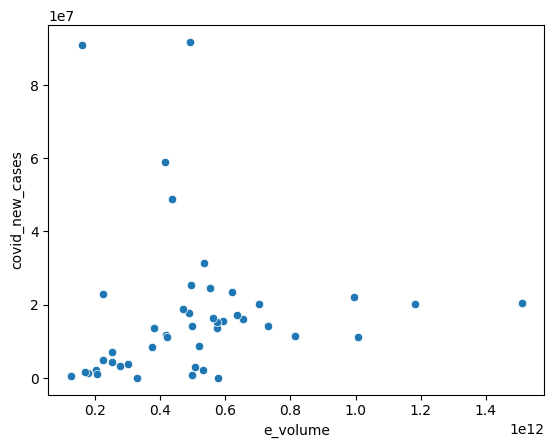

In [71]:
sns.scatterplot(x='e_volume', y='covid_new_cases', data=merged_data)

In [72]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: 0.059758449889579
Correlation Level: weak correlation


#### Computing correlation coefficient for Ethereum Open Monthly Differencess with COVID total new cases

In [73]:
# Merging Ethereum Monthly Diff to merged_data DF
merged_data = merged_data.merge(ethereum_monthly_diff, on ='Date')
merged_data.head()

Date      e_volume  covid_new_cases  e_month_diff
0  2020-01  327976431869             9843     16.536064
1  2020-02  578092481246            75364     82.057116
2  2020-03  498921414458           697575    -74.142160
3  2020-04  532158870567          2222860      6.253120
4  2020-05  505593287696          2886396     37.858542

<Axes: xlabel='e_month_diff', ylabel='covid_new_cases'>

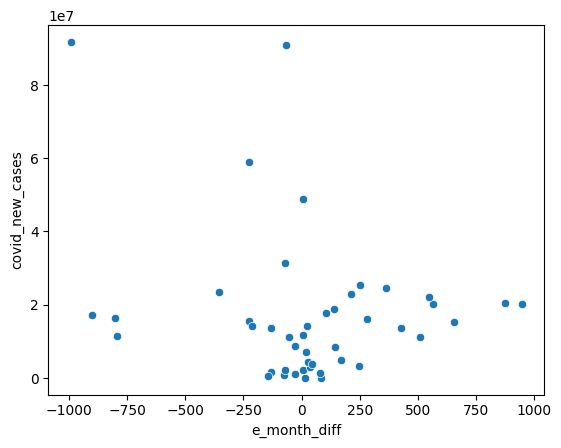

In [74]:
sns.scatterplot(x='e_month_diff', y='covid_new_cases', data=merged_data)

In [75]:
correlation_coefficient = merged_data['e_month_diff'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")



Correlation Coefficient: -0.22221807307820823
Correlation Level: weak correlation


#### Computing correlation coefficient for Ethereum Open with COVID new cases

In [76]:
# Merging Ethereum Open Monthly to merged_data DF
merged_data = merged_data.merge(e_open_monthly, on='Date')
merged_data.head()

Date      e_volume  covid_new_cases  e_month_diff      e_open
0  2020-01  327976431869             9843     16.536064  155.320137
1  2020-02  578092481246            75364     82.057116  237.377253
2  2020-03  498921414458           697575    -74.142160  163.235093
3  2020-04  532158870567          2222860      6.253120  169.488213
4  2020-05  505593287696          2886396     37.858542  207.346755

<Axes: xlabel='e_open', ylabel='covid_new_cases'>

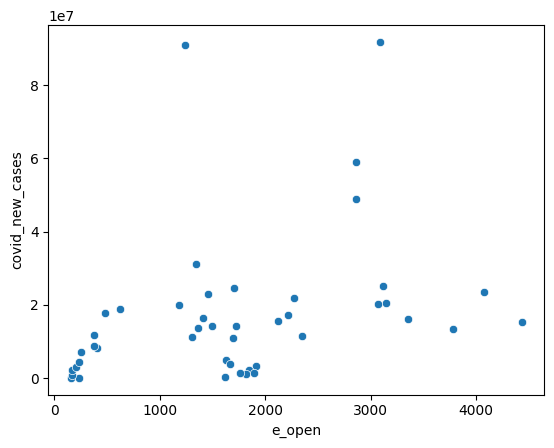

In [77]:
sns.scatterplot(x='e_open', y='covid_new_cases', data=merged_data)

In [78]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['covid_new_cases'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")


Correlation Coefficient: 0.34160979564709076
Correlation Level: moderate correlation


### Computing correlation coefficient for Ethereum Open Monthly Mean Price with Gasoline Price

In [79]:
# Merging Gas Price Monthly to merged_data DF
merged_data = merged_data.merge(gas_price_monthly, on = 'Date')
merged_data.head()

Date      e_volume  covid_new_cases  e_month_diff      e_open  gas_price
0  2020-01  327976431869             9843     16.536064  155.320137    2.54775
1  2020-02  578092481246            75364     82.057116  237.377253    2.44200
2  2020-03  498921414458           697575    -74.142160  163.235093    2.23420
3  2020-04  532158870567          2222860      6.253120  169.488213    1.84050
4  2020-05  505593287696          2886396     37.858542  207.346755    1.86950

<Axes: xlabel='e_open', ylabel='gas_price'>

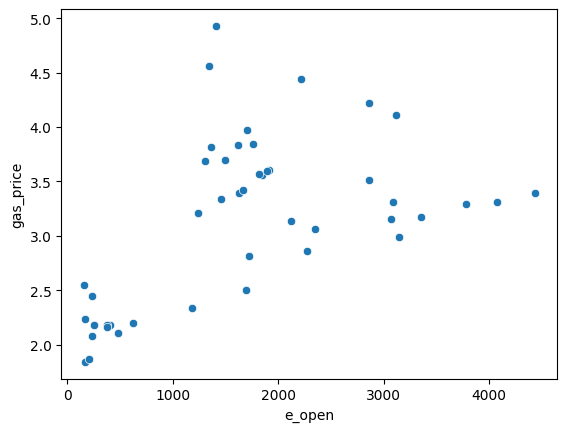

In [80]:
sns.scatterplot(x='e_open', y='gas_price', data=merged_data)

In [81]:
correlation_coefficient = merged_data['e_open'].corr(merged_data['gas_price'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.5278085330519298
Correlation Level: moderate correlation


### Computing correlation coefficient for Ethereum Volume with Ethereum Open Price

<Axes: xlabel='e_volume', ylabel='e_open'>

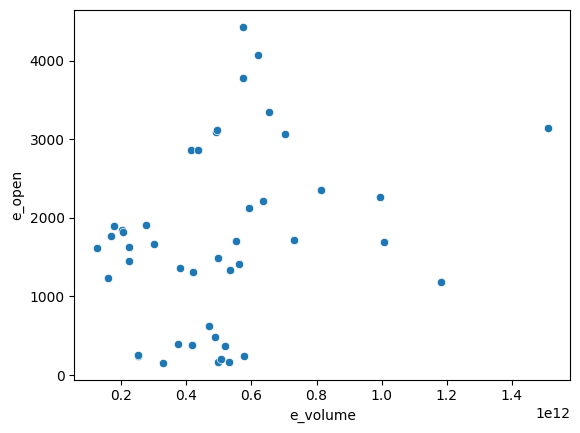

In [82]:
sns.scatterplot(x='e_volume', y='e_open', data=merged_data)

In [83]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['e_open'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.2834797209404926
Correlation Level: weak correlation


### Computing correlation coefficient for Ethereum Volume with Ethereum Monthly Open Price Differences

<Axes: xlabel='e_volume', ylabel='e_month_diff'>

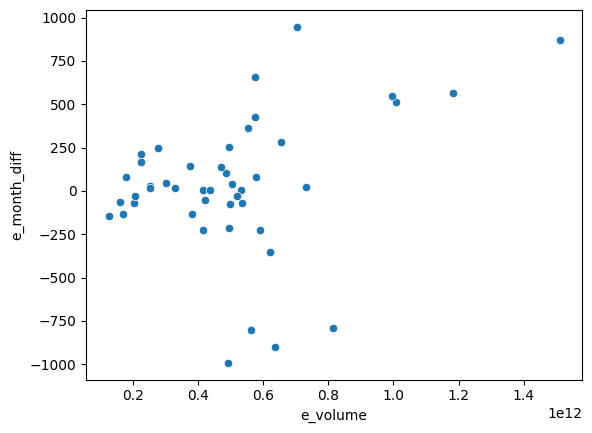

In [84]:
sns.scatterplot(x='e_volume', y='e_month_diff', data=merged_data)

In [85]:
correlation_coefficient = merged_data['e_volume'].corr(merged_data['e_month_diff'])

if correlation_coefficient > 0.7 or correlation_coefficient < -0.7:
    correlation_level = "strong"
elif 0.3 <= correlation_coefficient <= 0.7 or -0.7 <= correlation_coefficient <= -0.3:
    correlation_level = "moderate"
elif 0 <= correlation_coefficient < 0.3 or 0 > correlation_coefficient >= -0.3:
    correlation_level = "weak"
else:
    correlation_level = "very weak or no"

# Print the correlation coefficient and level of correlation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Correlation Level: {correlation_level} correlation")

Correlation Coefficient: 0.3330820615139074
Correlation Level: moderate correlation


#### Comparing Ethereum Mean Open Price Over Different Years (Overlap)

In [86]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

merged_data['quarter'] = merged_data['Date'].dt.to_period('Q')

merged_data['Month'] = merged_data['Date'].dt.month


merged_data

Date       e_volume  covid_new_cases  e_month_diff       e_open  \
0  2020-01-01   327976431869             9843     16.536064   155.320137   
1  2020-02-01   578092481246            75364     82.057116   237.377253   
2  2020-03-01   498921414458           697575    -74.142160   163.235093   
3  2020-04-01   532158870567          2222860      6.253120   169.488213   
4  2020-05-01   505593287696          2886396     37.858542   207.346755   
5  2020-06-01   252220724156          4268401     28.921647   236.268403   
6  2020-07-01   251431946993          6973971     19.286091   255.554494   
7  2020-08-01   374122796720          8287922    143.771653   399.326147   
8  2020-09-01   518354378929          8625997    -28.442949   370.883198   
9  2020-10-01   416749195873         11771220      4.479377   375.362575   
10 2020-11-01   487476388045         17714900    103.334113   478.696689   
11 2020-12-01   470673397126         18801082    139.840594   618.537283   
12 2021-01-01  1181644236261         20051905    566.460270  1184.997553   
13 2021-02-01  1007718046121         11022041    511.236822  1696.234375   
14 2021-03-01   730832219123         14175935     24.292280  1720.526655   
15 2021-04-01   995334204881         21964418    548.603639  2269.130294   
16 2021-05-01  1510329786014         20503102    873.383394  3142.513688   
17 2021-06-01   813523116983         11400289   -792.922888  2349.590800   
18 2021-07-01   591738936958         15581792   -227.124605  2122.466194   
19 2021-08-01   703006251884         20087322    947.242436  3069.708630   
20 2021-09-01   653984909752         16039395    279.836390  3349.545020   
21 2021-10-01   574798465423         13503051    427.384778  3776.929798   
22 2021-11-01   573546775953         15273853    655.472863  4432.402661   
23 2021-12-01   621042023890         23508227   -353.447654  4078.955007   
24 2022-01-01   491108556504         91789097   -992.091931  3086.863077   
25 2022-02-01   416163449938         58931514   -227.101131  2859.761945   
26 2022-03-01   436852450559         48881616      4.859794  2864.621740   
27 2022-04-01   493826441956         25228428    250.600778  3115.222518   
28 2022-05-01   636271175493         17071035   -901.664806  2213.557712   
29 2022-06-01   562032668964         16416382   -801.688482  1411.869230   
30 2022-07-01   534457515643         31233747    -72.245419  1339.623811   
31 2022-08-01   554162785316         24469738    363.724003  1703.347814   
32 2022-09-01   496652295826         14104444   -211.842931  1491.504883   
33 2022-10-01   382071643030         13681848   -131.825140  1359.679743   
34 2022-11-01   421797905717         11235752    -52.557636  1307.122107   
35 2022-12-01   161130639970         90982779    -66.827713  1240.294394   
36 2023-01-01   224952954314         23008056    214.619369  1454.913763   
37 2023-02-01   223749343195          4831249    169.006002  1623.919765   
38 2023-03-01   302468060876          3844837     44.569071  1668.488836   
39 2023-04-01   277179762298          3250247    246.662775  1915.151611   
40 2023-05-01   202326166173          2157795    -69.845416  1845.306196   
41 2023-06-01   206194132396          1042340    -28.698281  1816.607914   
42 2023-07-01   177596680398          1409298     79.250949  1895.858863   
43 2023-08-01   168678383229          1486021   -132.113888  1763.744975   
44 2023-09-01   125852503249           372349   -146.176036  1617.568939   

    gas_price quarter  Month  
0     2.54775  2020Q1      1  
1     2.44200  2020Q1      2  
2     2.23420  2020Q1      3  
3     1.84050  2020Q2      4  
4     1.86950  2020Q2      5  
5     2.08220  2020Q2      6  
6     2.18325  2020Q3      7  
7     2.18240  2020Q3      8  
8     2.18275  2020Q3      9  
9     2.15800  2020Q4     10  
10    2.10820  2020Q4     11  
11    2.19525  2020Q4     12  
12    2.33425  2021Q1      1  
13    2.50100  2021Q1      2  
14    2.81040  2021Q1      3  
15    2.85825  2

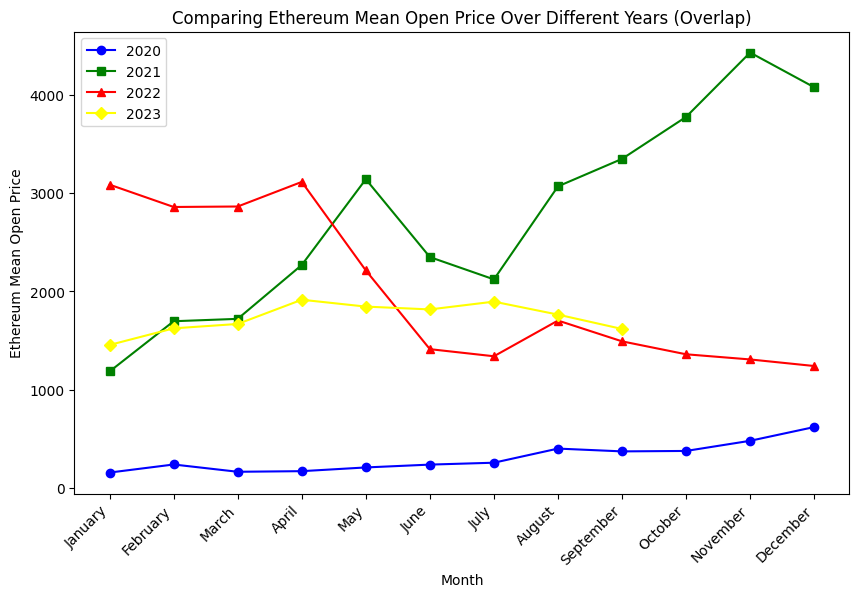

In [87]:
# Filter data for different date ranges
data_2020 = merged_data[merged_data['Date'] < '2021-01-01']
data_2021 = merged_data[(merged_data['Date'] >= '2021-01-01') & (merged_data['Date'] < '2022-01-01')]
data_2022 = merged_data[(merged_data['Date'] >= '2022-01-01') & (merged_data['Date'] < '2023-01-01')]
data_2023 = merged_data[(merged_data['Date'] >= '2023-01-01')]

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plot data for different date ranges with overlap
plt.plot(data_2020['Month'], data_2020['e_open'], label='2020', marker='o', color='blue')
plt.plot(data_2021['Month'], data_2021['e_open'], label='2021', marker='s', color='green')
plt.plot(data_2022['Month'], data_2022['e_open'], label='2022', marker='^', color='red')
plt.plot(data_2023['Month'], data_2023['e_open'], label='2023', marker='D', color='yellow')

# Customize the plot (titles, labels, legend, etc.)
import calendar
month_numbers = data_2020['Month']
month_names = [calendar.month_name[month_number] for month_number in month_numbers]

plt.title('Comparing Ethereum Mean Open Price Over Different Years (Overlap)')
plt.xticks(month_numbers, month_names, rotation=45, ha='right')
plt.xlabel('Month')
plt.ylabel('Ethereum Mean Open Price')
plt.legend()


# Show the plot
plt.show()



### Comparing Ethereum Q1 - Q4 Trading Volume Sum "2020-2022"

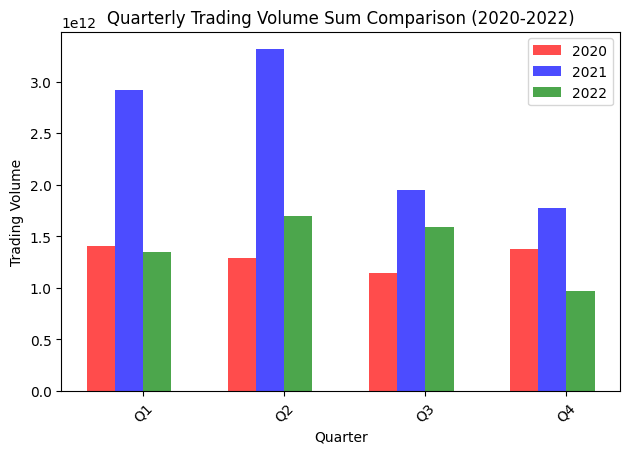

In [88]:
merged_data['quarter'] = merged_data['Date'].dt.to_period('Q')

data_2020_q = data_2020.groupby('quarter')['e_volume'].sum()
data_2021_q = data_2021.groupby('quarter')['e_volume'].sum()
data_2022_q = data_2022.groupby('quarter')['e_volume'].sum()
data_2023_q = data_2023.groupby('quarter')['e_volume'].sum()

colors = ['red', 'blue', 'green', 'yellow']

# Convert PeriodIndex to string for x-axis labels
x_labels = [str(period) for period in data_2020_q.index]

# Set the positions of bars on x-axis for each quarter
x = np.arange(len(x_labels))

# Set the width of each bar
bar_width = 0.2

# Create subplots
fig, ax = plt.subplots()

# Plot grouped bars for each year
ax.bar(x - 1.5*bar_width, data_2020_q.values, bar_width, label='2020', color=colors[0], alpha=0.7)
ax.bar(x - 0.5*bar_width, data_2021_q.values, bar_width, label='2021', color=colors[1], alpha=0.7)
ax.bar(x + 0.5*bar_width, data_2022_q.values, bar_width, label='2022', color=colors[2], alpha=0.7)


# Customize the plot
ax.set_xlabel('Quarter')
ax.set_ylabel('Trading Volume')
ax.set_title('Quarterly Trading Volume Sum Comparison (2020-2022)')

# Set custom x-tick positions and labels
custom_xticks = np.arange(len(x_labels))
custom_xticklabels = ['Q1', 'Q2', 'Q3', 'Q4']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)

ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Comparing Ethereum Q1 - Q3 Trading Volume Sum "2020-2023"

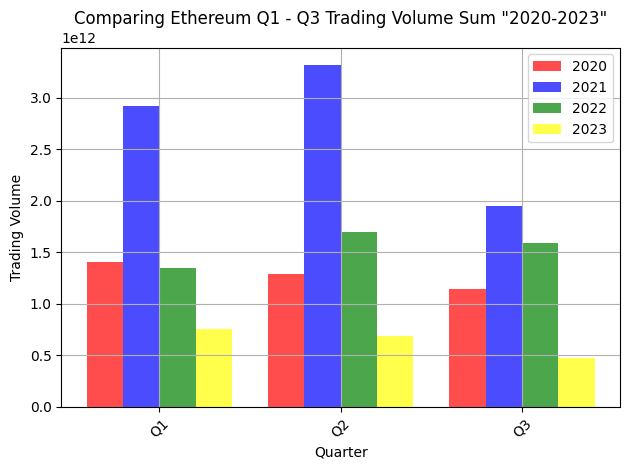

In [89]:
# Convert PeriodIndex to string for x-axis labels, including only Q1 to Q3
x_labels = [str(period) for period in data_2020_q.index if period.quarter <= 3]

# Set the positions of bars on x-axis for each quarter (including only Q1 to Q3)
x = np.arange(len(x_labels))

# Set the width of each bar
bar_width = 0.2

# Create subplots
fig, ax = plt.subplots()

# Plot grouped bars for each year, including only Q1 to Q3
ax.bar(x - 1.5*bar_width, data_2020_q.values[:3], bar_width, label='2020', color=colors[0], alpha=0.7)
ax.bar(x - 0.5*bar_width, data_2021_q.values[:3], bar_width, label='2021', color=colors[1], alpha=0.7)
ax.bar(x + 0.5*bar_width, data_2022_q.values[:3], bar_width, label='2022', color=colors[2], alpha=0.7)
ax.bar(x + 1.5*bar_width, data_2023_q.values[:3], bar_width, label='2023', color=colors[3], alpha=0.7)

# Customize the plot
ax.set_xlabel('Quarter')
ax.set_ylabel('Trading Volume')
ax.set_title('Comparing Ethereum Q1 - Q3 Trading Volume Sum "2020-2023"')

# Set custom x-tick positions and labels for Q1 to Q3
custom_xticks = np.arange(len(x_labels))
custom_xticklabels = ['Q1', 'Q2', 'Q3']
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)

ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid()
plt.show()
